In [1]:
from pandas_profiling import ProfileReport
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics,model_selection
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from sklearn.impute import KNNImputer #MICE FancyImpute
from sklearn.inspection import permutation_importance
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import PowerTransformer
import umap
from umap import UMAP
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
import shap
from sklearn.cluster import KMeans
from tqdm import tqdm
from pandas import Series, DataFrame
# import plotly.plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
os.chdir('C:/Users/Admin/Downloads/capstone')
df= pd.read_excel('Customer Churn Data.xlsx',sheet_name='Data for DSBA')

In [3]:
df.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [4]:
report = ProfileReport(df)
report.to_file("Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.shape

(11260, 19)

In [6]:
df.size

213940

In [7]:
df.isna().sum().sum()

2676

In [8]:
(2676/213940)*100

1.2508179863513134

just 1.25% of the missing values in entire dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [10]:
df.describe().T

count          mean          std      min       25%  \
AccountID        11260.0  25629.500000  3250.626350  20000.0  22814.75   
Churn            11260.0      0.168384     0.374223      0.0      0.00   
City_Tier        11148.0      1.653929     0.915015      1.0      1.00   
CC_Contacted_LY  11158.0     17.867091     8.853269      4.0     11.00   
Service_Score    11162.0      2.902526     0.725584      0.0      2.00   
CC_Agent_Score   11144.0      3.066493     1.379772      1.0      2.00   
Complain_ly      10903.0      0.285334     0.451594      0.0      0.00   

                     50%       75%      max  
AccountID        25629.5  28444.25  31259.0  
Churn                0.0      0.00      1.0  
City_Tier            1.0      3.00      3.0  
CC_Contacted_LY     16.0     23.00    132.0  
Service_Score        3.0      3.00      5.0  
CC_Agent_Score       3.0      4.00      5.0  
Complain_ly          0.0      1.00      1.0

In [11]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [AccountID, Churn, Tenure, City_Tier, CC_Contacted_LY, Payment, Gender, Service_Score, Account_user_count, account_segment, CC_Agent_Score, Marital_Status, rev_per_month, Complain_ly, rev_growth_yoy, coupon_used_for_payment, Day_Since_CC_connect, cashback, Login_device]
Index: []

**Treating Anomalies**

In [12]:
# # + $ @ * &&&&
df.replace({'#':np.nan,'*':np.nan,'#':np.nan,'@':np.nan,'+':np.nan,'$':np.nan,'&&&&':np.nan},inplace=True)
df.account_segment.replace({'Regular +':'Regular Plus','Super +':'Super Plus'},inplace=True)
df.Gender.replace({'F':'Female','M':'Male'},inplace=True)

**Checking unique values & its counts**

In [13]:
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [14]:
for column in df[['Tenure', 'City_Tier', 'CC_Contacted_LY','Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month','Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].unique())
    print(df[column].value_counts())
    print(column.upper(),' missing value counts are: ',df[column].isna().sum())
    print('\n*************************************************\n')

TENURE :  37
[ 4.  0.  2. 13. 11. nan  9. 99. 19. 20. 14.  8. 26. 18.  5. 30.  7.  1.
 23.  3. 29.  6. 28. 24. 25. 16. 10. 15. 22. 27. 12. 21. 17. 50. 60. 31.
 51. 61.]
1.0     1351
0.0     1231
8.0      519
9.0      496
7.0      450
10.0     423
3.0      410
4.0      403
5.0      403
11.0     388
6.0      363
12.0     360
13.0     359
2.0      354
14.0     345
15.0     311
16.0     291
19.0     273
18.0     253
20.0     217
17.0     215
21.0     170
23.0     169
22.0     151
24.0     147
30.0     137
28.0     137
27.0     131
99.0     131
26.0     122
29.0     114
25.0     114
31.0      96
60.0       2
50.0       2
51.0       2
61.0       2
Name: Tenure, dtype: int64
TENURE  missing value counts are:  218

*************************************************

CITY_TIER :  3
[ 3.  1. nan  2.]
1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64
CITY_TIER  missing value counts are:  112

*************************************************

CC_CONTACTED_LY :  44
[  6.   8.  30.  

Now all the anomalies are treated, only missing values are present in the entire dataset

**Missing Variables check**

In [15]:
df_na = df.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False)

rev_per_month              791
Login_device               760
cashback                   473
Account_user_count         444
Day_Since_CC_connect       358
Complain_ly                357
Tenure                     218
Marital_Status             212
CC_Agent_Score             116
City_Tier                  112
Payment                    109
Gender                     108
CC_Contacted_LY            102
Service_Score               98
account_segment             97
rev_growth_yoy               3
coupon_used_for_payment      3
dtype: int64

**Dropping 3 rows**

In [16]:
df.dropna(subset=['rev_growth_yoy','coupon_used_for_payment'],inplace=True)

**Imputing Categorical columns with most frequent**<br>
**Run the same code after imputing with mode**<br>
**Checking the proportion of the columns after imputing with mode**

In [17]:
freq_table = df["Payment"].value_counts().to_frame()
freq_table.reset_index(inplace=True) # reset index
freq_table.columns = [ "Payment" , "Count"] # rename columns
freq_table["Percent"] = round(freq_table['Count'] / sum(freq_table['Count']),2)
freq_table

Payment  Count  Percent
0        Debit Card   4585     0.41
1       Credit Card   3508     0.31
2          E wallet   1216     0.11
3  Cash on Delivery   1014     0.09
4               UPI    822     0.07

In [18]:
freq_table = df["Gender"].value_counts().to_frame()
freq_table.reset_index(inplace=True) # reset index
freq_table.columns = [ "Gender" , "Count"] # rename columns
freq_table["Percent"] = round(freq_table['Count'] / sum(freq_table['Count']),2)
freq_table

Gender  Count  Percent
0    Male   6699      0.6
1  Female   4447      0.4

In [19]:
freq_table = df["account_segment"].value_counts().to_frame()
freq_table.reset_index(inplace=True) # reset index
freq_table.columns = [ "account_segment" , "Count"] # rename columns
freq_table["Percent"] = round(freq_table['Count'] / sum(freq_table['Count']),2)
freq_table

account_segment  Count  Percent
0    Regular Plus   4122     0.37
1           Super   4059     0.36
2             HNI   1639     0.15
3      Super Plus    817     0.07
4         Regular    520     0.05

In [20]:
freq_table = df["Marital_Status"].value_counts().to_frame()
freq_table.reset_index(inplace=True) # reset index
freq_table.columns = [ "Marital_Status", "Count"] # rename columns
freq_table["Percent"] = round(freq_table['Count'] / sum(freq_table['Count']),2)
freq_table

Marital_Status  Count  Percent
0        Married   5859     0.53
1         Single   3515     0.32
2       Divorced   1668     0.15

In [21]:
freq_table = df["Login_device"].value_counts().to_frame()
freq_table.reset_index(inplace=True) # reset index
freq_table.columns = [ "Login_device" , "Count"] # rename columns
freq_table["Percent"] = round(freq_table['Count'] / sum(freq_table['Count']),2)
freq_table

Login_device  Count  Percent
0       Mobile   7479     0.71
1     Computer   3015     0.29

In [22]:
freq_table = df["City_Tier"].value_counts().to_frame()
freq_table.reset_index(inplace=True) # reset index
freq_table.columns = [ "City_Tier" , "Count"] # rename columns
freq_table["Percent"] = round(freq_table['Count'] / sum(freq_table['Count']),2)
freq_table

City_Tier  Count  Percent
0        1.0   7259     0.65
1        3.0   3403     0.31
2        2.0    480     0.04

In [23]:
freq_table = df["Complain_ly"].value_counts().to_frame()
freq_table.reset_index(inplace=True) # reset index
freq_table.columns = ["Complain_ly" , "Count"] # rename columns
freq_table["Percent"] = round(freq_table['Count'] / sum(freq_table['Count']),2)
freq_table

Complain_ly  Count  Percent
0          0.0   7786     0.71
1          1.0   3111     0.29

**Imputing with most frequent**

In [24]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# dftemp.Login_device = imputer.fit_transform(dftemp['Login_device'].values.reshape(-1,1))[:,0]

In [24]:
for column in ['City_Tier','Payment','Gender','account_segment','Marital_Status','Complain_ly','Login_device']:
    df[column].fillna(df[column].mode()[0], inplace=True)

**Converting Objects to categorical codes**

In [ ]:
# df['account_segment'] = df['account_segment'].replace({'Regular Plus': 'Regular', 'Super Plus': 'Super', 'HNI': 'HNI'})

In [25]:
df['account_segment'] = df['account_segment'].replace({'Regular': 0, 'Regular Plus': 1, 'Super': 2, 'Super Plus': 3,'HNI':4})
# df['account_segment'] = df['account_segment'].replace({'Regular': 0, 'Super': 1, 'HNI':2})
df['Marital_Status'] = df['Marital_Status'].replace({'Single': 0, 'Married': 1, 'Divorced': 2})
df['Payment'] = df['Payment'].replace({'Debit Card': 0, 'Credit Card': 1, 'E wallet': 2, 'Cash on Delivery': 3,'UPI':4})
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
df['Login_device'] = df['Login_device'].replace({'Mobile': 0, 'Computer': 1})

**Imputation using KNN**

In [26]:
dfupdate=df.copy(deep=True)

In [27]:
dfupdate.head()

AccountID  Churn  Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  \
0      20000      1     4.0        3.0              6.0        0       0   
1      20001      1     0.0        1.0              8.0        4       1   
2      20002      1     0.0        1.0             30.0        0       1   
3      20003      1     0.0        3.0             15.0        0       1   
4      20004      1     0.0        1.0             12.0        1       1   

   Service_Score  Account_user_count  account_segment  CC_Agent_Score  \
0            3.0                 3.0                2             2.0   
1            3.0                 4.0                1             3.0   
2            2.0                 4.0                1             3.0   
3            2.0                 4.0                2             5.0   
4            2.0                 3.0                1             5.0   

   Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0               0            9.0          1.0            11.0   
1               0            7.0          1.0            15.0   
2               0            6.0          1.0            14.0   
3               0            8.0          0.0            23.0   
4               0            3.0          0.0            11.0   

   coupon_used_for_payment  Day_Since_CC_connect  cashback  Login_device  
0                      1.0                   5.0    159.93             0  
1                      0.0                   0.0    120.90             0  
2                      0.0                   3.0       NaN             0  
3                      0.0                   3.0    134.07             0  
4                      1.0                   3.0    129.60             0

In [28]:
df_na = dfupdate.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False)

rev_per_month           791
cashback                473
Account_user_count      444
Day_Since_CC_connect    358
Tenure                  218
CC_Agent_Score          116
CC_Contacted_LY         102
Service_Score            98
dtype: int64

In [29]:
imputer = KNNImputer(n_neighbors=5)

In [30]:
dfimputed=pd.DataFrame(imputer.fit_transform(dfupdate[['City_Tier','Payment','Gender','Service_Score','account_segment','CC_Agent_Score','Marital_Status','Complain_ly','Login_device','Tenure','CC_Contacted_LY','rev_per_month','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback','Account_user_count','Churn']]),columns=['City_Tier','Payment','Gender','Service_Score','account_segment','CC_Agent_Score','Marital_Status','Complain_ly','Login_device','Tenure','CC_Contacted_LY','rev_per_month','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback','Account_user_count','Churn'])

In [31]:
dfimputed.isna().sum().sum()

0

In [32]:
dfimputed.shape

(11254, 18)

In [33]:
dfimputed.head()

City_Tier  Payment  Gender  Service_Score  account_segment  CC_Agent_Score  \
0        3.0      0.0     0.0            3.0              2.0             2.0   
1        1.0      4.0     1.0            3.0              1.0             3.0   
2        1.0      0.0     1.0            2.0              1.0             3.0   
3        3.0      0.0     1.0            2.0              2.0             5.0   
4        1.0      1.0     1.0            2.0              1.0             5.0   

   Marital_Status  Complain_ly  Login_device  Tenure  CC_Contacted_LY  \
0             0.0          1.0           0.0     4.0              6.0   
1             0.0          1.0           0.0     0.0              8.0   
2             0.0          1.0           0.0     0.0             30.0   
3             0.0          0.0           0.0     0.0             15.0   
4             0.0          0.0           0.0     0.0             12.0   

   rev_per_month  rev_growth_yoy  coupon_used_for_payment  \
0            9.0            11.0                      1.0   
1            7.0            15.0                      0.0   
2            6.0            14.0                      0.0   
3            8.0            23.0                      0.0   
4            3.0            11.0                      1.0   

   Day_Since_CC_connect  cashback  Account_user_count  Churn  
0                   5.0   159.930                 3.0    1.0  
1                   0.0   120.900                 4.0    1.0  
2                   3.0   141.708                 4.0    1.0  
3                   3.0   134.070                 4.0    1.0  
4                   3.0   129.600                 3.0    1.0

In [34]:
dfimputed.columns

Index(['City_Tier', 'Payment', 'Gender', 'Service_Score', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'Login_device',
       'Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback',
       'Account_user_count', 'Churn'],
      dtype='object')

In [35]:
# except cashback column, all other columns are rounded up and change it to integer
for column in ['City_Tier', 'Payment', 'Gender', 'Service_Score', 'account_segment','CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'Login_device',
       'Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy','coupon_used_for_payment', 'Day_Since_CC_connect','Account_user_count', 'Churn']:
    dfimputed[column]=dfimputed[column].round(decimals=0)
    dfimputed[column]=dfimputed[column].astype(int)

In [36]:
for column in dfimputed[['Tenure', 'City_Tier', 'CC_Contacted_LY','Payment', 'Gender', 'Service_Score', 'Account_user_count','account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month','Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment','Day_Since_CC_connect', 'cashback', 'Login_device']]:
    print(column,':',dfimputed[column].nunique())
    print(dfimputed[column].unique())
    print(dfimputed[column].value_counts())
    print(column.upper(),' missing value counts are: ',dfimputed[column].isna().sum())
    print('\n*************************************************\n')

Tenure : 38
[ 4  0  2 13 11  9  3 99 19 20 14  8 26 18  5 30  7  1 23 29  6 28 24 25
 16 10 15 22 17 27 12 21 50 60 31 51 61 38]
1     1359
0     1231
8      539
9      515
7      467
10     437
3      423
4      415
5      413
11     397
6      382
13     372
12     370
2      364
14     351
15     314
16     295
19     276
18     257
17     222
20     220
21     169
23     169
22     154
24     148
28     137
30     137
27     132
99     131
26     122
25     116
29     114
31      97
61       2
51       2
50       2
60       2
38       1
Name: Tenure, dtype: int64
TENURE  missing value counts are:  0

*************************************************

City_Tier : 3
[3 1 2]
1    7371
3    3403
2     480
Name: City_Tier, dtype: int64
CITY_TIER  missing value counts are:  0

*************************************************

CC_Contacted_LY : 44
[  6   8  30  15  12  22  11   9  31  18  13  20  29  28  26  14  10  25
  27  17  23  33  19  35  24  16  32  21  34   5   4 126   7  36 127 

In [37]:
dfimputed.to_csv('abc.csv')

**Boxplot before treating outliers**

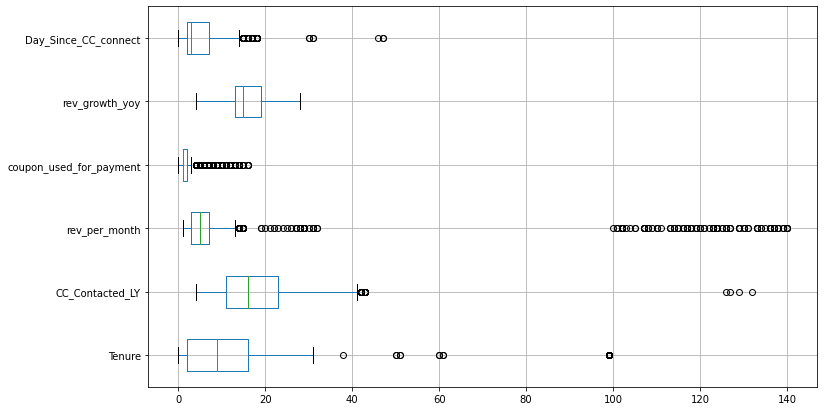

In [38]:
plt.figure(figsize=(12,7))
dfimputed.boxplot(['Tenure','CC_Contacted_LY','rev_per_month','coupon_used_for_payment','rev_growth_yoy','Day_Since_CC_connect'],vert=0)
plt.show()

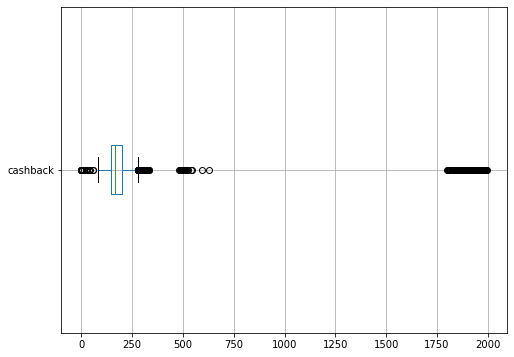

In [39]:
plt.figure(figsize=(8,6))
dfimputed.boxplot(['cashback'],vert=0)
plt.show()

In [40]:
def proportion_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

**Outlier counts**

In [41]:
for column in dfimputed[['Tenure','CC_Contacted_LY','rev_per_month','coupon_used_for_payment','rev_growth_yoy','Day_Since_CC_connect', 'cashback']]:
    if dfimputed[column].dtype != 'object':
        lr,ur=proportion_outlier(dfimputed[column])
        x=dfimputed[dfimputed[column] < lr].count()[column]
        y=dfimputed[dfimputed[column] > ur].count()[column]
        print(column.upper(),"--",((x + y)/dfimputed.shape[0])*100) 
        print(column.upper(),':',x+y)

TENURE -- 1.2440021325750843
TENURE : 140
CC_CONTACTED_LY -- 0.3732006397725253
CC_CONTACTED_LY : 42
REV_PER_MONTH -- 1.8393460103074462
REV_PER_MONTH : 207
COUPON_USED_FOR_PAYMENT -- 12.262306735382975
COUPON_USED_FOR_PAYMENT : 1380
REV_GROWTH_YOY -- 0.0
REV_GROWTH_YOY : 0
DAY_SINCE_CC_CONNECT -- 1.1640305669095432
DAY_SINCE_CC_CONNECT : 131
CASHBACK -- 8.148213968366804
CASHBACK : 917


**Shapiro Wilk's test - Normality**

H0= The sample comes from a normal distribution.

HA=The sample is not coming from a normal distribution.

In [42]:
alpha=0.05
for i in dfimputed[['Tenure','CC_Contacted_LY','rev_per_month','coupon_used_for_payment','rev_growth_yoy','Day_Since_CC_connect', 'cashback']]:
    print([i])
    stat, p = shapiro(dfimputed[i])
    print("Statistics",stat, "p-value", p)
    if p<alpha:
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

['Tenure']
Statistics 0.6684001088142395 p-value 0.0
The null hypothesis can be rejected
['CC_Contacted_LY']
Statistics 0.9005662202835083 p-value 0.0
The null hypothesis can be rejected
['rev_per_month']
Statistics 0.2399027943611145 p-value 0.0
The null hypothesis can be rejected
['coupon_used_for_payment']
Statistics 0.7225951552391052 p-value 0.0
The null hypothesis can be rejected
['rev_growth_yoy']
Statistics 0.9293298125267029 p-value 0.0
The null hypothesis can be rejected
['Day_Since_CC_connect']
Statistics 0.8982713222503662 p-value 0.0
The null hypothesis can be rejected
['cashback']
Statistics 0.2590879797935486 p-value 0.0
The null hypothesis can be rejected


**Log Transformation of rev_per_month and cashback**

In [ ]:
# for i in dfimputed[['Tenure','CC_Contacted_LY','rev_per_month','coupon_used_for_payment','rev_growth_yoy','Day_Since_CC_connect', 'cashback']]:
# dfimputed['log_Tenure']=np.log1p(dfimputed["Tenure"])
# dfimputed['log_CC_Contacted_LY']=np.log(dfimputed["CC_Contacted_LY"])
dfimputed['log_rev_per_month']=np.log(dfimputed["rev_per_month"])
# dfimputed['log_coupon_used_for_payment']=np.log1p(dfimputed["coupon_used_for_payment"])
# dfimputed['log_rev_growth_yoy']=np.log(dfimputed["rev_growth_yoy"])
# dfimputed['log_Day_Since_CC_connect']=np.log1p(dfimputed["Day_Since_CC_connect"])
dfimputed['log_cashback']=np.log1p(dfimputed["cashback"])

In [ ]:
# Row positions
dfimputed.index[np.isinf(dfimputed).any(1)]

In [ ]:
# column positions
dfimputed.columns.to_series()[np.isinf(dfimputed).any()]

In [ ]:
dfimputed.drop(['rev_per_month','cashback'],axis=1,inplace=True)

In [ ]:
dfimputed[['log_rev_per_month','log_cashback']].hist(figsize=(10,5))

**Removal of Outliers**

In [43]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [44]:
for column in dfimputed[['Tenure','CC_Contacted_LY','rev_per_month','coupon_used_for_payment','rev_growth_yoy','Day_Since_CC_connect', 'cashback']]:
    lr,ur=remove_outlier(dfimputed[column])
    dfimputed[column]=np.where(dfimputed[column]>ur,ur,dfimputed[column])
    dfimputed[column]=np.where(dfimputed[column]<lr,lr,dfimputed[column])

**Outlier counts after removing outliers**

In [45]:
for column in dfimputed[['Tenure','CC_Contacted_LY','rev_per_month','coupon_used_for_payment','rev_growth_yoy','Day_Since_CC_connect', 'cashback']]:
    if dfimputed[column].dtype != 'object':
        lr,ur=proportion_outlier(dfimputed[column])
        x=dfimputed[dfimputed[column] < lr].count()[column]
        y=dfimputed[dfimputed[column] > ur].count()[column]
        print(column,"--",(x + y)/dfimputed.shape[0])   
        print(column,':',x+y)

Tenure -- 0.0
Tenure : 0
CC_Contacted_LY -- 0.0
CC_Contacted_LY : 0
rev_per_month -- 0.0
rev_per_month : 0
coupon_used_for_payment -- 0.0
coupon_used_for_payment : 0
rev_growth_yoy -- 0.0
rev_growth_yoy : 0
Day_Since_CC_connect -- 0.0
Day_Since_CC_connect : 0
cashback -- 0.0
cashback : 0


**Boxplot after treating outliers**

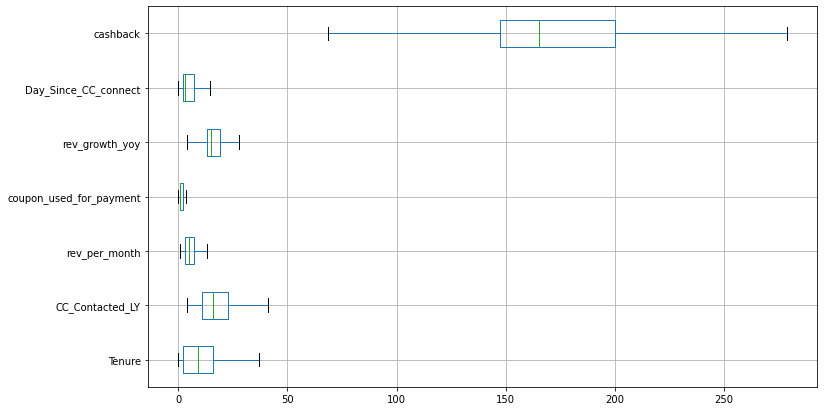

In [46]:
plt.figure(figsize=(12,7))
dfimputed.boxplot(['Tenure','CC_Contacted_LY','rev_per_month','coupon_used_for_payment','rev_growth_yoy','Day_Since_CC_connect', 'cashback'],vert=0)
plt.show()

**Churn target variable**

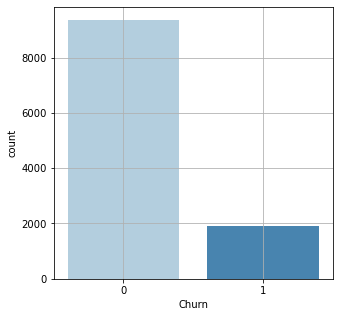

In [47]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=dfimputed['Churn'],palette="Blues",linewidth=1)
plt.grid()
plt.show()

In [48]:
table=dfimputed['Churn'].value_counts(normalize=True).to_frame()
table.columns=['Percentage']
table

Percentage
0    0.831527
1    0.168473

**Copying the data to perform univariate and bivariate analysis**

In [49]:
dfuni=dfimputed.copy(deep=True)

In [50]:
dfuni['account_segment'] = dfuni['account_segment'].replace({0:'Regular', 1:'Regular Plus', 2:'Super', 3:'Super Plus',4:'HNI'})
dfuni['Marital_Status'] = dfuni['Marital_Status'].replace({0:'Single', 1:'Married',2:'Divorced'})
dfuni['Payment'] = dfuni['Payment'].replace({0:'Debit Card',1:'Credit Card',2:'E wallet',3:'Cash on Delivery',4:'UPI'})
dfuni['Gender'] = dfuni['Gender'].replace({0:'Female',1:'Male'})
dfuni['Login_device'] = dfuni['Login_device'].replace({0:'Mobile',1:'Computer'})
dfuni['Complain_ly'] = dfuni['Complain_ly'].replace({0:'No',1:'Yes'})

In [51]:
dfuni.head()

City_Tier      Payment  Gender  Service_Score account_segment  \
0          3   Debit Card  Female              3           Super   
1          1          UPI    Male              3    Regular Plus   
2          1   Debit Card    Male              2    Regular Plus   
3          3   Debit Card    Male              2           Super   
4          1  Credit Card    Male              2    Regular Plus   

   CC_Agent_Score Marital_Status Complain_ly Login_device  Tenure  \
0               2         Single         Yes       Mobile     4.0   
1               3         Single         Yes       Mobile     0.0   
2               3         Single         Yes       Mobile     0.0   
3               5         Single          No       Mobile     0.0   
4               5         Single          No       Mobile     0.0   

   CC_Contacted_LY  rev_per_month  rev_growth_yoy  coupon_used_for_payment  \
0              6.0            9.0            11.0                      1.0   
1              8.0            7.0            15.0                      0.0   
2             30.0            6.0            14.0                      0.0   
3             15.0            8.0            23.0                      0.0   
4             12.0            3.0            11.0                      1.0   

   Day_Since_CC_connect  cashback  Account_user_count  Churn  
0                   5.0   159.930                   3      1  
1                   0.0   120.900                   4      1  
2                   3.0   141.708                   4      1  
3                   3.0   134.070                   4      1  
4                   3.0   129.600                   3      1

**Univariate Analysis Start**

In [52]:
cont_cols=['Tenure','CC_Contacted_LY','rev_per_month','rev_growth_yoy','cashback','Day_Since_CC_connect']
dis_cols=['City_Tier','Service_Score','CC_Agent_Score','Account_user_count','coupon_used_for_payment']
cat_cols=['Payment','Gender','account_segment','Marital_Status','Login_device','Complain_ly']

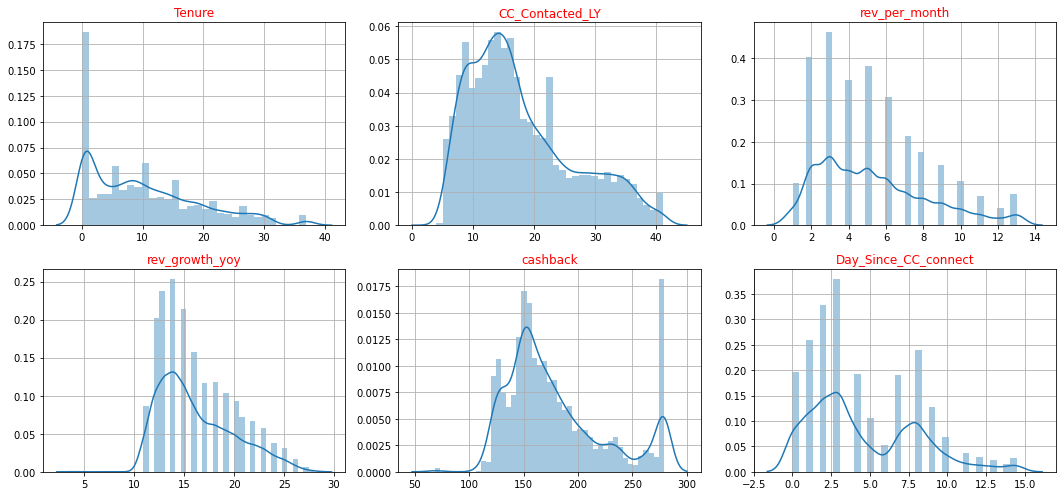

In [53]:
data_plot=dfuni[cont_cols]
fig=plt.figure(figsize=(15,7))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,3,i+1)
    sns.distplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    ax.set_xlabel("");
    ax.set_ylabel("");
    plt.grid()
plt.tight_layout()

**Skewness**

In [54]:
dfuni[cont_cols].agg(['skew']).transpose()

skew
Tenure                0.809506
CC_Contacted_LY       0.798983
rev_per_month         0.776484
rev_growth_yoy        0.752475
cashback              0.922570
Day_Since_CC_connect  0.718189

In [ ]:
# 	Skewness
# Fairly Symmetrical	-0.5 to 0.5
# Moderate Skewed	-0.5 to -1.0 and 0.5 to 1.0
# Highly Skewed	< -1.0 and > 1.0

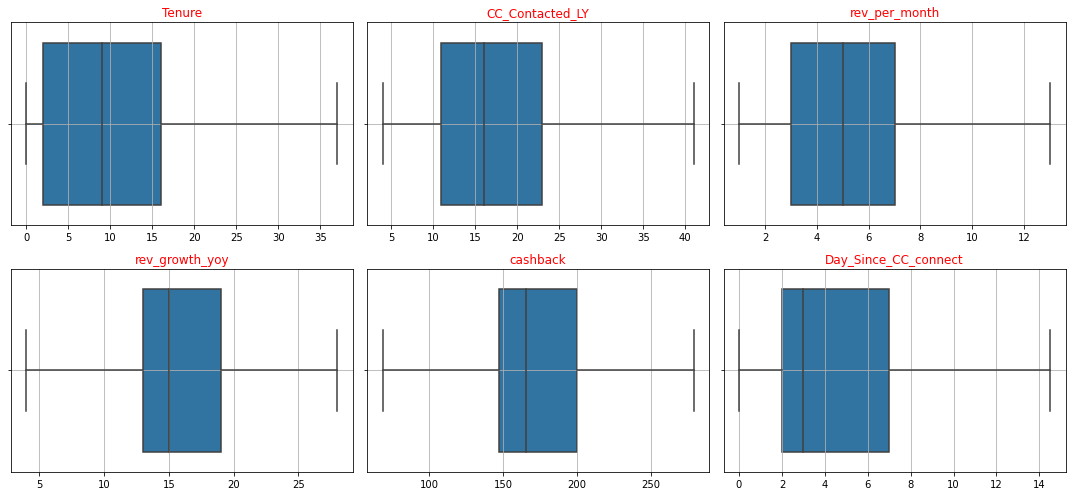

In [55]:
data_plot=dfuni[cont_cols]
fig=plt.figure(figsize=(15,7))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    ax.set_xlabel("");
    ax.set_ylabel("");
    plt.grid()
plt.tight_layout()

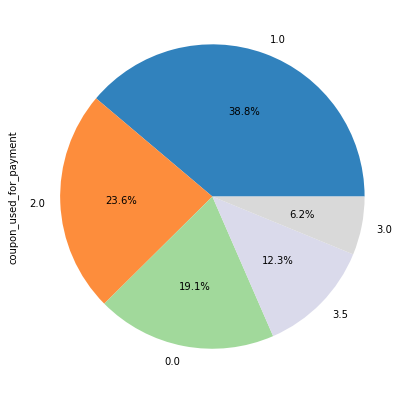

In [56]:
plt.figure(figsize=(15,7))
dfuni.coupon_used_for_payment.value_counts().plot.pie(autopct='%1.1f%%',cmap="tab20c")
plt.show()

Text(0.5, 1.0, 'coupon_used_for_payment')

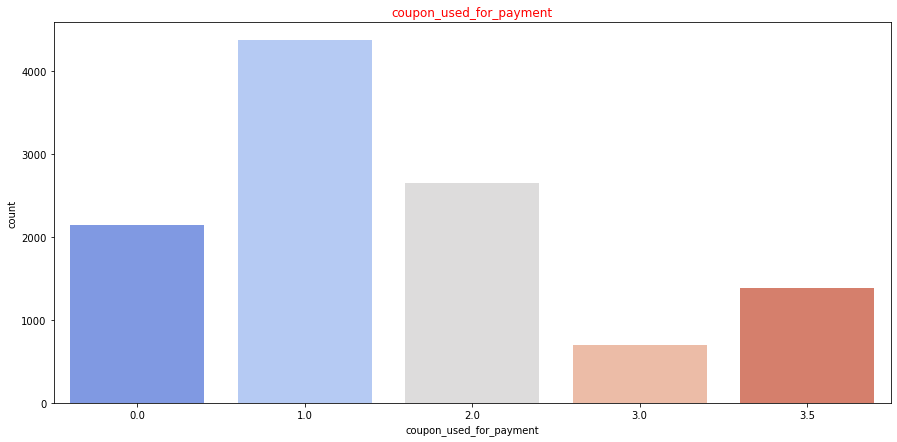

In [57]:
plt.figure(figsize=(15,7))
sns.countplot(dfuni.coupon_used_for_payment,palette='coolwarm')
plt.title('coupon_used_for_payment',color='Red')

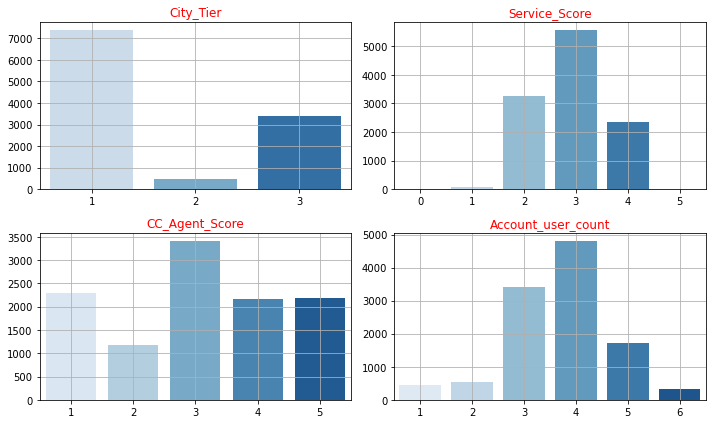

In [58]:
data_plot=dfuni[['City_Tier','Service_Score','CC_Agent_Score','Account_user_count']]
fig=plt.figure(figsize=(10,6))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,2,i+1)
    sns.countplot(data_plot[data_plot.columns[i]],palette='Blues')
    ax.set_title(data_plot.columns[i],color='Red')
    ax.set_xlabel("");
    ax.set_ylabel("");
    plt.grid()
plt.tight_layout()

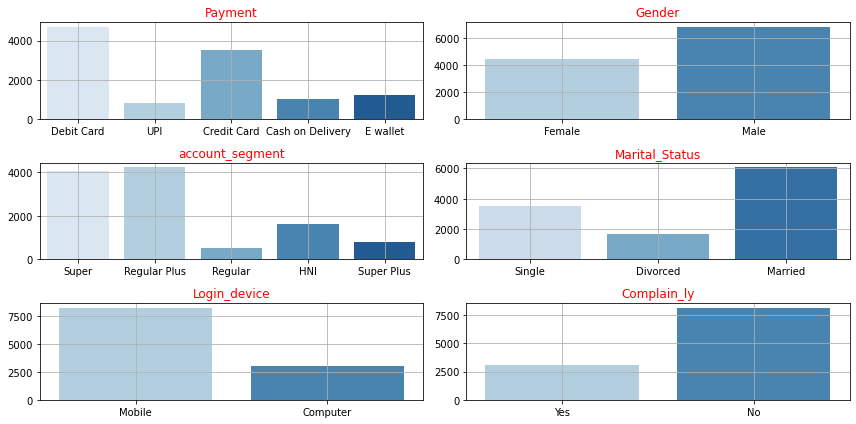

In [59]:
data_plot=dfuni[cat_cols]
fig=plt.figure(figsize=(12,6))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.countplot(data_plot[data_plot.columns[i]],palette='Blues')
    ax.set_title(data_plot.columns[i],color='Red')
    ax.set_xlabel("");
    ax.set_ylabel("");
    plt.grid()
plt.tight_layout()

**Bivariate/Multivariate Analysis Start**

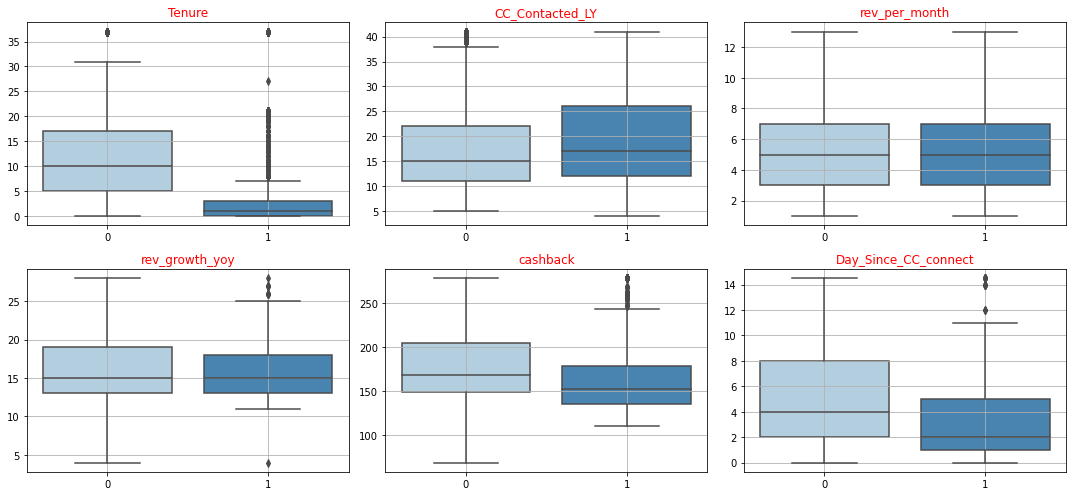

In [60]:
# sns.boxplot(dfuni['Churn'],dfuni['cashback']);
# cont_cols=['Tenure','CC_Contacted_LY','rev_per_month','rev_growth_yoy','cashback']
data_plot=dfuni[cont_cols]
fig=plt.figure(figsize=(15,7))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,3,i+1)
    sns.boxplot(dfuni['Churn'],data_plot[data_plot.columns[i]],palette='Blues');
    ax.set_title(data_plot.columns[i],color='Red')
    ax.set_xlabel("");
    ax.set_ylabel("");
    plt.grid()
plt.tight_layout()

<AxesSubplot:xlabel='account_segment', ylabel='CC_Contacted_LY'>

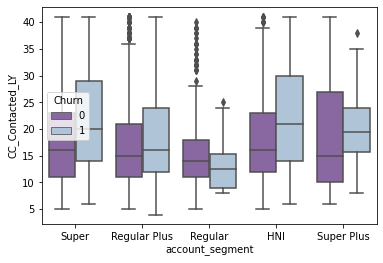

In [61]:
sns.boxplot(y=dfuni['CC_Contacted_LY'],x=dfuni.account_segment,hue=dfuni['Churn'],palette='BuPu_r') 

<AxesSubplot:xlabel='account_segment', ylabel='rev_growth_yoy'>

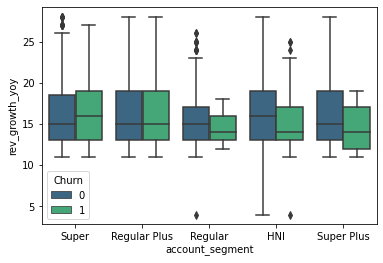

In [62]:
sns.boxplot(y=dfuni['rev_growth_yoy'],x=dfuni.account_segment,hue=dfuni['Churn'],palette='viridis') 

<AxesSubplot:xlabel='account_segment', ylabel='Tenure'>

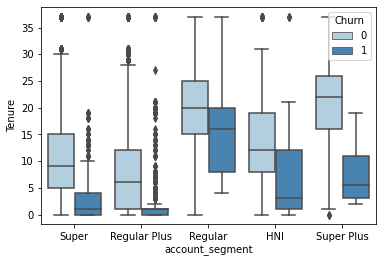

In [63]:
sns.boxplot(y=dfuni['Tenure'],x=dfuni.account_segment,hue=dfuni['Churn'],palette='Blues') 

Text(0.5, 1.0, 'No Customer Complaint')

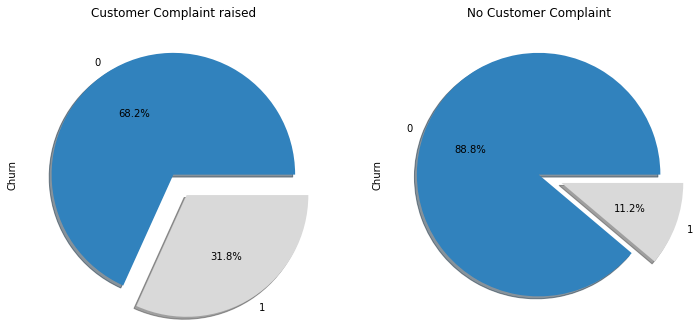

In [64]:
f,ax=plt.subplots(1,2,figsize=(12,6))
dfuni['Churn'][dfuni['Complain_ly']=='Yes'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,cmap="tab20c")
dfuni['Churn'][dfuni['Complain_ly']=='No'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True,cmap="tab20c")
ax[0].set_title('Customer Complaint raised')
ax[1].set_title('No Customer Complaint')

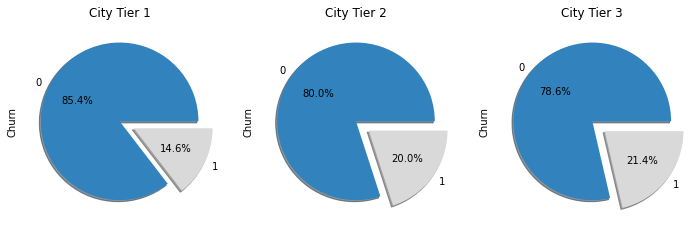

In [65]:
f,ax=plt.subplots(1,3,figsize=(12,6))
dfuni['Churn'][dfuni['City_Tier']==1].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,cmap="tab20c")
dfuni['Churn'][dfuni['City_Tier']==2].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True,cmap="tab20c")
dfuni['Churn'][dfuni['City_Tier']==3].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True,cmap="tab20c")
ax[0].set_title('City Tier 1')
ax[1].set_title('City Tier 2')
ax[2].set_title('City Tier 3')

plt.show()

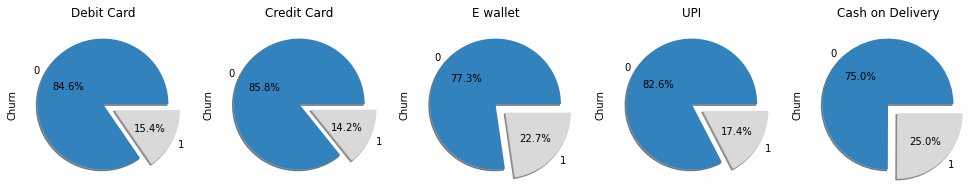

In [66]:
f,ax=plt.subplots(1,5,figsize=(17,8))
dfuni['Churn'][dfuni['Payment']=='Debit Card'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,cmap="tab20c")
dfuni['Churn'][dfuni['Payment']=='Credit Card'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True,cmap="tab20c")
dfuni['Churn'][dfuni['Payment']=='E wallet'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True,cmap="tab20c")
dfuni['Churn'][dfuni['Payment']=='UPI'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[3],shadow=True,cmap="tab20c")
dfuni['Churn'][dfuni['Payment']=='Cash on Delivery'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[4],shadow=True,cmap="tab20c")

ax[0].set_title('Debit Card')
ax[1].set_title('Credit Card')
ax[2].set_title('E wallet')
ax[3].set_title('UPI')
ax[4].set_title('Cash on Delivery')

plt.show()

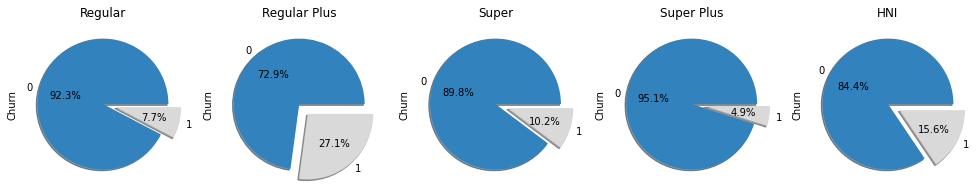

In [67]:
f,ax=plt.subplots(1,5,figsize=(17,8))
dfuni['Churn'][dfuni['account_segment']=='Regular'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,cmap="tab20c")
dfuni['Churn'][dfuni['account_segment']=='Regular Plus'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True,cmap="tab20c")
dfuni['Churn'][dfuni['account_segment']=='Super'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True,cmap="tab20c")
dfuni['Churn'][dfuni['account_segment']=='Super Plus'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[3],shadow=True,cmap="tab20c")
dfuni['Churn'][dfuni['account_segment']=='HNI'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[4],shadow=True,cmap="tab20c")

ax[0].set_title('Regular')
ax[1].set_title('Regular Plus')
ax[2].set_title('Super')
ax[3].set_title('Super Plus')
ax[4].set_title('HNI')

plt.show()

In [68]:
report = ProfileReport(dfuni)
report.to_file("Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

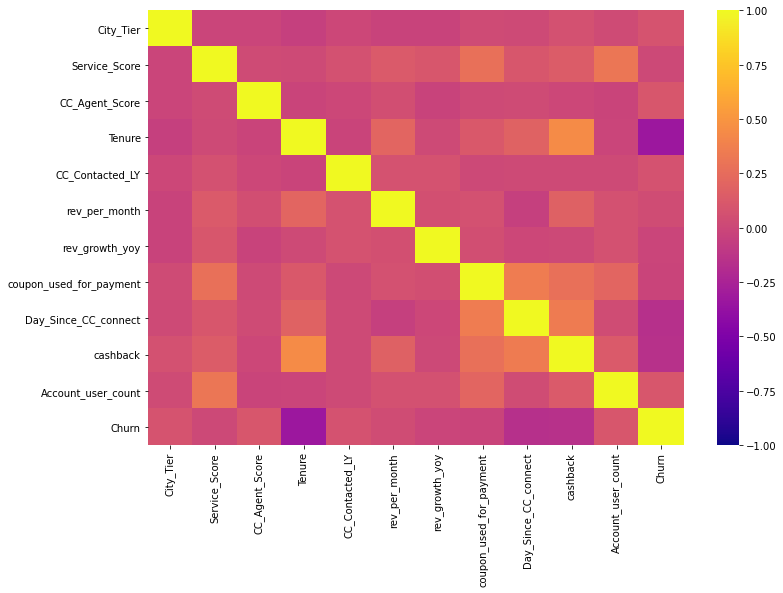

In [69]:
plt.figure(figsize = (12,8))
cor_matrix = dfuni.corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

**Train test split**

In [70]:
# Copy all the predictor variables into X dataframe
X = dfimputed.drop(['Churn'], axis=1)
# Copy target into the y dataframe. 
y = dfimputed[['Churn']]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=dfimputed['Churn'])

In [72]:
y.value_counts(normalize=True)

Churn
0        0.831527
1        0.168473
dtype: float64

In [73]:
y_train.value_counts(normalize=True)

Churn
0        0.831535
1        0.168465
dtype: float64

In [74]:
y_test.value_counts(normalize=True)

Churn
0        0.831507
1        0.168493
dtype: float64

**Unsupervised Learning**<br>
**Clustering - KMeans & KPrototype for mixed variables**

In [75]:
dfuni.head()

City_Tier      Payment  Gender  Service_Score account_segment  \
0          3   Debit Card  Female              3           Super   
1          1          UPI    Male              3    Regular Plus   
2          1   Debit Card    Male              2    Regular Plus   
3          3   Debit Card    Male              2           Super   
4          1  Credit Card    Male              2    Regular Plus   

   CC_Agent_Score Marital_Status Complain_ly Login_device  Tenure  \
0               2         Single         Yes       Mobile     4.0   
1               3         Single         Yes       Mobile     0.0   
2               3         Single         Yes       Mobile     0.0   
3               5         Single          No       Mobile     0.0   
4               5         Single          No       Mobile     0.0   

   CC_Contacted_LY  rev_per_month  rev_growth_yoy  coupon_used_for_payment  \
0              6.0            9.0            11.0                      1.0   
1              8.0            7.0            15.0                      0.0   
2             30.0            6.0            14.0                      0.0   
3             15.0            8.0            23.0                      0.0   
4             12.0            3.0            11.0                      1.0   

   Day_Since_CC_connect  cashback  Account_user_count  Churn  
0                   5.0   159.930                   3      1  
1                   0.0   120.900                   4      1  
2                   3.0   141.708                   4      1  
3                   3.0   134.070                   4      1  
4                   3.0   129.600                   3      1

In [76]:
data_orig=dfuni.copy(deep=True)

In [77]:
dfuni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11254 entries, 0 to 11253
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Tier                11254 non-null  int32  
 1   Payment                  11254 non-null  object 
 2   Gender                   11254 non-null  object 
 3   Service_Score            11254 non-null  int32  
 4   account_segment          11254 non-null  object 
 5   CC_Agent_Score           11254 non-null  int32  
 6   Marital_Status           11254 non-null  object 
 7   Complain_ly              11254 non-null  object 
 8   Login_device             11254 non-null  object 
 9   Tenure                   11254 non-null  float64
 10  CC_Contacted_LY          11254 non-null  float64
 11  rev_per_month            11254 non-null  float64
 12  rev_growth_yoy           11254 non-null  float64
 13  coupon_used_for_payment  11254 non-null  float64
 14  Day_Since_CC_connect  

In [78]:
#Preprocessing numerical
numerical = dfuni.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = dfuni.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(dfuni.select_dtypes(include='object').columns) / dfuni.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

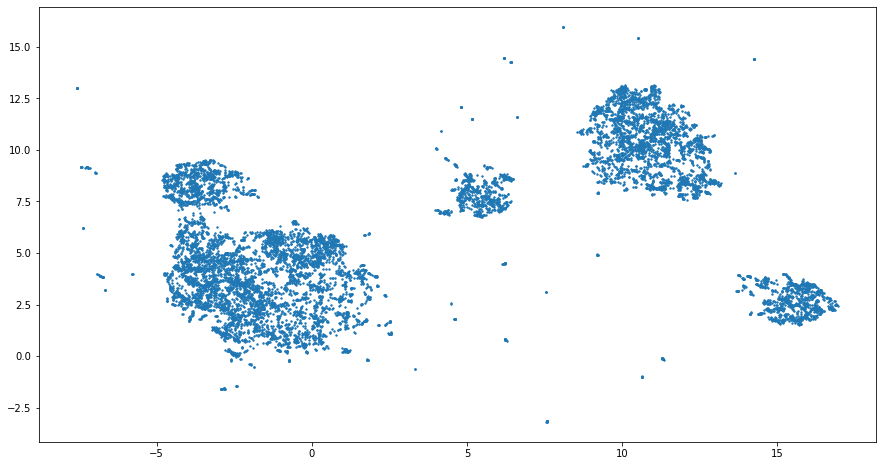

In [80]:
#Augmenting the numerical embedding with categorical
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)
embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric,fit1._densmap_kwds,fit1.output_dens,
                                                fit1._metric_kwds,False)

plt.figure(figsize=(15, 8))
plt.scatter(*np.array(embedding)[0].T, s=2, cmap='Spectral', alpha=1.0)
plt.show()

Below script will take long time to run, this is to figure out the optimum value of K

In [82]:
costs = []
n_clusters = []
cat_cols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 16, 17]
for i in tqdm(range(2, 10)):
    try:
        kproto = KPrototypes(n_clusters=i, init='Huang', verbose=2)
        clusters = kproto.fit_predict(dfuni, categorical=cat_cols)
        costs.append(kproto.cost_)
        n_clusters.append(i)
    except:
        print(f"Can't cluster with {i} clusters")

  0%|          | 0/8 [00:00<?, ?it/s]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3881, ncost: 11758356.169326115
Run: 1, iteration: 2/100, moves: 1671, ncost: 10118716.67634885
Run: 1, iteration: 3/100, moves: 549, ncost: 9858124.384451667
Run: 1, iteration: 4/100, moves: 166, ncost: 9834438.858229414
Run: 1, iteration: 5/100, moves: 28, ncost: 9833649.063374726
Run: 1, iteration: 6/100, moves: 12, ncost: 9833518.345152268
Run: 1, iteration: 7/100, moves: 8, ncost: 9833470.852543164
Run: 1, iteration: 8/100, moves: 3, ncost: 9833461.576571543
Run: 1, iteration: 9/100, moves: 0, ncost: 9833461.576571543
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 3404, ncost: 10456914.397635385
Run: 2, iteration: 2/100, moves: 887, ncost: 9888830.910490714
Run: 2, iteration: 3/100, moves: 232, ncost: 9837566.412029842
Run: 2, iteration: 4/100, moves: 65, ncost: 9833737.976748485
Run: 2, iteration: 5/100,

 12%|█▎        | 1/8 [02:27<17:09, 147.11s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 882, ncost: 6410028.96362222
Run: 1, iteration: 2/100, moves: 384, ncost: 6368332.475422409
Run: 1, iteration: 3/100, moves: 186, ncost: 6359181.801737126
Run: 1, iteration: 4/100, moves: 108, ncost: 6356411.129269601
Run: 1, iteration: 5/100, moves: 34, ncost: 6356133.692727632
Run: 1, iteration: 6/100, moves: 21, ncost: 6356062.44092379
Run: 1, iteration: 7/100, moves: 4, ncost: 6356058.817286167
Run: 1, iteration: 8/100, moves: 4, ncost: 6356056.314916943
Run: 1, iteration: 9/100, moves: 0, ncost: 6356056.314916943
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 801, ncost: 6539212.739906356
Run: 2, iteration: 2/100, moves: 537, ncost: 6439213.198000861
Run: 2, iteration: 3/100, moves: 445, ncost: 6383676.9564886475
Run: 2, iteration: 4/100, moves: 258, ncost: 6365256.664472437
Run: 2, iteration: 5/100, move

 25%|██▌       | 2/8 [05:39<17:23, 173.95s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1330, ncost: 5189765.3099421505
Run: 1, iteration: 2/100, moves: 538, ncost: 5153075.334207524
Run: 1, iteration: 3/100, moves: 268, ncost: 5142957.771242563
Run: 1, iteration: 4/100, moves: 141, ncost: 5140288.191202206
Run: 1, iteration: 5/100, moves: 92, ncost: 5139057.168616273
Run: 1, iteration: 6/100, moves: 62, ncost: 5138391.518895916
Run: 1, iteration: 7/100, moves: 57, ncost: 5137932.426330143
Run: 1, iteration: 8/100, moves: 27, ncost: 5137818.801550494
Run: 1, iteration: 9/100, moves: 10, ncost: 5137805.87319687
Run: 1, iteration: 10/100, moves: 6, ncost: 5137800.055012816
Run: 1, iteration: 11/100, moves: 5, ncost: 5137796.370687058
Run: 1, iteration: 12/100, moves: 2, ncost: 5137795.882813285
Run: 1, iteration: 13/100, moves: 0, ncost: 5137795.882813285
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, mov

Run: 5, iteration: 27/100, moves: 33, ncost: 5138201.1708558295
Run: 5, iteration: 28/100, moves: 46, ncost: 5137892.78999346
Run: 5, iteration: 29/100, moves: 18, ncost: 5137828.403797873
Run: 5, iteration: 30/100, moves: 15, ncost: 5137797.060817961
Run: 5, iteration: 31/100, moves: 5, ncost: 5137793.352106059
Run: 5, iteration: 32/100, moves: 1, ncost: 5137792.971655381
Run: 5, iteration: 33/100, moves: 0, ncost: 5137792.971655381
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 3015, ncost: 7687130.418406016
Run: 6, iteration: 2/100, moves: 2913, ncost: 6138394.012781928
Run: 6, iteration: 3/100, moves: 2205, ncost: 5496055.590592718
Run: 6, iteration: 4/100, moves: 1043, ncost: 5327065.444805842
Run: 6, iteration: 5/100, moves: 581, ncost: 5271107.228832984
Run: 6, iteration: 6/100, moves: 320, ncost: 5250711.524618854
Run: 6, iteration: 7/100, moves: 261, ncost: 5238747.09893417
Run: 6, iteration: 8/100, moves: 219, 

Starting iterations...
Run: 10, iteration: 1/100, moves: 1640, ncost: 6495759.33795363
Run: 10, iteration: 2/100, moves: 1073, ncost: 6297063.465018283
Run: 10, iteration: 3/100, moves: 489, ncost: 6247494.691268739
Run: 10, iteration: 4/100, moves: 213, ncost: 6236121.738342039
Run: 10, iteration: 5/100, moves: 108, ncost: 6233265.813299122
Run: 10, iteration: 6/100, moves: 47, ncost: 6232816.724995512
Run: 10, iteration: 7/100, moves: 18, ncost: 6232765.773092455
Run: 10, iteration: 8/100, moves: 2, ncost: 6232764.452299741
Run: 10, iteration: 9/100, moves: 0, ncost: 6232764.452299741
Best run was number 5


 38%|███▊      | 3/8 [13:37<26:02, 312.48s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2385, ncost: 4989096.317254443
Run: 1, iteration: 2/100, moves: 1463, ncost: 4750781.191236717
Run: 1, iteration: 3/100, moves: 1530, ncost: 4564497.161118933
Run: 1, iteration: 4/100, moves: 1053, ncost: 4479961.43049138
Run: 1, iteration: 5/100, moves: 633, ncost: 4445944.122463994
Run: 1, iteration: 6/100, moves: 353, ncost: 4432251.559802493
Run: 1, iteration: 7/100, moves: 310, ncost: 4422631.846809536
Run: 1, iteration: 8/100, moves: 172, ncost: 4419186.835262495
Run: 1, iteration: 9/100, moves: 89, ncost: 4418249.599151134
Run: 1, iteration: 10/100, moves: 74, ncost: 4417598.529604935
Run: 1, iteration: 11/100, moves: 53, ncost: 4417311.464035688
Run: 1, iteration: 12/100, moves: 23, ncost: 4417245.745590052
Run: 1, iteration: 13/100, moves: 21, ncost: 4417202.078423097
Run: 1, iteration: 14/100, moves: 9, ncost: 4417194.057048883
Run: 1, iteration: 15/100, moves: 0, 

Run: 8, iteration: 16/100, moves: 1, ncost: 4417195.913289948
Run: 8, iteration: 17/100, moves: 0, ncost: 4417195.913289948
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 1980, ncost: 4762287.173965421
Run: 9, iteration: 2/100, moves: 757, ncost: 4682003.198337891
Run: 9, iteration: 3/100, moves: 706, ncost: 4625109.629681641
Run: 9, iteration: 4/100, moves: 793, ncost: 4561829.967572479
Run: 9, iteration: 5/100, moves: 748, ncost: 4509877.924370692
Run: 9, iteration: 6/100, moves: 673, ncost: 4467198.8594692955
Run: 9, iteration: 7/100, moves: 482, ncost: 4446285.0670453
Run: 9, iteration: 8/100, moves: 291, ncost: 4438371.952261336
Run: 9, iteration: 9/100, moves: 243, ncost: 4427062.703718311
Run: 9, iteration: 10/100, moves: 249, ncost: 4420653.92386585
Run: 9, iteration: 11/100, moves: 122, ncost: 4418604.200249774
Run: 9, iteration: 12/100, moves: 82, ncost: 4417836.261051297
Run: 9, iteration: 13/100, moves: 72, n

 50%|█████     | 4/8 [18:54<20:57, 314.27s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3089, ncost: 4638697.70204978
Run: 1, iteration: 2/100, moves: 1972, ncost: 4318827.160356602
Run: 1, iteration: 3/100, moves: 883, ncost: 4245344.321411705
Run: 1, iteration: 4/100, moves: 582, ncost: 4221729.310785293
Run: 1, iteration: 5/100, moves: 477, ncost: 4199256.376127998
Run: 1, iteration: 6/100, moves: 639, ncost: 4165890.0198812475
Run: 1, iteration: 7/100, moves: 510, ncost: 4146289.926348746
Run: 1, iteration: 8/100, moves: 354, ncost: 4134180.582149951
Run: 1, iteration: 9/100, moves: 317, ncost: 4125013.3158659795
Run: 1, iteration: 10/100, moves: 226, ncost: 4119470.32110397
Run: 1, iteration: 11/100, moves: 198, ncost: 4115857.516412719
Run: 1, iteration: 12/100, moves: 103, ncost: 4114804.759113087
Run: 1, iteration: 13/100, moves: 58, ncost: 4114569.120949761
Run: 1, iteration: 14/100, moves: 24, ncost: 4114520.7481788225
Run: 1, iteration: 15/100, moves

Run: 7, iteration: 2/100, moves: 736, ncost: 4154866.625915288
Run: 7, iteration: 3/100, moves: 396, ncost: 4139522.2991945897
Run: 7, iteration: 4/100, moves: 365, ncost: 4128967.161079148
Run: 7, iteration: 5/100, moves: 251, ncost: 4122109.697472407
Run: 7, iteration: 6/100, moves: 198, ncost: 4117998.961857037
Run: 7, iteration: 7/100, moves: 157, ncost: 4115430.2272014376
Run: 7, iteration: 8/100, moves: 82, ncost: 4114723.7514089774
Run: 7, iteration: 9/100, moves: 49, ncost: 4114557.850952674
Run: 7, iteration: 10/100, moves: 22, ncost: 4114518.0837336653
Run: 7, iteration: 11/100, moves: 17, ncost: 4114495.6025718707
Run: 7, iteration: 12/100, moves: 4, ncost: 4114490.1733607436
Run: 7, iteration: 13/100, moves: 2, ncost: 4114488.782891555
Run: 7, iteration: 14/100, moves: 2, ncost: 4114486.968167109
Run: 7, iteration: 15/100, moves: 2, ncost: 4114486.493058113
Run: 7, iteration: 16/100, moves: 0, ncost: 4114486.493058113
Init: initializing centroids
Init: initializing clusters

 62%|██████▎   | 5/8 [25:01<16:40, 333.56s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3142, ncost: 4084224.9558031787
Run: 1, iteration: 2/100, moves: 824, ncost: 4016488.6020890153
Run: 1, iteration: 3/100, moves: 512, ncost: 3991284.3306620196
Run: 1, iteration: 4/100, moves: 435, ncost: 3972939.8667772496
Run: 1, iteration: 5/100, moves: 325, ncost: 3963585.7413062872
Run: 1, iteration: 6/100, moves: 248, ncost: 3956563.787885954
Run: 1, iteration: 7/100, moves: 254, ncost: 3950913.8632941023
Run: 1, iteration: 8/100, moves: 137, ncost: 3949326.1846337
Run: 1, iteration: 9/100, moves: 101, ncost: 3948658.835824188
Run: 1, iteration: 10/100, moves: 65, ncost: 3948370.5354427947
Run: 1, iteration: 11/100, moves: 44, ncost: 3948208.822409554
Run: 1, iteration: 12/100, moves: 27, ncost: 3948139.174688177
Run: 1, iteration: 13/100, moves: 22, ncost: 3948070.452879188
Run: 1, iteration: 14/100, moves: 19, ncost: 3947985.7947894526
Run: 1, iteration: 15/100, move

Starting iterations...
Run: 7, iteration: 1/100, moves: 3173, ncost: 4693158.320332992
Run: 7, iteration: 2/100, moves: 1505, ncost: 4388728.872288948
Run: 7, iteration: 3/100, moves: 1053, ncost: 4212566.407901656
Run: 7, iteration: 4/100, moves: 772, ncost: 4127798.657099191
Run: 7, iteration: 5/100, moves: 539, ncost: 4103978.2449086807
Run: 7, iteration: 6/100, moves: 353, ncost: 4094726.0819133064
Run: 7, iteration: 7/100, moves: 256, ncost: 4089861.921820306
Run: 7, iteration: 8/100, moves: 188, ncost: 4086814.3513684017
Run: 7, iteration: 9/100, moves: 188, ncost: 4083640.1618574285
Run: 7, iteration: 10/100, moves: 176, ncost: 4080432.9617600315
Run: 7, iteration: 11/100, moves: 229, ncost: 4074648.7469076784
Run: 7, iteration: 12/100, moves: 343, ncost: 4064965.292641607
Run: 7, iteration: 13/100, moves: 486, ncost: 4039666.0760183604
Run: 7, iteration: 14/100, moves: 745, ncost: 3994499.67476931
Run: 7, iteration: 15/100, moves: 717, ncost: 3959911.2897127965
Run: 7, iteratio

 75%|███████▌  | 6/8 [33:37<13:10, 395.40s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3382, ncost: 4485060.106299228
Run: 1, iteration: 2/100, moves: 1699, ncost: 4122230.840614228
Run: 1, iteration: 3/100, moves: 1032, ncost: 3948956.3206397705
Run: 1, iteration: 4/100, moves: 695, ncost: 3879530.5666368674
Run: 1, iteration: 5/100, moves: 741, ncost: 3814737.655892857
Run: 1, iteration: 6/100, moves: 454, ncost: 3793796.6473255483
Run: 1, iteration: 7/100, moves: 265, ncost: 3783797.4963911255
Run: 1, iteration: 8/100, moves: 190, ncost: 3779815.11620129
Run: 1, iteration: 9/100, moves: 114, ncost: 3778710.5290206997
Run: 1, iteration: 10/100, moves: 75, ncost: 3778271.7141657453
Run: 1, iteration: 11/100, moves: 52, ncost: 3778049.460835767
Run: 1, iteration: 12/100, moves: 81, ncost: 3774334.7410689075
Run: 1, iteration: 13/100, moves: 113, ncost: 3772955.0853973017
Run: 1, iteration: 14/100, moves: 87, ncost: 3772317.335030234
Run: 1, iteration: 15/100, 

Run: 7, iteration: 6/100, moves: 317, ncost: 3819305.3753931434
Run: 7, iteration: 7/100, moves: 264, ncost: 3808392.9909586846
Run: 7, iteration: 8/100, moves: 214, ncost: 3803001.0221572234
Run: 7, iteration: 9/100, moves: 116, ncost: 3801284.862697107
Run: 7, iteration: 10/100, moves: 81, ncost: 3800656.007344377
Run: 7, iteration: 11/100, moves: 62, ncost: 3800236.134275306
Run: 7, iteration: 12/100, moves: 29, ncost: 3800129.393144764
Run: 7, iteration: 13/100, moves: 4, ncost: 3800123.8874901817
Run: 7, iteration: 14/100, moves: 1, ncost: 3800123.6829326632
Run: 7, iteration: 15/100, moves: 0, ncost: 3800123.6829326632
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/100, moves: 1707, ncost: 4237949.635249557
Run: 8, iteration: 2/100, moves: 1340, ncost: 4098776.5997967958
Run: 8, iteration: 3/100, moves: 1619, ncost: 3932821.178020456
Run: 8, iteration: 4/100, moves: 893, ncost: 3894122.4675818495
Run: 8, iteration: 5/100, move

 88%|████████▊ | 7/8 [40:57<06:49, 409.90s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1982, ncost: 3803330.3929452403
Run: 1, iteration: 2/100, moves: 741, ncost: 3777990.4198450698
Run: 1, iteration: 3/100, moves: 650, ncost: 3742741.7757915305
Run: 1, iteration: 4/100, moves: 846, ncost: 3688999.76141531
Run: 1, iteration: 5/100, moves: 776, ncost: 3655965.0171802426
Run: 1, iteration: 6/100, moves: 429, ncost: 3643126.1550156954
Run: 1, iteration: 7/100, moves: 234, ncost: 3638311.789594968
Run: 1, iteration: 8/100, moves: 157, ncost: 3636553.6516463147
Run: 1, iteration: 9/100, moves: 96, ncost: 3634531.029891876
Run: 1, iteration: 10/100, moves: 123, ncost: 3633205.0027164984
Run: 1, iteration: 11/100, moves: 69, ncost: 3632606.876525989
Run: 1, iteration: 12/100, moves: 85, ncost: 3631885.3121700548
Run: 1, iteration: 13/100, moves: 49, ncost: 3631630.0819773944
Run: 1, iteration: 14/100, moves: 20, ncost: 3631578.3916458166
Run: 1, iteration: 15/100, m

Run: 5, iteration: 10/100, moves: 88, ncost: 3836767.25442017
Run: 5, iteration: 11/100, moves: 71, ncost: 3836130.2483587214
Run: 5, iteration: 12/100, moves: 95, ncost: 3834907.317657048
Run: 5, iteration: 13/100, moves: 84, ncost: 3834203.581381289
Run: 5, iteration: 14/100, moves: 66, ncost: 3833880.7101813434
Run: 5, iteration: 15/100, moves: 47, ncost: 3833635.87617871
Run: 5, iteration: 16/100, moves: 60, ncost: 3833069.3677102695
Run: 5, iteration: 17/100, moves: 51, ncost: 3832807.6283998024
Run: 5, iteration: 18/100, moves: 33, ncost: 3832681.095939653
Run: 5, iteration: 19/100, moves: 34, ncost: 3832539.7272722595
Run: 5, iteration: 20/100, moves: 35, ncost: 3832315.9199991575
Run: 5, iteration: 21/100, moves: 118, ncost: 3828557.0966408434
Run: 5, iteration: 22/100, moves: 202, ncost: 3818006.1127315243
Run: 5, iteration: 23/100, moves: 308, ncost: 3798751.219331825
Run: 5, iteration: 24/100, moves: 337, ncost: 3784767.5711069712
Run: 5, iteration: 25/100, moves: 257, ncost

100%|██████████| 8/8 [51:13<00:00, 384.15s/it]


In [83]:
n_clusters

[2, 3, 4, 5, 6, 7, 8, 9]

In [84]:
fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs))
fig.update_layout(
    title={
        'text': "Cluster Plot with K-Prototype",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [79]:
cat_cols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 16, 17]

In [80]:
kproto = KPrototypes(n_clusters=3, verbose=2,max_iter=20)
clusters = kproto.fit_predict(dfuni, categorical=cat_cols)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 1877, ncost: 6828458.130197618
Run: 1, iteration: 2/20, moves: 1089, ncost: 6440442.039266123
Run: 1, iteration: 3/20, moves: 512, ncost: 6378269.985881276
Run: 1, iteration: 4/20, moves: 243, ncost: 6362672.766973456
Run: 1, iteration: 5/20, moves: 148, ncost: 6357055.439269193
Run: 1, iteration: 6/20, moves: 65, ncost: 6356184.86075614
Run: 1, iteration: 7/20, moves: 29, ncost: 6356063.459841596
Run: 1, iteration: 8/20, moves: 3, ncost: 6356060.752209658
Run: 1, iteration: 9/20, moves: 2, ncost: 6356058.817286177
Run: 1, iteration: 10/20, moves: 4, ncost: 6356056.314916951
Run: 1, iteration: 11/20, moves: 0, ncost: 6356056.314916951
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 2187, ncost: 6388362.461839363
Run: 2, iteration: 2/20, m

In [81]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [82]:
print(kproto.cluster_centroids_)

[['7.2950266429840145' '17.41847246891652' '4.828952042628774'
  '16.10639431616341' '1.1895204262877441' '3.447779751332149'
  '143.91754067495583' '1' 'Debit Card' 'Male' '3' 'Regular Plus' '3'
  'Married' 'No' 'Mobile' '3' '0']
 ['10.592763873775842' '18.458106637649617' '5.543525571273123'
  '16.32480957562568' '1.6892002176278564' '5.344668117519042'
  '187.30403971708367' '1' 'Debit Card' 'Male' '3' 'Super' '3' 'Married'
  'No' 'Mobile' '4' '0']
 ['18.18839835728953' '17.792094455852155' '6.087782340862423'
  '16.191991786447637' '1.8986139630390144' '6.448921971252567'
  '262.25157597536133' '1' 'Debit Card' 'Male' '3' 'Super Plus' '3'
  'Married' 'No' 'Mobile' '4' '0']]


In [83]:
dfuni['cluster']=cluster_dict

In [84]:
dfuni.cluster.value_counts().sort_index()

0    5630
1    3676
2    1948
Name: cluster, dtype: int64

In [85]:
churn_seg_df = pd.DataFrame(kproto.cluster_centroids_, columns =['Tenure','CC Contacted LY','rev_per_month','reve_growth_yoy','coupon used for payment','Day Since CC Connect','Cashback','City Tier','Payment','Marital status','Service Score','account segment','CC Agent Score','Marital Status','Complain LY','Login Device','Account User Count','Churn'])

In [86]:
churn_seg_df

Tenure     CC Contacted LY      rev_per_month  \
0  7.2950266429840145   17.41847246891652  4.828952042628774   
1  10.592763873775842  18.458106637649617  5.543525571273123   
2   18.18839835728953  17.792094455852155  6.087782340862423   

      reve_growth_yoy coupon used for payment Day Since CC Connect  \
0   16.10639431616341      1.1895204262877441    3.447779751332149   
1   16.32480957562568      1.6892002176278564    5.344668117519042   
2  16.191991786447637      1.8986139630390144    6.448921971252567   

             Cashback City Tier     Payment Marital status Service Score  \
0  143.91754067495583         1  Debit Card           Male             3   
1  187.30403971708367         1  Debit Card           Male             3   
2  262.25157597536133         1  Debit Card           Male             3   

  account segment CC Agent Score Marital Status Complain LY Login Device  \
0    Regular Plus              3        Married          No       Mobile   
1           Super              3        Married          No       Mobile   
2      Super Plus              3        Married          No       Mobile   

  Account User Count Churn  
0                  3     0  
1                  4     0  
2                  4     0

In [87]:
churn_seg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Tenure                   3 non-null      object
 1   CC Contacted LY          3 non-null      object
 2   rev_per_month            3 non-null      object
 3   reve_growth_yoy          3 non-null      object
 4   coupon used for payment  3 non-null      object
 5   Day Since CC Connect     3 non-null      object
 6   Cashback                 3 non-null      object
 7   City Tier                3 non-null      object
 8   Payment                  3 non-null      object
 9   Marital status           3 non-null      object
 10  Service Score            3 non-null      object
 11  account segment          3 non-null      object
 12  CC Agent Score           3 non-null      object
 13  Marital Status           3 non-null      object
 14  Complain LY              3 non-null      objec

In [88]:
for column in ['Tenure','CC Contacted LY','rev_per_month','reve_growth_yoy','coupon used for payment','Day Since CC Connect','City Tier','Service Score','CC Agent Score','Account User Count','Churn']:
    churn_seg_df[column]=churn_seg_df[column].astype(float)
    churn_seg_df[column]=churn_seg_df[column].round(decimals=0)

In [89]:
churn_seg_df['Cashback']=churn_seg_df['Cashback'].astype(float)
churn_seg_df['Cashback']=churn_seg_df['Cashback'].round(decimals=2)

In [90]:
for column in ['Tenure','CC Contacted LY','rev_per_month','reve_growth_yoy','coupon used for payment','Day Since CC Connect','City Tier','Service Score','CC Agent Score','Account User Count','Churn']:
    churn_seg_df[column]=churn_seg_df[column].astype(int)

In [91]:
churn_seg_df.rename(index={0:'Segment 1',1:'Segment 2',2:'Segment 3'},inplace=True)

In [92]:
churn_seg_df.T

Segment 1   Segment 2   Segment 3
Tenure                              7          11          18
CC Contacted LY                    17          18          18
rev_per_month                       5           6           6
reve_growth_yoy                    16          16          16
coupon used for payment             1           2           2
Day Since CC Connect                3           5           6
Cashback                       143.92       187.3      262.25
City Tier                           1           1           1
Payment                    Debit Card  Debit Card  Debit Card
Marital status                   Male        Male        Male
Service Score                       3           3           3
account segment          Regular Plus       Super  Super Plus
CC Agent Score                      3           3           3
Marital Status                Married     Married     Married
Complain LY                        No          No          No
Login Device                   Mobile      Mobile      Mobile
Account User Count                  3           4           4
Churn                               0           0           0

In [98]:
dfuni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11254 entries, 0 to 11253
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Tier                11254 non-null  int32  
 1   Payment                  11254 non-null  object 
 2   Gender                   11254 non-null  object 
 3   Service_Score            11254 non-null  int32  
 4   account_segment          11254 non-null  object 
 5   CC_Agent_Score           11254 non-null  int32  
 6   Marital_Status           11254 non-null  object 
 7   Complain_ly              11254 non-null  object 
 8   Login_device             11254 non-null  object 
 9   Tenure                   11254 non-null  float64
 10  CC_Contacted_LY          11254 non-null  float64
 11  rev_per_month            11254 non-null  float64
 12  rev_growth_yoy           11254 non-null  float64
 13  coupon_used_for_payment  11254 non-null  float64
 14  Day_Since_CC_connect  

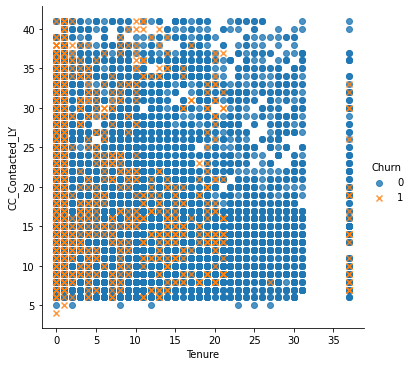

In [99]:
sns.lmplot(x='Tenure'
           ,y='CC_Contacted_LY'
           ,data=dfuni
           ,hue='Churn'
            ,fit_reg=False
            ,markers=["o", "x"]
            ,palette= 'tab10')
plt.show()

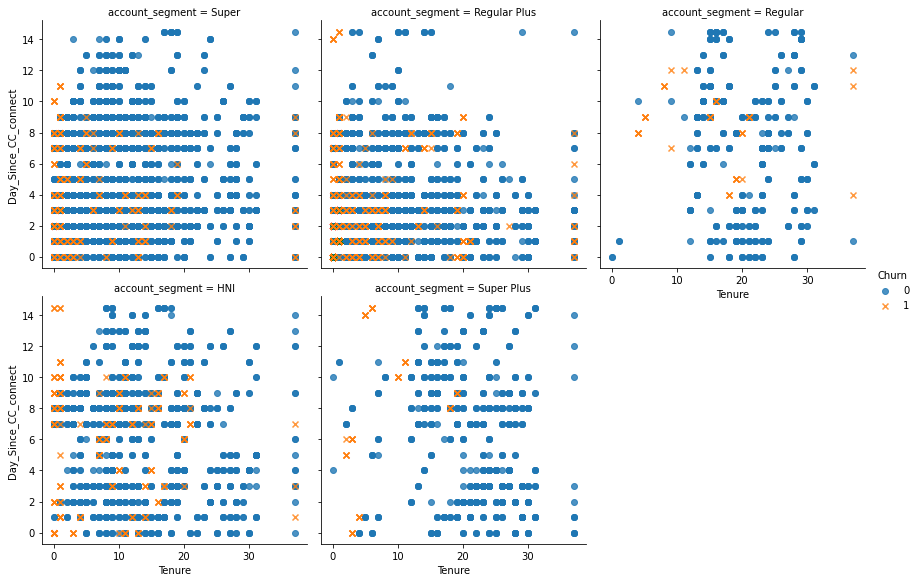

In [100]:
sns.lmplot(x='Tenure'
           ,y='Day_Since_CC_connect'
           ,data=dfuni
           ,hue='Churn'
           ,col='account_segment'
            ,fit_reg=False
            ,markers=["o", "x"]
            ,palette= 'tab10'
           ,height=4
           ,col_wrap=3
           )
plt.show()

# <font color='red'>PROJECT NOTES - 2 STARTS HERE</font>

# <font color='blue'>Base Model Building</font>

In [93]:
dfimputed.head()

City_Tier  Payment  Gender  Service_Score  account_segment  CC_Agent_Score  \
0          3        0       0              3                2               2   
1          1        4       1              3                1               3   
2          1        0       1              2                1               3   
3          3        0       1              2                2               5   
4          1        1       1              2                1               5   

   Marital_Status  Complain_ly  Login_device  Tenure  CC_Contacted_LY  \
0               0            1             0     4.0              6.0   
1               0            1             0     0.0              8.0   
2               0            1             0     0.0             30.0   
3               0            0             0     0.0             15.0   
4               0            0             0     0.0             12.0   

   rev_per_month  rev_growth_yoy  coupon_used_for_payment  \
0            9.0            11.0                      1.0   
1            7.0            15.0                      0.0   
2            6.0            14.0                      0.0   
3            8.0            23.0                      0.0   
4            3.0            11.0                      1.0   

   Day_Since_CC_connect  cashback  Account_user_count  Churn  
0                   5.0   159.930                   3      1  
1                   0.0   120.900                   4      1  
2                   3.0   141.708                   4      1  
3                   3.0   134.070                   4      1  
4                   3.0   129.600                   3      1

In [94]:
dfimputed.Churn.value_counts(normalize=True)

0    0.831527
1    0.168473
Name: Churn, dtype: float64

In [95]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

7877
3377
7877
3377


In [96]:
#create list of model and accuracy dicts

perform_list = [ ]

def run_model(model_name):
    mdl=''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Linear Discriminant Analysis':
        mdl = LinearDiscriminantAnalysis()
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100, random_state=1)
    elif model_name == 'Gradient Boost Classifier':
        mdl = GradientBoostingClassifier(random_state=1)

#     oneVsRest = OneVsRestClassifier(mdl)
#     oneVsRest.fit(x_train, y_train)
#     y_pred = oneVsRest.predict(x_test)
#     oneVsRest = OneVsRestClassifier(mdl)
#     oneVsRest.fit(X_train, y_train)
#     y_pred = oneVsRest.predict(X_test)

    mdl.fit(X_train, y_train)
    y_pred_train = mdl.predict(X_train)
    y_pred_test = mdl.predict(X_test)
   
    # Train Data - Performance metrics
    train_accuracy = round(accuracy_score(y_train, y_pred_train) * 100, 2)
    
    mdl_metrics_train=classification_report(y_train,y_pred_train,output_dict=True)
    mdf_train=pd.DataFrame(mdl_metrics_train).transpose()
    train_precision=round((mdf_train.loc["1"][0])*100,2)
    train_recall=round((mdf_train.loc["1"][1])*100,2)
    train_f1score=round((mdf_train.loc["1"][2])*100,2)
    
    train_probs = mdl.predict_proba(X_train)
    train_probs = train_probs[:, 1]
    train_auc= round(roc_auc_score(y_train, train_probs) * 100, 2)
    
#   Test Data - Performance metrics 
    test_accuracy = round(accuracy_score(y_test, y_pred_test) * 100, 2)
    
    mdl_metrics_test=classification_report(y_test,y_pred_test,output_dict=True)
#     print(mdl_metrics)
    mdf_test=pd.DataFrame(mdl_metrics_test).transpose()
#     print(mdf)
    test_precision=round((mdf_test.loc["1"][0])*100,2)
    test_recall=round((mdf_test.loc["1"][1])*100,2)
    test_f1score=round((mdf_test.loc["1"][2])*100,2)
    
    test_probs = mdl.predict_proba(X_test)
    test_probs = test_probs[:, 1]
    test_auc= round(roc_auc_score(y_test, test_probs) * 100, 2)
    
    print(f'Performance metrics for Train {model_name}')
    print('**************************************************')
    print(f'Accuarcy: {train_accuracy}%')
    print(f'Precision : {train_precision}%')
    print(f'Recall : {train_recall}%')
    print(f'F1-score : {train_f1score}%')
    print(f'AUC-score: {train_auc}%')
    print('-----------------------')
    print(f'Performance metrics for Test {model_name}')
    print('***************************************************')
    print(f'Accuracy: {test_accuracy}%')
    print(f'Precision : {test_precision}%')
    print(f'Recall : {test_recall}%')
    print(f'F1-score : {test_f1score}%')
    print(f'AUC-score: {test_auc}%')
    
#     ROC Curve for Train and Test
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(train_fpr, train_tpr);
    plt.xlabel('False positive Rate')
    plt.ylabel('True positive Rate')
          
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(test_fpr, test_tpr);
    plt.xlabel('False positive Rate')
    plt.ylabel('True positive Rate')
#   Feature Importances
    if (model_name == 'Logistic Regression') or (model_name == 'Linear Discriminant Analysis'):
        fig, ax = plt.subplots()
        ax = Series(mdl.coef_[0],X_train.columns).sort_values()
        ax.plot(kind='bar', title='Model Coefficients')    
    elif (model_name == 'Decision Tree Classifier') or (model_name == 'Random Forest') or (model_name == 'Gradient Boost Classifier'):
        x=pd.DataFrame(mdl.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
        plt.figure(figsize=(10,5))
        sns.barplot(x[0],x.index,palette='rainbow')
        plt.ylabel('Feature Name')
        plt.xlabel('Feature Importance in %')
        plt.title('Feature Importance Plot')
        plt.show()

    
#     Confusion Matrix for Train and test
    f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(12,5))
    sns.set(font_scale=1.0)
    plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_pred_train)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][0]);
    a[0][0].set_title('Train Data');
    plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_pred_test)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
    a[0][1].set_title('Test Data');
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

        
#     # Add performance parameters to list

    perform_list.append(dict([('Model', model_name),('Train Accuracy', round(train_accuracy, 2)),('Test Accuracy', round(test_accuracy, 2)),
                              ('Train Precision', round(train_precision, 2)),('Test Precision', round(test_precision, 2)),
                              ('Train Recall', round(train_recall, 2)),('Test Recall', round(test_recall, 2)),
                              ('Train F1', round(train_f1score, 2)),('Test F1', round(test_f1score, 2)),
                              ('Train AUC', round(train_auc, 2)),('Test AUC', round(test_auc, 2))]))

**Linear,non-linear and Ensemble models**

Performance metrics for Train Logistic Regression
**************************************************
Accuarcy: 87.88%
Precision : 71.63%
Recall : 46.42%
F1-score : 56.33%
AUC-score: 86.55%
-----------------------
Performance metrics for Test Logistic Regression
***************************************************
Accuracy: 87.83%
Precision : 71.82%
Recall : 45.69%
F1-score : 55.85%
AUC-score: 84.0%


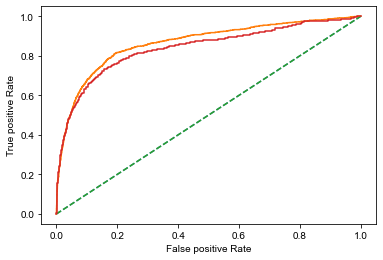

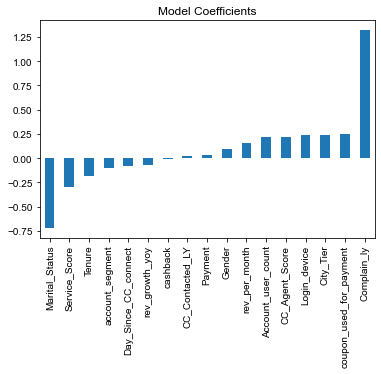

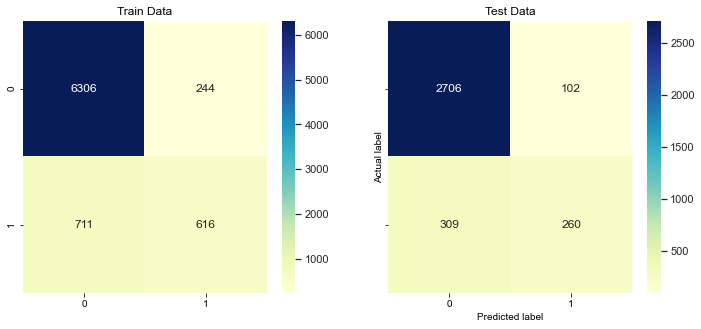

In [97]:
run_model('Logistic Regression')

Performance metrics for Train Linear Discriminant Analysis
**************************************************
Accuarcy: 87.7%
Precision : 74.32%
Recall : 41.22%
F1-score : 53.03%
AUC-score: 86.24%
-----------------------
Performance metrics for Test Linear Discriminant Analysis
***************************************************
Accuracy: 88.21%
Precision : 78.79%
Recall : 41.12%
F1-score : 54.04%
AUC-score: 83.5%


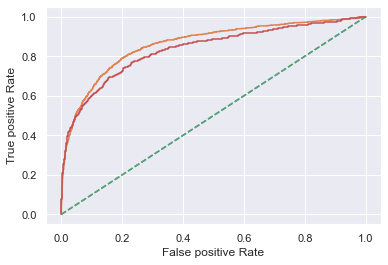

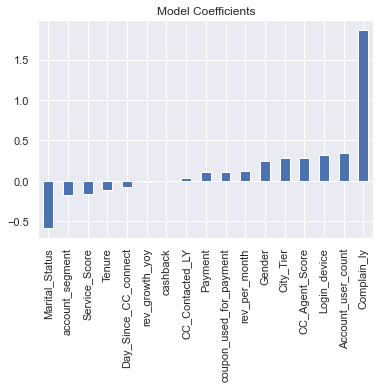

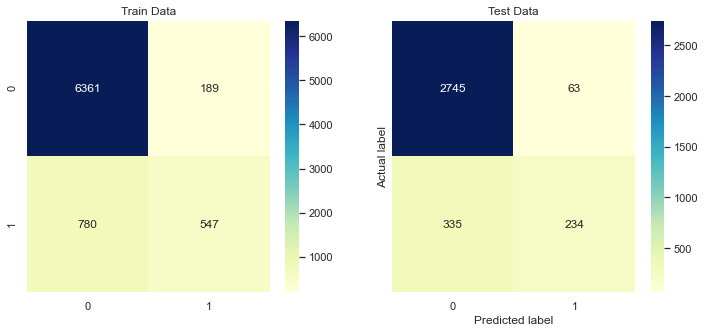

In [98]:
run_model('Linear Discriminant Analysis')

Performance metrics for Train Gaussian Naive Bayes
**************************************************
Accuarcy: 86.58%
Precision : 60.29%
Recall : 59.61%
F1-score : 59.95%
AUC-score: 82.85%
-----------------------
Performance metrics for Test Gaussian Naive Bayes
***************************************************
Accuracy: 86.41%
Precision : 60.38%
Recall : 56.24%
F1-score : 58.23%
AUC-score: 80.11%


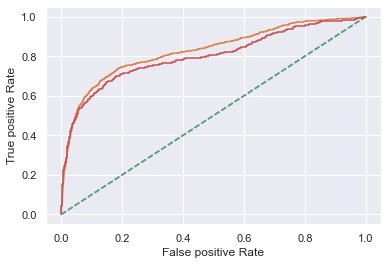

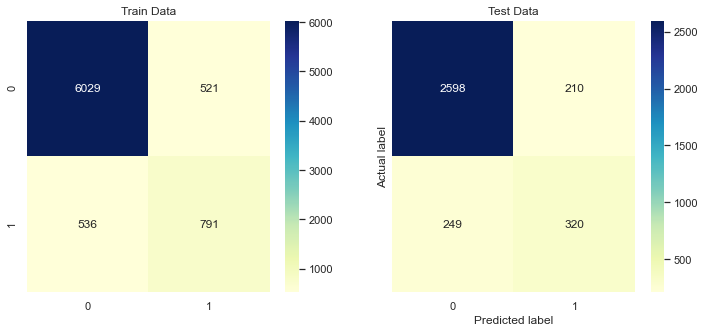

In [99]:
run_model('Gaussian Naive Bayes')

Performance metrics for Train Decision Tree Classifier
**************************************************
Accuarcy: 100.0%
Precision : 100.0%
Recall : 100.0%
F1-score : 100.0%
AUC-score: 100.0%
-----------------------
Performance metrics for Test Decision Tree Classifier
***************************************************
Accuracy: 94.88%
Precision : 84.62%
Recall : 85.06%
F1-score : 84.84%
AUC-score: 90.96%


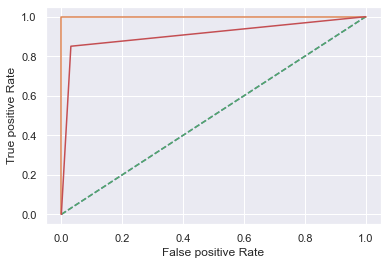

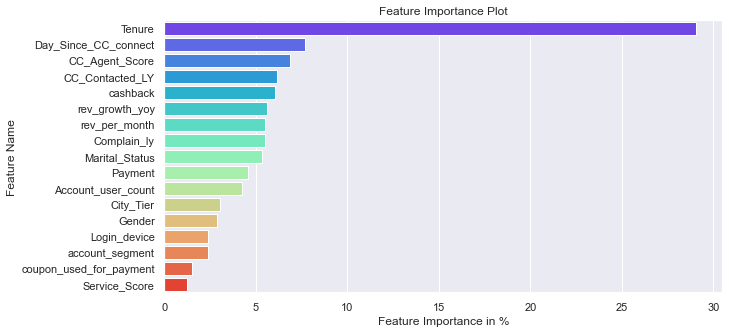

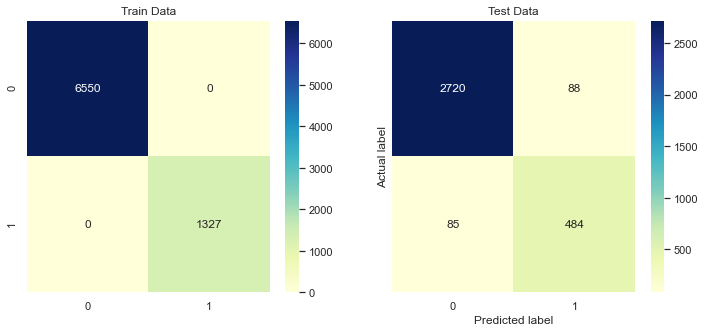

In [100]:
run_model('Decision Tree Classifier')

Performance metrics for Train Random Forest
**************************************************
Accuarcy: 100.0%
Precision : 100.0%
Recall : 100.0%
F1-score : 100.0%
AUC-score: 100.0%
-----------------------
Performance metrics for Test Random Forest
***************************************************
Accuracy: 97.07%
Precision : 97.38%
Recall : 84.89%
F1-score : 90.7%
AUC-score: 99.35%


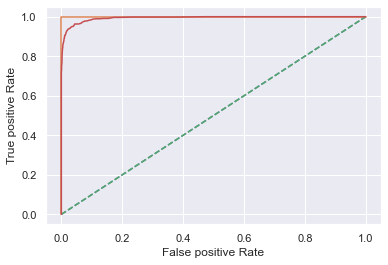

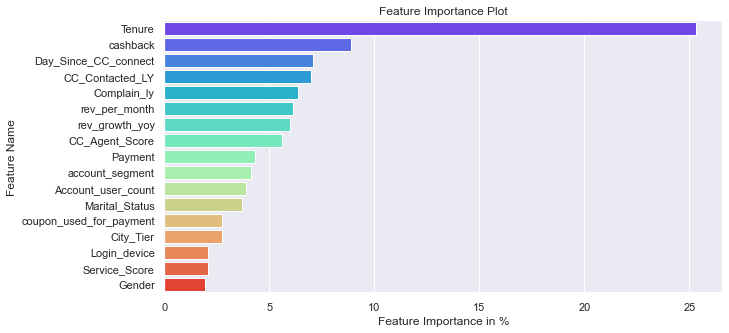

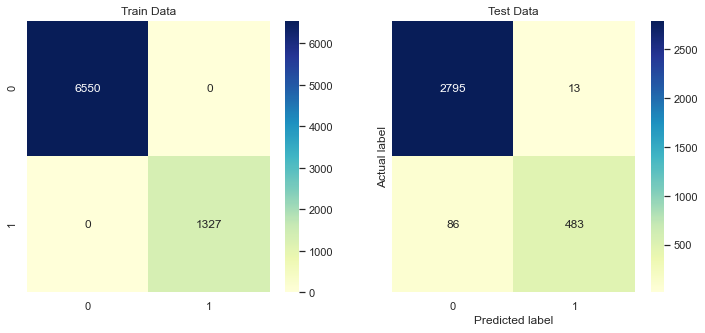

In [101]:
run_model('Random Forest')

Performance metrics for Train Gradient Boost Classifier
**************************************************
Accuarcy: 92.12%
Precision : 84.88%
Recall : 64.73%
F1-score : 73.45%
AUC-score: 95.34%
-----------------------
Performance metrics for Test Gradient Boost Classifier
***************************************************
Accuracy: 91.23%
Precision : 83.54%
Recall : 59.75%
F1-score : 69.67%
AUC-score: 93.59%


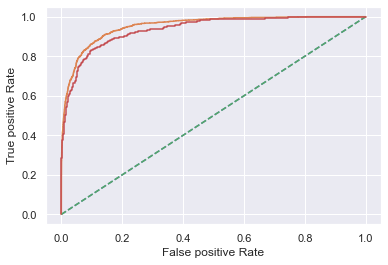

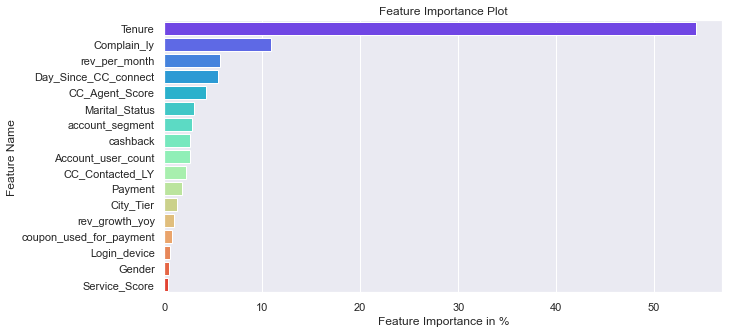

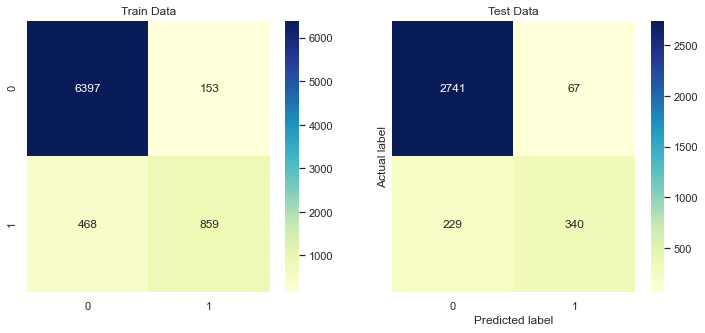

In [110]:
run_model('Gradient Boost Classifier')

**KNN & ANN - Scale and Perform Model Building**

In [102]:
scaled_df=dfuni.copy()
scaled_df.head()

City_Tier      Payment  Gender  Service_Score account_segment  \
0          3   Debit Card  Female              3           Super   
1          1          UPI    Male              3    Regular Plus   
2          1   Debit Card    Male              2    Regular Plus   
3          3   Debit Card    Male              2           Super   
4          1  Credit Card    Male              2    Regular Plus   

   CC_Agent_Score Marital_Status Complain_ly Login_device  Tenure  \
0               2         Single         Yes       Mobile     4.0   
1               3         Single         Yes       Mobile     0.0   
2               3         Single         Yes       Mobile     0.0   
3               5         Single          No       Mobile     0.0   
4               5         Single          No       Mobile     0.0   

   CC_Contacted_LY  rev_per_month  rev_growth_yoy  coupon_used_for_payment  \
0              6.0            9.0            11.0                      1.0   
1              8.0            7.0            15.0                      0.0   
2             30.0            6.0            14.0                      0.0   
3             15.0            8.0            23.0                      0.0   
4             12.0            3.0            11.0                      1.0   

   Day_Since_CC_connect  cashback  Account_user_count  Churn  cluster  
0                   5.0   159.930                   3      1        0  
1                   0.0   120.900                   4      1        0  
2                   3.0   141.708                   4      1        0  
3                   3.0   134.070                   4      1        0  
4                   3.0   129.600                   3      1        0

In [103]:
cat=['Payment','Gender','account_segment','Marital_Status','Login_device','Complain_ly','City_Tier','Service_Score','CC_Agent_Score','Account_user_count']
# num=['Tenure','CC_Contacted_LY','rev_per_month','rev_growth_yoy','cashback','Day_Since_CC_connect','coupon_used_for_payment','Churn']

In [104]:
scaled_df =pd.get_dummies(scaled_df, columns=cat,drop_first=True)

In [105]:
scaled_df.rename(columns = {'Payment_Credit Card' : 'Payment_Credit_Card','Payment_Debit Card' : 'Payment_Debit_Card'
                        ,'Payment_E wallet' : 'Payment_E_wallet','account_segment_Regular Plus':'account_segment_Regular_Plus'
                        ,'account_segment_Super Plus':'account_segment_Super_Plus'}, inplace = True)

In [106]:
scaled_df.head()

Tenure  CC_Contacted_LY  rev_per_month  rev_growth_yoy  \
0     4.0              6.0            9.0            11.0   
1     0.0              8.0            7.0            15.0   
2     0.0             30.0            6.0            14.0   
3     0.0             15.0            8.0            23.0   
4     0.0             12.0            3.0            11.0   

   coupon_used_for_payment  Day_Since_CC_connect  cashback  Churn  cluster  \
0                      1.0                   5.0   159.930      1        0   
1                      0.0                   0.0   120.900      1        0   
2                      0.0                   3.0   141.708      1        0   
3                      0.0                   3.0   134.070      1        0   
4                      1.0                   3.0   129.600      1        0   

   Payment_Credit_Card  ...  Service_Score_5  CC_Agent_Score_2  \
0                    0  ...                0                 1   
1                    0  ...                0                 0   
2                    0  ...                0                 0   
3                    0  ...                0                 0   
4                    1  ...                0                 0   

   CC_Agent_Score_3  CC_Agent_Score_4  CC_Agent_Score_5  Account_user_count_2  \
0                 0                 0                 0                     0   
1                 1                 0                 0                     0   
2                 1                 0                 0                     0   
3                 0                 0                 1                     0   
4                 0                 0                 1                     0   

   Account_user_count_3  Account_user_count_4  Account_user_count_5  \
0                     1                     0                     0   
1                     0                     1                     0   
2                     0                     1                     0   
3                     0                     1                     0   
4                     1                     0                     0   

   Account_user_count_6  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 38 columns]

In [107]:
nX = scaled_df.drop(['Churn'], axis=1)
ny = scaled_df[['Churn']]

In [108]:
nX_train, nX_test, ny_train, ny_test = train_test_split(nX, ny, test_size=0.30 , random_state=1,stratify=scaled_df['Churn'])

In [109]:
col_names = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy','coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']
features = nX_train[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

nX_train[col_names] = features

In [110]:
features = nX_test[col_names]
features = scaler.transform(features.values)
nX_test[col_names] = features

In [111]:
nX_test

Tenure  CC_Contacted_LY  rev_per_month  rev_growth_yoy  \
11093 -1.032814         0.711901      -0.094309       -0.583975   
8294   0.527457         0.249882       0.244594       -0.317326   
3748   0.861801        -1.020672       0.583496        0.749273   
1869  -0.364126        -0.327643      -1.111018       -0.583975   
1654  -0.698470        -0.789662      -1.449921       -1.117274   
...         ...              ...            ...             ...   
10278 -0.252678         0.827406      -0.433212        0.749273   
8304   0.193113         1.173921       1.600205       -0.317326   
4507  -0.475574        -1.020672      -0.772115       -0.583975   
8999  -1.032814        -0.443148       0.583496       -0.850625   
11178 -0.475574        -0.096633       2.616914        2.349170   

       coupon_used_for_payment  Day_Since_CC_connect  cashback  cluster  \
11093                 0.470678             -0.449704 -0.058369        1   
8294                 -0.433157             -1.305336 -0.760659        0   
3748                 -0.433157             -0.449704  1.060797        2   
1869                  1.826429              0.691139  0.168085        1   
1654                 -0.433157             -0.449704 -0.661736        0   
...                        ...                   ...       ...      ...   
10278                 0.470678              0.691139 -0.452533        0   
8304                 -1.336991             -0.734914 -0.731397        0   
4507                 -0.433157              0.976349 -0.651035        0   
8999                  0.470678              0.976349 -0.078022        1   
11178                 0.470678             -1.020125  0.988734        1   

       Payment_Credit_Card  Payment_Debit_Card  ...  Service_Score_5  \
11093                    1                   0  ...                0   
8294                     0                   1  ...                0   
3748                     1                   0  ...                0   
1869                     1                   0  ...                0   
1654                     0                   0  ...                0   
...                    ...                 ...  ...              ...   
10278                    0                   0  ...                0   
8304                     0                   0  ...                0   
4507                     1                   0  ...                0   
8999                     1                   0  ...                0   
11178                    0                   1  ...                0   

       CC_Agent_Score_2  CC_Agent_Score_3  CC_Agent_Score_4  CC_Agent_Score_5  \
11093                 0                 0                 0                 0   
8294                  0                 1                 0                 0   
3748                  0                 1                 0                 0   
1869                  0                 0                 1                 0   
1654                  0                 0                 0                 0   
...                 ...               ...               ...               ...   
10278                 0                 1                 0                 0   
8304                  0                 0                 0                 0   
4507                  0                 0                 1                 0   
8999                  0                 0                 0                 1   
11178                 0                 0                 0                 0   

       Account_user_count_2  Account_user_count_3  Account_user_count_4  \
11093                     0                     0                     0   
8294                      0                     1                     0   
3748                      0                     0                     1   
1869                      0                     0                     1   
1654                      0                     1                     0   
...            

In [ ]:
# scaled_df[['Tenure','CC_Contacted_LY','rev_per_month','rev_growth_yoy','cashback','Day_Since_CC_connect','coupon_used_for_payment']]=scaled_df[['Tenure','CC_Contacted_LY','rev_per_month','rev_growth_yoy','cashback','Day_Since_CC_connect','coupon_used_for_payment']].apply(zscore)

**K Neighbors Classifier**

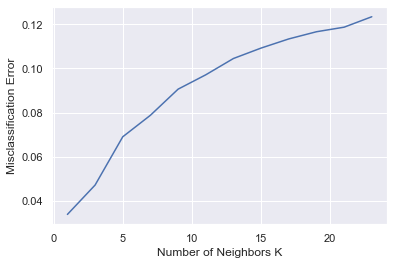

In [112]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,25,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(nX_train, ny_train)
    # evaluate test accuracy
    scores = knn.score(nX_test, ny_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
plt.plot(range(1,25,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [113]:
kmdl=KNeighborsClassifier(n_neighbors=2,weights='distance')
kmdl.fit(nX_train,ny_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [114]:
y_pred_train = kmdl.predict(nX_train)
y_pred_test = kmdl.predict(nX_test)

Performance metrics for Train KNN
****************************
Accuarcy: 100.0%
Precision : 100.0%
Recall : 100.0%
F1-score : 100.0%
AUC-score: 100.0%
-----------------------
Performance metrics for Test KNN
****************************
Accuracy: 96.62%
Precision : 90.99%
Recall : 88.75%
F1-score : 89.86%
AUC-score: 96.29%


Text(0.5, 21.5, 'Predicted label')

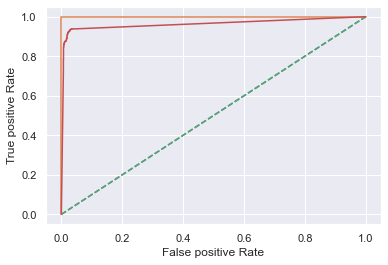

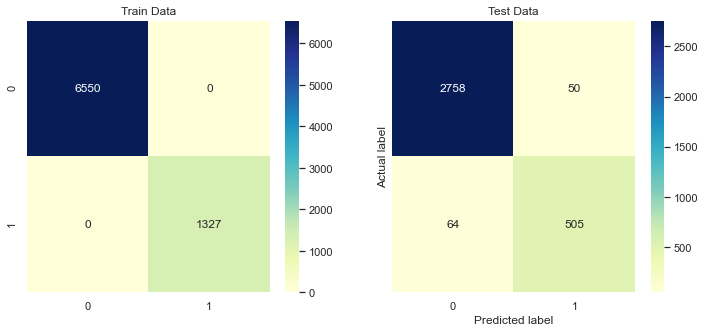

In [115]:
train_accuracy = round(accuracy_score(ny_train, y_pred_train) * 100, 2)

mdl_metrics_train=classification_report(ny_train,y_pred_train,output_dict=True)
mdf_train=pd.DataFrame(mdl_metrics_train).transpose()
train_precision=round((mdf_train.loc["1"][0])*100,2)
train_recall=round((mdf_train.loc["1"][1])*100,2)
train_f1score=round((mdf_train.loc["1"][2])*100,2)

train_probs = kmdl.predict_proba(nX_train)
train_probs = train_probs[:, 1]
train_auc= round(roc_auc_score(ny_train, train_probs) * 100, 2)

#   Test Data - Performance metrics 
test_accuracy = round(accuracy_score(ny_test, y_pred_test) * 100, 2)

mdl_metrics_test=classification_report(ny_test,y_pred_test,output_dict=True)
# print(mdl_metrics)
mdf_test=pd.DataFrame(mdl_metrics_test).transpose()
# print(mdf)
test_precision=round((mdf_test.loc["1"][0])*100,2)
test_recall=round((mdf_test.loc["1"][1])*100,2)
test_f1score=round((mdf_test.loc["1"][2])*100,2)

test_probs = kmdl.predict_proba(nX_test)
test_probs = test_probs[:, 1]
test_auc= round(roc_auc_score(ny_test, test_probs) * 100, 2)

print(f'Performance metrics for Train KNN')
print('****************************')
print(f'Accuarcy: {train_accuracy}%')
print(f'Precision : {train_precision}%')
print(f'Recall : {train_recall}%')
print(f'F1-score : {train_f1score}%')
print(f'AUC-score: {train_auc}%')
print('-----------------------')
print(f'Performance metrics for Test KNN')
print('****************************')
print(f'Accuracy: {test_accuracy}%')
print(f'Precision : {test_precision}%')
print(f'Recall : {test_recall}%')
print(f'F1-score : {test_f1score}%')
print(f'AUC-score: {test_auc}%')

# ROC Curve for Train and Test
# fig, (ax1, ax2) = plt.subplots(1, 2)
train_fpr, train_tpr, train_thresholds = roc_curve(ny_train, train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
  
test_fpr, test_tpr, test_thresholds = roc_curve(ny_test, test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

# Confusion Matrix for Train and test
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(12,5))
sns.set(font_scale=1.0)
plot_0 = sns.heatmap((metrics.confusion_matrix(ny_train,y_pred_train)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][0]);
a[0][0].set_title('Train Data');
plot_1 = sns.heatmap((metrics.confusion_matrix(ny_test,y_pred_test)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data');
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

In [116]:
# create permutation importance object using model and fit on test set
perm = PermutationImportance(kmdl).fit(nX_test, ny_test)
# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names = list(nX.columns))

In [117]:
perform_list.append(dict([('Model', 'K Nearest Neighbour'),('Train Accuracy', round(train_accuracy, 2)),('Test Accuracy', round(test_accuracy, 2)),
                              ('Train Precision', round(train_precision, 2)),('Test Precision', round(test_precision, 2)),
                              ('Train Recall', round(train_recall, 2)),('Test Recall', round(test_recall, 2)),
                              ('Train F1', round(train_f1score, 2)),('Test F1', round(test_f1score, 2)),
                              ('Train AUC', round(train_auc, 2)),('Test AUC', round(test_auc, 2))]))

**Artificial Neural Networks**

In [118]:
nmdl = MLPClassifier(random_state=1)
nmdl.fit(nX_train, ny_train)
y_pred_train = nmdl.predict(nX_train)
y_pred_test = nmdl.predict(nX_test)

Performance metrics for Train ANN
****************************
Accuarcy: 99.71%
Precision : 99.1%
Recall : 99.17%
F1-score : 99.13%
AUC-score: 99.98%
-----------------------
Performance metrics for Test ANN
****************************
Accuracy: 96.86%
Precision : 92.79%
Recall : 88.22%
F1-score : 90.45%
AUC-score: 98.45%


Text(0.5, 21.5, 'Predicted label')

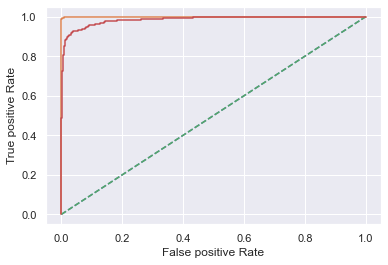

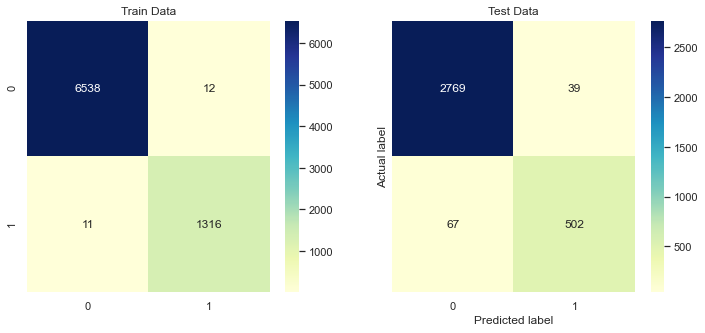

In [119]:
train_accuracy = round(accuracy_score(ny_train, y_pred_train) * 100, 2)

mdl_metrics_train=classification_report(ny_train,y_pred_train,output_dict=True)
mdf_train=pd.DataFrame(mdl_metrics_train).transpose()
train_precision=round((mdf_train.loc["1"][0])*100,2)
train_recall=round((mdf_train.loc["1"][1])*100,2)
train_f1score=round((mdf_train.loc["1"][2])*100,2)

train_probs = nmdl.predict_proba(nX_train)
train_probs = train_probs[:, 1]
train_auc= round(roc_auc_score(ny_train, train_probs) * 100, 2)

#   Test Data - Performance metrics 
test_accuracy = round(accuracy_score(ny_test, y_pred_test) * 100, 2)

mdl_metrics_test=classification_report(ny_test,y_pred_test,output_dict=True)
# print(mdl_metrics)
mdf_test=pd.DataFrame(mdl_metrics_test).transpose()
# print(mdf)
test_precision=round((mdf_test.loc["1"][0])*100,2)
test_recall=round((mdf_test.loc["1"][1])*100,2)
test_f1score=round((mdf_test.loc["1"][2])*100,2)

test_probs = nmdl.predict_proba(nX_test)
test_probs = test_probs[:, 1]
test_auc= round(roc_auc_score(ny_test, test_probs) * 100, 2)

print(f'Performance metrics for Train ANN')
print('****************************')
print(f'Accuarcy: {train_accuracy}%')
print(f'Precision : {train_precision}%')
print(f'Recall : {train_recall}%')
print(f'F1-score : {train_f1score}%')
print(f'AUC-score: {train_auc}%')
print('-----------------------')
print(f'Performance metrics for Test ANN')
print('****************************')
print(f'Accuracy: {test_accuracy}%')
print(f'Precision : {test_precision}%')
print(f'Recall : {test_recall}%')
print(f'F1-score : {test_f1score}%')
print(f'AUC-score: {test_auc}%')

# ROC Curve for Train and Test
# fig, (ax1, ax2) = plt.subplots(1, 2)
train_fpr, train_tpr, train_thresholds = roc_curve(ny_train, train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
  
test_fpr, test_tpr, test_thresholds = roc_curve(ny_test, test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

# Confusion Matrix for Train and test
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(12,5))
sns.set(font_scale=1.0)
plot_0 = sns.heatmap((metrics.confusion_matrix(ny_train,y_pred_train)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][0]);
a[0][0].set_title('Train Data');
plot_1 = sns.heatmap((metrics.confusion_matrix(ny_test,y_pred_test)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data');
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

In [120]:
# create permutation importance object using model and fit on test set
perm = PermutationImportance(nmdl).fit(nX_test, ny_test)
# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names = list(nX.columns))

In [121]:
perform_list.append(dict([('Model', 'Artificial Neural Network'),('Train Accuracy', round(train_accuracy, 2)),('Test Accuracy', round(test_accuracy, 2)),
                              ('Train Precision', round(train_precision, 2)),('Test Precision', round(test_precision, 2)),
                              ('Train Recall', round(train_recall, 2)),('Test Recall', round(test_recall, 2)),
                              ('Train F1', round(train_f1score, 2)),('Test F1', round(test_f1score, 2)),
                              ('Train AUC', round(train_auc, 2)),('Test AUC', round(test_auc, 2))]))

In [122]:
model_performance = pd.DataFrame(data=perform_list)
model_performance

Model  Train Accuracy  Test Accuracy  \
0           Logistic Regression           87.88          87.83   
1  Linear Discriminant Analysis           87.70          88.21   
2          Gaussian Naive Bayes           86.58          86.41   
3      Decision Tree Classifier          100.00          94.88   
4                 Random Forest          100.00          97.07   
5           K Nearest Neighbour          100.00          96.62   
6     Artificial Neural Network           99.71          96.86   

   Train Precision  Test Precision  Train Recall  Test Recall  Train F1  \
0            71.63           71.82         46.42        45.69     56.33   
1            74.32           78.79         41.22        41.12     53.03   
2            60.29           60.38         59.61        56.24     59.95   
3           100.00           84.62        100.00        85.06    100.00   
4           100.00           97.38        100.00        84.89    100.00   
5           100.00           90.99        100.00        88.75    100.00   
6            99.10           92.79         99.17        88.22     99.13   

   Test F1  Train AUC  Test AUC  
0    55.85      86.55     84.00  
1    54.04      86.24     83.50  
2    58.23      82.85     80.11  
3    84.84     100.00     90.96  
4    90.70     100.00     99.35  
5    89.86     100.00     96.29  
6    90.45      99.98     98.45

# <font color='blue'>Hyper Tuning Model Building</font>

# <font color='red'>Logistic</font>

In [123]:
log_model=LogisticRegression(random_state=1)
param_grid = {
    'solver': ['lbfgs','newton-cg','liblinear'],
    'max_iter':[15,20,25],
    'penalty' : ['l1', 'l2'],
    'tol': [0.0001,0.001,0.01] 
}
grid_search = GridSearchCV(estimator = log_model, param_grid = param_grid,scoring='recall', cv = 3)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

LogisticRegression(max_iter=20, random_state=1, solver='liblinear')

In [124]:
grid_search.best_params_

{'max_iter': 20, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}

In [125]:
log_model=grid_search.best_estimator_
# Training & Test Data Class Prediction with a cut-off value of 0.5
pred_class_train = log_model.predict(X_train)
pred_class_test = log_model.predict(X_test)

In [126]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('*******************************************************')
print('*******************************************************')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      6550
           1       0.75      0.46      0.57      1327

    accuracy                           0.88      7877
   macro avg       0.83      0.71      0.75      7877
weighted avg       0.87      0.88      0.87      7877
 

*******************************************************
*******************************************************
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      2808
           1       0.76      0.43      0.55       569

    accuracy                           0.88      3377
   macro avg       0.83      0.70      0.74      3377
weighted avg       0.87      0.88      0.87      3377
 



In [127]:
log_metrics=classification_report(y_train,pred_class_train,output_dict=True)
lgdf=pd.DataFrame(log_metrics).transpose()
log_train_f1=round(lgdf.loc["1"][2],2)
log_train_recall=round(lgdf.loc["1"][1],2)
log_train_precision=round(lgdf.loc["1"][0],2)
log_train_accuracy = round(accuracy_score(y_train, pred_class_train), 2)
probs = log_model.predict_proba(X_train)
probs = probs[:, 1]
log_train_auc=roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# print ('log_train_precision ',log_train_precision)
# print ('log_train_recall ',log_train_recall)
# print ('log_train_f1 ',log_train_f1)
log_metrics_test=classification_report(y_test,pred_class_test,output_dict=True)
lgdf_test=pd.DataFrame(log_metrics_test).transpose()
log_test_precision=round(lgdf_test.loc["1"][0],2)
log_test_recall=round(lgdf_test.loc["1"][1],2)
log_test_f1=round(lgdf_test.loc["1"][2],2)
log_test_accuracy = round(accuracy_score(y_test, pred_class_test), 2)
probs = log_model.predict_proba(X_test)
probs = probs[:, 1]
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# print ('log_test_precision ',log_test_precision)
# print ('log_test_recall ',log_test_recall)
# print ('log_test_f1 ',log_test_f1)
# lgdf

AUC: 0.872
AUC: 0.847


# <font color='red'>LDA</font>

In [128]:
lda_model = LinearDiscriminantAnalysis()
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'tol': [0.0001,0.00001,0.001] 
}
grid_search = GridSearchCV(estimator = lda_model, param_grid = param_grid,scoring='recall', cv = 3)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

LinearDiscriminantAnalysis()

In [129]:
grid_search.best_params_

{'solver': 'svd', 'tol': 0.0001}

In [130]:
lda_model=grid_search.best_estimator_
# Training & Test Data Class Prediction with a cut-off value of 0.5
pred_class_train = lda_model.predict(X_train)
pred_class_test = lda_model.predict(X_test)

In [131]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('*******************************************************')
print('*******************************************************')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      6550
           1       0.74      0.41      0.53      1327

    accuracy                           0.88      7877
   macro avg       0.82      0.69      0.73      7877
weighted avg       0.87      0.88      0.86      7877
 

*******************************************************
*******************************************************
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.89      0.98      0.93      2808
           1       0.79      0.41      0.54       569

    accuracy                           0.88      3377
   macro avg       0.84      0.69      0.74      3377
weighted avg       0.87      0.88      0.87      3377
 



In [132]:
lda_metrics=classification_report(y_train,pred_class_train,output_dict=True)
ldadf=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(ldadf.loc["1"][2],2)
lda_train_recall=round(ldadf.loc["1"][1],2)
lda_train_precision=round(ldadf.loc["1"][0],2)
lda_train_accuracy = round(accuracy_score(y_train, pred_class_train), 2)
probs = lda_model.predict_proba(X_train)
probs = probs[:, 1]
lda_train_auc=roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# print ('lda_train_precision ',lda_train_precision)
# print ('lda_train_recall ',lda_train_recall)
# print ('lda_train_f1 ',lda_train_f1)
lda_metrics_test=classification_report(y_test,pred_class_test,output_dict=True)
ldadf_test=pd.DataFrame(lda_metrics_test).transpose()
lda_test_precision=round(ldadf_test.loc["1"][0],2)
lda_test_recall=round(ldadf_test.loc["1"][1],2)
lda_test_f1=round(ldadf_test.loc["1"][2],2)
lda_test_accuracy = round(accuracy_score(y_test, pred_class_test), 2)
probs = lda_model.predict_proba(X_test)
probs = probs[:, 1]
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# print ('lda_test_precision ',lda_test_precision)
# print ('lda_test_recall ',lda_test_recall)
# print ('lda_test_f1 ',lda_test_f1)

AUC: 0.862
AUC: 0.835


# <font color='red'>Naive Bayes</font>

In [133]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
pred_class_train = NB_model.predict(X_train)
pred_class_test = NB_model.predict(X_test)

In [134]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('*******************************************************')
print('*******************************************************')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.92      0.92      0.92      6550
           1       0.60      0.60      0.60      1327

    accuracy                           0.87      7877
   macro avg       0.76      0.76      0.76      7877
weighted avg       0.87      0.87      0.87      7877
 

*******************************************************
*******************************************************
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.91      0.93      0.92      2808
           1       0.60      0.56      0.58       569

    accuracy                           0.86      3377
   macro avg       0.76      0.74      0.75      3377
weighted avg       0.86      0.86      0.86      3377
 



In [135]:
NB_metrics=classification_report(y_train,pred_class_train,output_dict=True)
nbdf=pd.DataFrame(NB_metrics).transpose()
NB_train_f1=round(nbdf.loc["1"][2],2)
NB_train_recall=round(nbdf.loc["1"][1],2)
NB_train_precision=round(nbdf.loc["1"][0],2)
NB_train_accuracy = round(accuracy_score(y_train, pred_class_train), 2)
probs = NB_model.predict_proba(X_train)
probs = probs[:, 1]
NB_train_auc=roc_auc_score(y_train, probs)
print('AUC: %.3f' % NB_train_auc)
# print ('NB_train_precision ',NB_train_precision)
# print ('NB_train_recall ',NB_train_recall)
# print ('NB_train_f1 ',NB_train_f1)
NB_metrics_test=classification_report(y_test,pred_class_test,output_dict=True)
nbdf_test=pd.DataFrame(NB_metrics_test).transpose()
NB_test_precision=round(nbdf_test.loc["1"][0],2)
NB_test_recall=round(nbdf_test.loc["1"][1],2)
NB_test_f1=round(nbdf_test.loc["1"][2],2)
NB_test_accuracy = round(accuracy_score(y_test, pred_class_test), 2)
probs = NB_model.predict_proba(X_test)
probs = probs[:, 1]
NB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % NB_test_auc)
# print ('NB_test_precision ',NB_test_precision)
# print ('NB_test_recall ',NB_test_recall)
# print ('NB_test_f1 ',NB_test_f1)
# nbdf

AUC: 0.829
AUC: 0.801


# <font color='red'>KNN</font>

In [136]:
KNN_model=KNeighborsClassifier(n_neighbors=2,weights='distance',metric='minkowski')
KNN_model.fit(nX_train,ny_train)
pred_class_train = KNN_model.predict(nX_train)
pred_class_test = KNN_model.predict(nX_test)

In [137]:
print('Classification Report of the training data:\n\n',metrics.classification_report(ny_train,pred_class_train),'\n')
print('*******************************************************')
print('*******************************************************')
print('Classification Report of the test data:\n\n',metrics.classification_report(ny_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6550
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7877
   macro avg       1.00      1.00      1.00      7877
weighted avg       1.00      1.00      1.00      7877
 

*******************************************************
*******************************************************
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2808
           1       0.91      0.89      0.90       569

    accuracy                           0.97      3377
   macro avg       0.94      0.93      0.94      3377
weighted avg       0.97      0.97      0.97      3377
 



In [138]:
KNN_metrics=classification_report(ny_train,pred_class_train,output_dict=True)
KNNdf=pd.DataFrame(KNN_metrics).transpose()
KNN_train_f1=round(KNNdf.loc["1"][2],2)
KNN_train_recall=round(KNNdf.loc["1"][1],2)
KNN_train_precision=round(KNNdf.loc["1"][0],2)
KNN_train_accuracy = round(accuracy_score(ny_train, pred_class_train), 2)
probs = KNN_model.predict_proba(nX_train)
probs = probs[:, 1]
KNN_train_auc=roc_auc_score(ny_train, probs)
print('AUC: %.3f' % KNN_train_auc)
# print ('KNN_train_precision ',KNN_train_precision)
# print ('KNN_train_recall ',KNN_train_recall)
# print ('KNN_train_f1 ',KNN_train_f1)
KNN_metrics_test=classification_report(ny_test,pred_class_test,output_dict=True)
KNNdf_test=pd.DataFrame(KNN_metrics_test).transpose()
KNN_test_precision=round(KNNdf_test.loc["1"][0],2)
KNN_test_recall=round(KNNdf_test.loc["1"][1],2)
KNN_test_f1=round(KNNdf_test.loc["1"][2],2)
KNN_test_accuracy = round(accuracy_score(ny_test, pred_class_test), 2)
probs = KNN_model.predict_proba(nX_test)
probs = probs[:, 1]
KNN_test_auc = roc_auc_score(ny_test, probs)
print('AUC: %.3f' % KNN_test_auc)
# print ('KNN_test_precision ',KNN_test_precision)
# print ('KNN_test_recall ',KNN_test_recall)
# print ('KNN_test_f1 ',KNN_test_f1)
# KNNdf

AUC: 1.000
AUC: 0.963


# <font color='red'>ANN</font>

In [139]:
ann_model = MLPClassifier(random_state=1)
param_grid = {
    'hidden_layer_sizes': [250,300],
    'max_iter': [800, 1000, 1500],
    'solver': ['adam','sgd'],
    'tol': [0.0001],
    'activation':['relu'],
    'verbose':['True'],
}
grid_search = GridSearchCV(estimator = ann_model,param_grid = param_grid,scoring='recall',cv = 3)
grid_search.fit(nX_train, ny_train)
grid_search.best_estimator_

Iteration 1, loss = 0.47034607
Iteration 2, loss = 0.37379422
Iteration 3, loss = 0.33334348
Iteration 4, loss = 0.30794599
Iteration 5, loss = 0.29419413
Iteration 6, loss = 0.28608850
Iteration 7, loss = 0.28032859
Iteration 8, loss = 0.27561915
Iteration 9, loss = 0.27127885
Iteration 10, loss = 0.26700884
Iteration 11, loss = 0.26333913
Iteration 12, loss = 0.25887605
Iteration 13, loss = 0.25442293
Iteration 14, loss = 0.24993663
Iteration 15, loss = 0.24622783
Iteration 16, loss = 0.24109948
Iteration 17, loss = 0.23714872
Iteration 18, loss = 0.23267939
Iteration 19, loss = 0.22758397
Iteration 20, loss = 0.22357954
Iteration 21, loss = 0.21898954
Iteration 22, loss = 0.21437471
Iteration 23, loss = 0.21112677
Iteration 24, loss = 0.20757798
Iteration 25, loss = 0.20218440
Iteration 26, loss = 0.19801160
Iteration 27, loss = 0.19408988
Iteration 28, loss = 0.19211264
Iteration 29, loss = 0.18780934
Iteration 30, loss = 0.18321008
Iteration 31, loss = 0.17975311
Iteration 32, los

Iteration 254, loss = 0.00550401
Iteration 255, loss = 0.00551951
Iteration 256, loss = 0.00559424
Iteration 257, loss = 0.00549009
Iteration 258, loss = 0.00520634
Iteration 259, loss = 0.00511996
Iteration 260, loss = 0.00499439
Iteration 261, loss = 0.00501276
Iteration 262, loss = 0.00500403
Iteration 263, loss = 0.00491503
Iteration 264, loss = 0.00488221
Iteration 265, loss = 0.00465578
Iteration 266, loss = 0.00456792
Iteration 267, loss = 0.00456187
Iteration 268, loss = 0.00451225
Iteration 269, loss = 0.00451112
Iteration 270, loss = 0.00436559
Iteration 271, loss = 0.00425589
Iteration 272, loss = 0.00428574
Iteration 273, loss = 0.00422052
Iteration 274, loss = 0.00428234
Iteration 275, loss = 0.00422867
Iteration 276, loss = 0.00420696
Iteration 277, loss = 0.00403751
Iteration 278, loss = 0.00408520
Iteration 279, loss = 0.00408123
Iteration 280, loss = 0.00391301
Iteration 281, loss = 0.00394588
Iteration 282, loss = 0.00375844
Iteration 283, loss = 0.00373888
Iteration 

Iteration 206, loss = 0.00945423
Iteration 207, loss = 0.00950130
Iteration 208, loss = 0.01068964
Iteration 209, loss = 0.00923775
Iteration 210, loss = 0.00935642
Iteration 211, loss = 0.00946544
Iteration 212, loss = 0.00908941
Iteration 213, loss = 0.00879411
Iteration 214, loss = 0.00855988
Iteration 215, loss = 0.00840606
Iteration 216, loss = 0.00819476
Iteration 217, loss = 0.00803407
Iteration 218, loss = 0.00798968
Iteration 219, loss = 0.00776727
Iteration 220, loss = 0.00785208
Iteration 221, loss = 0.00785822
Iteration 222, loss = 0.00763587
Iteration 223, loss = 0.00757343
Iteration 224, loss = 0.00761048
Iteration 225, loss = 0.00730177
Iteration 226, loss = 0.00721697
Iteration 227, loss = 0.00709655
Iteration 228, loss = 0.00711954
Iteration 229, loss = 0.00727128
Iteration 230, loss = 0.00684711
Iteration 231, loss = 0.00690634
Iteration 232, loss = 0.00690146
Iteration 233, loss = 0.00677721
Iteration 234, loss = 0.00647366
Iteration 235, loss = 0.00638426
Iteration 

Iteration 139, loss = 0.03054522
Iteration 140, loss = 0.03032308
Iteration 141, loss = 0.03083721
Iteration 142, loss = 0.02938170
Iteration 143, loss = 0.02918070
Iteration 144, loss = 0.02816063
Iteration 145, loss = 0.02808666
Iteration 146, loss = 0.02764018
Iteration 147, loss = 0.02730398
Iteration 148, loss = 0.02718315
Iteration 149, loss = 0.02685743
Iteration 150, loss = 0.02591052
Iteration 151, loss = 0.02558752
Iteration 152, loss = 0.02576614
Iteration 153, loss = 0.02476864
Iteration 154, loss = 0.02441845
Iteration 155, loss = 0.02403213
Iteration 156, loss = 0.02394358
Iteration 157, loss = 0.02370431
Iteration 158, loss = 0.02339969
Iteration 159, loss = 0.02340578
Iteration 160, loss = 0.02254044
Iteration 161, loss = 0.02234279
Iteration 162, loss = 0.02201833
Iteration 163, loss = 0.02134893
Iteration 164, loss = 0.02191763
Iteration 165, loss = 0.02106447
Iteration 166, loss = 0.02031592
Iteration 167, loss = 0.02004246
Iteration 168, loss = 0.01955596
Iteration 

Iteration 82, loss = 0.30143639
Iteration 83, loss = 0.30104688
Iteration 84, loss = 0.30059533
Iteration 85, loss = 0.30023040
Iteration 86, loss = 0.29981395
Iteration 87, loss = 0.29943774
Iteration 88, loss = 0.29905423
Iteration 89, loss = 0.29872674
Iteration 90, loss = 0.29836432
Iteration 91, loss = 0.29804653
Iteration 92, loss = 0.29766246
Iteration 93, loss = 0.29735031
Iteration 94, loss = 0.29700103
Iteration 95, loss = 0.29668180
Iteration 96, loss = 0.29636232
Iteration 97, loss = 0.29606395
Iteration 98, loss = 0.29575395
Iteration 99, loss = 0.29546122
Iteration 100, loss = 0.29516416
Iteration 101, loss = 0.29487565
Iteration 102, loss = 0.29459066
Iteration 103, loss = 0.29430570
Iteration 104, loss = 0.29403791
Iteration 105, loss = 0.29378224
Iteration 106, loss = 0.29351902
Iteration 107, loss = 0.29328805
Iteration 108, loss = 0.29300220
Iteration 109, loss = 0.29276691
Iteration 110, loss = 0.29250301
Iteration 111, loss = 0.29230238
Iteration 112, loss = 0.2920

Iteration 332, loss = 0.26264863
Iteration 333, loss = 0.26250699
Iteration 334, loss = 0.26238557
Iteration 335, loss = 0.26229392
Iteration 336, loss = 0.26219155
Iteration 337, loss = 0.26207084
Iteration 338, loss = 0.26197974
Iteration 339, loss = 0.26186450
Iteration 340, loss = 0.26176637
Iteration 341, loss = 0.26167700
Iteration 342, loss = 0.26154685
Iteration 343, loss = 0.26144522
Iteration 344, loss = 0.26137670
Iteration 345, loss = 0.26133988
Iteration 346, loss = 0.26110946
Iteration 347, loss = 0.26101449
Iteration 348, loss = 0.26092506
Iteration 349, loss = 0.26083059
Iteration 350, loss = 0.26073139
Iteration 351, loss = 0.26062053
Iteration 352, loss = 0.26049600
Iteration 353, loss = 0.26040003
Iteration 354, loss = 0.26030230
Iteration 355, loss = 0.26020610
Iteration 356, loss = 0.26013228
Iteration 357, loss = 0.25998430
Iteration 358, loss = 0.25986791
Iteration 359, loss = 0.25977098
Iteration 360, loss = 0.25968479
Iteration 361, loss = 0.25958353
Iteration 

Iteration 582, loss = 0.23749589
Iteration 583, loss = 0.23742822
Iteration 584, loss = 0.23732590
Iteration 585, loss = 0.23721371
Iteration 586, loss = 0.23712491
Iteration 587, loss = 0.23706107
Iteration 588, loss = 0.23693163
Iteration 589, loss = 0.23682642
Iteration 590, loss = 0.23671400
Iteration 591, loss = 0.23662298
Iteration 592, loss = 0.23652100
Iteration 593, loss = 0.23644872
Iteration 594, loss = 0.23635532
Iteration 595, loss = 0.23622251
Iteration 596, loss = 0.23616026
Iteration 597, loss = 0.23606362
Iteration 598, loss = 0.23594181
Iteration 599, loss = 0.23585614
Iteration 600, loss = 0.23578641
Iteration 601, loss = 0.23565789
Iteration 602, loss = 0.23559050
Iteration 603, loss = 0.23544333
Iteration 604, loss = 0.23537132
Iteration 605, loss = 0.23526723
Iteration 606, loss = 0.23518533
Iteration 607, loss = 0.23507520
Iteration 608, loss = 0.23500206
Iteration 609, loss = 0.23491917
Iteration 610, loss = 0.23478711
Iteration 611, loss = 0.23472657
Iteration 

Iteration 33, loss = 0.33701303
Iteration 34, loss = 0.33548567
Iteration 35, loss = 0.33398231
Iteration 36, loss = 0.33250553
Iteration 37, loss = 0.33107019
Iteration 38, loss = 0.32965505
Iteration 39, loss = 0.32833696
Iteration 40, loss = 0.32700959
Iteration 41, loss = 0.32576336
Iteration 42, loss = 0.32456276
Iteration 43, loss = 0.32338273
Iteration 44, loss = 0.32218368
Iteration 45, loss = 0.32105571
Iteration 46, loss = 0.31996721
Iteration 47, loss = 0.31893701
Iteration 48, loss = 0.31788993
Iteration 49, loss = 0.31688212
Iteration 50, loss = 0.31592702
Iteration 51, loss = 0.31496063
Iteration 52, loss = 0.31406251
Iteration 53, loss = 0.31319321
Iteration 54, loss = 0.31227707
Iteration 55, loss = 0.31143869
Iteration 56, loss = 0.31062388
Iteration 57, loss = 0.30984330
Iteration 58, loss = 0.30910133
Iteration 59, loss = 0.30841105
Iteration 60, loss = 0.30761723
Iteration 61, loss = 0.30696604
Iteration 62, loss = 0.30618441
Iteration 63, loss = 0.30552389
Iteratio

Iteration 286, loss = 0.26168859
Iteration 287, loss = 0.26159272
Iteration 288, loss = 0.26149808
Iteration 289, loss = 0.26136709
Iteration 290, loss = 0.26129126
Iteration 291, loss = 0.26114132
Iteration 292, loss = 0.26100743
Iteration 293, loss = 0.26092394
Iteration 294, loss = 0.26081371
Iteration 295, loss = 0.26067669
Iteration 296, loss = 0.26059972
Iteration 297, loss = 0.26043916
Iteration 298, loss = 0.26034230
Iteration 299, loss = 0.26020265
Iteration 300, loss = 0.26009422
Iteration 301, loss = 0.26000254
Iteration 302, loss = 0.25987382
Iteration 303, loss = 0.25981240
Iteration 304, loss = 0.25966943
Iteration 305, loss = 0.25955388
Iteration 306, loss = 0.25941256
Iteration 307, loss = 0.25933855
Iteration 308, loss = 0.25919844
Iteration 309, loss = 0.25910405
Iteration 310, loss = 0.25902451
Iteration 311, loss = 0.25891327
Iteration 312, loss = 0.25874800
Iteration 313, loss = 0.25866567
Iteration 314, loss = 0.25855536
Iteration 315, loss = 0.25838721
Iteration 

Iteration 536, loss = 0.23524480
Iteration 537, loss = 0.23511646
Iteration 538, loss = 0.23503550
Iteration 539, loss = 0.23495979
Iteration 540, loss = 0.23487139
Iteration 541, loss = 0.23475561
Iteration 542, loss = 0.23465828
Iteration 543, loss = 0.23454079
Iteration 544, loss = 0.23444281
Iteration 545, loss = 0.23440639
Iteration 546, loss = 0.23425790
Iteration 547, loss = 0.23417911
Iteration 548, loss = 0.23407416
Iteration 549, loss = 0.23396758
Iteration 550, loss = 0.23384692
Iteration 551, loss = 0.23381162
Iteration 552, loss = 0.23364530
Iteration 553, loss = 0.23356054
Iteration 554, loss = 0.23348112
Iteration 555, loss = 0.23336247
Iteration 556, loss = 0.23327589
Iteration 557, loss = 0.23315683
Iteration 558, loss = 0.23307403
Iteration 559, loss = 0.23294333
Iteration 560, loss = 0.23293698
Iteration 561, loss = 0.23277374
Iteration 562, loss = 0.23273195
Iteration 563, loss = 0.23258554
Iteration 564, loss = 0.23249968
Iteration 565, loss = 0.23240350
Iteration 

Iteration 788, loss = 0.21215604
Iteration 789, loss = 0.21204371
Iteration 790, loss = 0.21195420
Iteration 791, loss = 0.21187309
Iteration 792, loss = 0.21178455
Iteration 793, loss = 0.21174347
Iteration 794, loss = 0.21165032
Iteration 795, loss = 0.21157417
Iteration 796, loss = 0.21146911
Iteration 797, loss = 0.21137971
Iteration 798, loss = 0.21127466
Iteration 799, loss = 0.21118359
Iteration 800, loss = 0.21107837
Iteration 1, loss = 0.61726477
Iteration 2, loss = 0.49556122
Iteration 3, loss = 0.44909986
Iteration 4, loss = 0.43159905
Iteration 5, loss = 0.42249909
Iteration 6, loss = 0.41650294
Iteration 7, loss = 0.41149401
Iteration 8, loss = 0.40708601
Iteration 9, loss = 0.40306355
Iteration 10, loss = 0.39920566
Iteration 11, loss = 0.39562212
Iteration 12, loss = 0.39224261
Iteration 13, loss = 0.38894621
Iteration 14, loss = 0.38578374
Iteration 15, loss = 0.38278483
Iteration 16, loss = 0.37987801
Iteration 17, loss = 0.37708481
Iteration 18, loss = 0.37440748
Iter

Iteration 240, loss = 0.26925420
Iteration 241, loss = 0.26915689
Iteration 242, loss = 0.26898743
Iteration 243, loss = 0.26889273
Iteration 244, loss = 0.26875794
Iteration 245, loss = 0.26860976
Iteration 246, loss = 0.26859654
Iteration 247, loss = 0.26835578
Iteration 248, loss = 0.26821689
Iteration 249, loss = 0.26810924
Iteration 250, loss = 0.26797945
Iteration 251, loss = 0.26783458
Iteration 252, loss = 0.26773299
Iteration 253, loss = 0.26760449
Iteration 254, loss = 0.26744480
Iteration 255, loss = 0.26732499
Iteration 256, loss = 0.26719402
Iteration 257, loss = 0.26710909
Iteration 258, loss = 0.26694196
Iteration 259, loss = 0.26682199
Iteration 260, loss = 0.26669997
Iteration 261, loss = 0.26658933
Iteration 262, loss = 0.26643678
Iteration 263, loss = 0.26630219
Iteration 264, loss = 0.26617086
Iteration 265, loss = 0.26606400
Iteration 266, loss = 0.26592809
Iteration 267, loss = 0.26580336
Iteration 268, loss = 0.26568450
Iteration 269, loss = 0.26554042
Iteration 

Iteration 491, loss = 0.23956397
Iteration 492, loss = 0.23946954
Iteration 493, loss = 0.23940361
Iteration 494, loss = 0.23925254
Iteration 495, loss = 0.23915157
Iteration 496, loss = 0.23903731
Iteration 497, loss = 0.23893203
Iteration 498, loss = 0.23880190
Iteration 499, loss = 0.23872681
Iteration 500, loss = 0.23859315
Iteration 501, loss = 0.23856958
Iteration 502, loss = 0.23834267
Iteration 503, loss = 0.23825610
Iteration 504, loss = 0.23816705
Iteration 505, loss = 0.23806624
Iteration 506, loss = 0.23796537
Iteration 507, loss = 0.23789520
Iteration 508, loss = 0.23775713
Iteration 509, loss = 0.23763430
Iteration 510, loss = 0.23752232
Iteration 511, loss = 0.23739669
Iteration 512, loss = 0.23730571
Iteration 513, loss = 0.23718027
Iteration 514, loss = 0.23707931
Iteration 515, loss = 0.23694607
Iteration 516, loss = 0.23695703
Iteration 517, loss = 0.23673056
Iteration 518, loss = 0.23663733
Iteration 519, loss = 0.23650778
Iteration 520, loss = 0.23646230
Iteration 

Iteration 740, loss = 0.21412103
Iteration 741, loss = 0.21404758
Iteration 742, loss = 0.21396361
Iteration 743, loss = 0.21389234
Iteration 744, loss = 0.21374681
Iteration 745, loss = 0.21371646
Iteration 746, loss = 0.21361269
Iteration 747, loss = 0.21348361
Iteration 748, loss = 0.21339402
Iteration 749, loss = 0.21326878
Iteration 750, loss = 0.21320459
Iteration 751, loss = 0.21309090
Iteration 752, loss = 0.21307679
Iteration 753, loss = 0.21294039
Iteration 754, loss = 0.21282870
Iteration 755, loss = 0.21273759
Iteration 756, loss = 0.21266974
Iteration 757, loss = 0.21256548
Iteration 758, loss = 0.21241503
Iteration 759, loss = 0.21237071
Iteration 760, loss = 0.21227700
Iteration 761, loss = 0.21218197
Iteration 762, loss = 0.21209785
Iteration 763, loss = 0.21200427
Iteration 764, loss = 0.21189699
Iteration 765, loss = 0.21179967
Iteration 766, loss = 0.21171850
Iteration 767, loss = 0.21159982
Iteration 768, loss = 0.21157355
Iteration 769, loss = 0.21142158
Iteration 

Iteration 194, loss = 0.01266975
Iteration 195, loss = 0.01282996
Iteration 196, loss = 0.01245599
Iteration 197, loss = 0.01226788
Iteration 198, loss = 0.01217516
Iteration 199, loss = 0.01222835
Iteration 200, loss = 0.01163626
Iteration 201, loss = 0.01150337
Iteration 202, loss = 0.01133305
Iteration 203, loss = 0.01125503
Iteration 204, loss = 0.01099611
Iteration 205, loss = 0.01091579
Iteration 206, loss = 0.01091025
Iteration 207, loss = 0.01051119
Iteration 208, loss = 0.01040086
Iteration 209, loss = 0.01018881
Iteration 210, loss = 0.01033418
Iteration 211, loss = 0.01021600
Iteration 212, loss = 0.01004228
Iteration 213, loss = 0.00978582
Iteration 214, loss = 0.00972369
Iteration 215, loss = 0.00948968
Iteration 216, loss = 0.00928983
Iteration 217, loss = 0.00919995
Iteration 218, loss = 0.00901099
Iteration 219, loss = 0.00881908
Iteration 220, loss = 0.00879544
Iteration 221, loss = 0.00876533
Iteration 222, loss = 0.00855286
Iteration 223, loss = 0.00855123
Iteration 

Iteration 144, loss = 0.02476401
Iteration 145, loss = 0.02469377
Iteration 146, loss = 0.02392602
Iteration 147, loss = 0.02344307
Iteration 148, loss = 0.02307281
Iteration 149, loss = 0.02298320
Iteration 150, loss = 0.02256891
Iteration 151, loss = 0.02195325
Iteration 152, loss = 0.02209807
Iteration 153, loss = 0.02137055
Iteration 154, loss = 0.02098420
Iteration 155, loss = 0.02094580
Iteration 156, loss = 0.02014514
Iteration 157, loss = 0.02011934
Iteration 158, loss = 0.01938199
Iteration 159, loss = 0.01944539
Iteration 160, loss = 0.01893897
Iteration 161, loss = 0.01938523
Iteration 162, loss = 0.01853368
Iteration 163, loss = 0.01799647
Iteration 164, loss = 0.01824625
Iteration 165, loss = 0.01844153
Iteration 166, loss = 0.01733017
Iteration 167, loss = 0.01692887
Iteration 168, loss = 0.01664458
Iteration 169, loss = 0.01666123
Iteration 170, loss = 0.01662523
Iteration 171, loss = 0.01620691
Iteration 172, loss = 0.01606158
Iteration 173, loss = 0.01612053
Iteration 

Iteration 74, loss = 0.08440844
Iteration 75, loss = 0.08291086
Iteration 76, loss = 0.08150780
Iteration 77, loss = 0.08006164
Iteration 78, loss = 0.07926772
Iteration 79, loss = 0.07853398
Iteration 80, loss = 0.07696715
Iteration 81, loss = 0.07621848
Iteration 82, loss = 0.07448055
Iteration 83, loss = 0.07418516
Iteration 84, loss = 0.07275205
Iteration 85, loss = 0.07031087
Iteration 86, loss = 0.07070689
Iteration 87, loss = 0.06868560
Iteration 88, loss = 0.06835268
Iteration 89, loss = 0.06700193
Iteration 90, loss = 0.06574561
Iteration 91, loss = 0.06445453
Iteration 92, loss = 0.06428223
Iteration 93, loss = 0.06317012
Iteration 94, loss = 0.06181340
Iteration 95, loss = 0.06283399
Iteration 96, loss = 0.06237401
Iteration 97, loss = 0.06018173
Iteration 98, loss = 0.05906411
Iteration 99, loss = 0.05719715
Iteration 100, loss = 0.05621656
Iteration 101, loss = 0.05637180
Iteration 102, loss = 0.05435528
Iteration 103, loss = 0.05415059
Iteration 104, loss = 0.05330258
Ite

Iteration 14, loss = 0.38560871
Iteration 15, loss = 0.38275585
Iteration 16, loss = 0.37999397
Iteration 17, loss = 0.37730957
Iteration 18, loss = 0.37471472
Iteration 19, loss = 0.37224236
Iteration 20, loss = 0.36988709
Iteration 21, loss = 0.36755761
Iteration 22, loss = 0.36533651
Iteration 23, loss = 0.36316695
Iteration 24, loss = 0.36102872
Iteration 25, loss = 0.35899228
Iteration 26, loss = 0.35697205
Iteration 27, loss = 0.35508350
Iteration 28, loss = 0.35317168
Iteration 29, loss = 0.35140067
Iteration 30, loss = 0.34961392
Iteration 31, loss = 0.34788053
Iteration 32, loss = 0.34624889
Iteration 33, loss = 0.34459048
Iteration 34, loss = 0.34304524
Iteration 35, loss = 0.34152520
Iteration 36, loss = 0.34004596
Iteration 37, loss = 0.33854916
Iteration 38, loss = 0.33712900
Iteration 39, loss = 0.33571181
Iteration 40, loss = 0.33438549
Iteration 41, loss = 0.33311436
Iteration 42, loss = 0.33186546
Iteration 43, loss = 0.33061707
Iteration 44, loss = 0.32944082
Iteratio

Iteration 267, loss = 0.26968478
Iteration 268, loss = 0.26956916
Iteration 269, loss = 0.26945767
Iteration 270, loss = 0.26936124
Iteration 271, loss = 0.26929077
Iteration 272, loss = 0.26912616
Iteration 273, loss = 0.26904212
Iteration 274, loss = 0.26891678
Iteration 275, loss = 0.26878302
Iteration 276, loss = 0.26869767
Iteration 277, loss = 0.26857719
Iteration 278, loss = 0.26844780
Iteration 279, loss = 0.26835609
Iteration 280, loss = 0.26823499
Iteration 281, loss = 0.26813645
Iteration 282, loss = 0.26799612
Iteration 283, loss = 0.26789980
Iteration 284, loss = 0.26779038
Iteration 285, loss = 0.26770903
Iteration 286, loss = 0.26757306
Iteration 287, loss = 0.26745415
Iteration 288, loss = 0.26736013
Iteration 289, loss = 0.26721675
Iteration 290, loss = 0.26723384
Iteration 291, loss = 0.26702677
Iteration 292, loss = 0.26690126
Iteration 293, loss = 0.26682956
Iteration 294, loss = 0.26672363
Iteration 295, loss = 0.26660217
Iteration 296, loss = 0.26648685
Iteration 

Iteration 516, loss = 0.24397596
Iteration 517, loss = 0.24392680
Iteration 518, loss = 0.24377202
Iteration 519, loss = 0.24366923
Iteration 520, loss = 0.24356758
Iteration 521, loss = 0.24346952
Iteration 522, loss = 0.24340218
Iteration 523, loss = 0.24327414
Iteration 524, loss = 0.24316433
Iteration 525, loss = 0.24307126
Iteration 526, loss = 0.24295958
Iteration 527, loss = 0.24288206
Iteration 528, loss = 0.24277695
Iteration 529, loss = 0.24265942
Iteration 530, loss = 0.24259377
Iteration 531, loss = 0.24249295
Iteration 532, loss = 0.24241406
Iteration 533, loss = 0.24229034
Iteration 534, loss = 0.24217268
Iteration 535, loss = 0.24210472
Iteration 536, loss = 0.24198066
Iteration 537, loss = 0.24187273
Iteration 538, loss = 0.24183840
Iteration 539, loss = 0.24170539
Iteration 540, loss = 0.24164806
Iteration 541, loss = 0.24154498
Iteration 542, loss = 0.24142851
Iteration 543, loss = 0.24128755
Iteration 544, loss = 0.24124837
Iteration 545, loss = 0.24113823
Iteration 

Iteration 765, loss = 0.21998301
Iteration 766, loss = 0.21986296
Iteration 767, loss = 0.21974636
Iteration 768, loss = 0.21965527
Iteration 769, loss = 0.21955771
Iteration 770, loss = 0.21945369
Iteration 771, loss = 0.21938392
Iteration 772, loss = 0.21930196
Iteration 773, loss = 0.21927438
Iteration 774, loss = 0.21907544
Iteration 775, loss = 0.21901453
Iteration 776, loss = 0.21891050
Iteration 777, loss = 0.21881071
Iteration 778, loss = 0.21877023
Iteration 779, loss = 0.21862553
Iteration 780, loss = 0.21853862
Iteration 781, loss = 0.21844549
Iteration 782, loss = 0.21835512
Iteration 783, loss = 0.21831642
Iteration 784, loss = 0.21822306
Iteration 785, loss = 0.21808315
Iteration 786, loss = 0.21797624
Iteration 787, loss = 0.21792949
Iteration 788, loss = 0.21781736
Iteration 789, loss = 0.21772769
Iteration 790, loss = 0.21763951
Iteration 791, loss = 0.21754851
Iteration 792, loss = 0.21750562
Iteration 793, loss = 0.21735326
Iteration 794, loss = 0.21730664
Iteration 

Iteration 14, loss = 0.37901638
Iteration 15, loss = 0.37605070
Iteration 16, loss = 0.37308172
Iteration 17, loss = 0.37030666
Iteration 18, loss = 0.36758294
Iteration 19, loss = 0.36507574
Iteration 20, loss = 0.36259914
Iteration 21, loss = 0.36023333
Iteration 22, loss = 0.35789125
Iteration 23, loss = 0.35570449
Iteration 24, loss = 0.35347110
Iteration 25, loss = 0.35142480
Iteration 26, loss = 0.34938563
Iteration 27, loss = 0.34747831
Iteration 28, loss = 0.34559361
Iteration 29, loss = 0.34378257
Iteration 30, loss = 0.34201541
Iteration 31, loss = 0.34027310
Iteration 32, loss = 0.33861029
Iteration 33, loss = 0.33701303
Iteration 34, loss = 0.33548567
Iteration 35, loss = 0.33398231
Iteration 36, loss = 0.33250553
Iteration 37, loss = 0.33107019
Iteration 38, loss = 0.32965505
Iteration 39, loss = 0.32833696
Iteration 40, loss = 0.32700959
Iteration 41, loss = 0.32576336
Iteration 42, loss = 0.32456276
Iteration 43, loss = 0.32338273
Iteration 44, loss = 0.32218368
Iteratio

Iteration 266, loss = 0.26402937
Iteration 267, loss = 0.26393384
Iteration 268, loss = 0.26382335
Iteration 269, loss = 0.26369655
Iteration 270, loss = 0.26358178
Iteration 271, loss = 0.26345287
Iteration 272, loss = 0.26334191
Iteration 273, loss = 0.26323078
Iteration 274, loss = 0.26310947
Iteration 275, loss = 0.26299137
Iteration 276, loss = 0.26288751
Iteration 277, loss = 0.26277930
Iteration 278, loss = 0.26265170
Iteration 279, loss = 0.26252133
Iteration 280, loss = 0.26242518
Iteration 281, loss = 0.26232136
Iteration 282, loss = 0.26218584
Iteration 283, loss = 0.26207588
Iteration 284, loss = 0.26206451
Iteration 285, loss = 0.26182628
Iteration 286, loss = 0.26168859
Iteration 287, loss = 0.26159272
Iteration 288, loss = 0.26149808
Iteration 289, loss = 0.26136709
Iteration 290, loss = 0.26129126
Iteration 291, loss = 0.26114132
Iteration 292, loss = 0.26100743
Iteration 293, loss = 0.26092394
Iteration 294, loss = 0.26081371
Iteration 295, loss = 0.26067669
Iteration 

Iteration 515, loss = 0.23735087
Iteration 516, loss = 0.23724645
Iteration 517, loss = 0.23712957
Iteration 518, loss = 0.23702417
Iteration 519, loss = 0.23691240
Iteration 520, loss = 0.23683417
Iteration 521, loss = 0.23672581
Iteration 522, loss = 0.23669361
Iteration 523, loss = 0.23651716
Iteration 524, loss = 0.23641749
Iteration 525, loss = 0.23633418
Iteration 526, loss = 0.23621697
Iteration 527, loss = 0.23613148
Iteration 528, loss = 0.23603724
Iteration 529, loss = 0.23595532
Iteration 530, loss = 0.23582402
Iteration 531, loss = 0.23575105
Iteration 532, loss = 0.23564793
Iteration 533, loss = 0.23555391
Iteration 534, loss = 0.23542260
Iteration 535, loss = 0.23534782
Iteration 536, loss = 0.23524480
Iteration 537, loss = 0.23511646
Iteration 538, loss = 0.23503550
Iteration 539, loss = 0.23495979
Iteration 540, loss = 0.23487139
Iteration 541, loss = 0.23475561
Iteration 542, loss = 0.23465828
Iteration 543, loss = 0.23454079
Iteration 544, loss = 0.23444281
Iteration 

Iteration 766, loss = 0.21405645
Iteration 767, loss = 0.21395974
Iteration 768, loss = 0.21395082
Iteration 769, loss = 0.21386719
Iteration 770, loss = 0.21370808
Iteration 771, loss = 0.21364491
Iteration 772, loss = 0.21353473
Iteration 773, loss = 0.21349970
Iteration 774, loss = 0.21337358
Iteration 775, loss = 0.21330065
Iteration 776, loss = 0.21323181
Iteration 777, loss = 0.21319664
Iteration 778, loss = 0.21302787
Iteration 779, loss = 0.21294868
Iteration 780, loss = 0.21283205
Iteration 781, loss = 0.21275493
Iteration 782, loss = 0.21264577
Iteration 783, loss = 0.21259209
Iteration 784, loss = 0.21249804
Iteration 785, loss = 0.21243575
Iteration 786, loss = 0.21228661
Iteration 787, loss = 0.21227168
Iteration 788, loss = 0.21215604
Iteration 789, loss = 0.21204371
Iteration 790, loss = 0.21195420
Iteration 791, loss = 0.21187309
Iteration 792, loss = 0.21178455
Iteration 793, loss = 0.21174347
Iteration 794, loss = 0.21165032
Iteration 795, loss = 0.21157417
Iteration 

Iteration 143, loss = 0.28345173
Iteration 144, loss = 0.28325164
Iteration 145, loss = 0.28309223
Iteration 146, loss = 0.28289202
Iteration 147, loss = 0.28273486
Iteration 148, loss = 0.28255507
Iteration 149, loss = 0.28238590
Iteration 150, loss = 0.28220248
Iteration 151, loss = 0.28207270
Iteration 152, loss = 0.28186037
Iteration 153, loss = 0.28176953
Iteration 154, loss = 0.28150733
Iteration 155, loss = 0.28137981
Iteration 156, loss = 0.28118923
Iteration 157, loss = 0.28103576
Iteration 158, loss = 0.28087594
Iteration 159, loss = 0.28076240
Iteration 160, loss = 0.28054714
Iteration 161, loss = 0.28041167
Iteration 162, loss = 0.28022680
Iteration 163, loss = 0.28009046
Iteration 164, loss = 0.27995180
Iteration 165, loss = 0.27976775
Iteration 166, loss = 0.27961073
Iteration 167, loss = 0.27945180
Iteration 168, loss = 0.27929522
Iteration 169, loss = 0.27914700
Iteration 170, loss = 0.27898846
Iteration 171, loss = 0.27890102
Iteration 172, loss = 0.27866874
Iteration 

Iteration 394, loss = 0.25057375
Iteration 395, loss = 0.25048501
Iteration 396, loss = 0.25035871
Iteration 397, loss = 0.25022275
Iteration 398, loss = 0.25011024
Iteration 399, loss = 0.25001800
Iteration 400, loss = 0.24990935
Iteration 401, loss = 0.24976133
Iteration 402, loss = 0.24968112
Iteration 403, loss = 0.24957972
Iteration 404, loss = 0.24946301
Iteration 405, loss = 0.24935373
Iteration 406, loss = 0.24918862
Iteration 407, loss = 0.24914714
Iteration 408, loss = 0.24898277
Iteration 409, loss = 0.24889756
Iteration 410, loss = 0.24874014
Iteration 411, loss = 0.24864181
Iteration 412, loss = 0.24850211
Iteration 413, loss = 0.24846560
Iteration 414, loss = 0.24827592
Iteration 415, loss = 0.24817082
Iteration 416, loss = 0.24805776
Iteration 417, loss = 0.24796931
Iteration 418, loss = 0.24782918
Iteration 419, loss = 0.24770523
Iteration 420, loss = 0.24759778
Iteration 421, loss = 0.24747274
Iteration 422, loss = 0.24735380
Iteration 423, loss = 0.24727241
Iteration 

Iteration 645, loss = 0.22344062
Iteration 646, loss = 0.22329671
Iteration 647, loss = 0.22337597
Iteration 648, loss = 0.22317411
Iteration 649, loss = 0.22302816
Iteration 650, loss = 0.22292239
Iteration 651, loss = 0.22282074
Iteration 652, loss = 0.22271510
Iteration 653, loss = 0.22259764
Iteration 654, loss = 0.22255839
Iteration 655, loss = 0.22240847
Iteration 656, loss = 0.22228588
Iteration 657, loss = 0.22224085
Iteration 658, loss = 0.22214785
Iteration 659, loss = 0.22202478
Iteration 660, loss = 0.22194813
Iteration 661, loss = 0.22185054
Iteration 662, loss = 0.22169459
Iteration 663, loss = 0.22160327
Iteration 664, loss = 0.22149628
Iteration 665, loss = 0.22143072
Iteration 666, loss = 0.22130974
Iteration 667, loss = 0.22123098
Iteration 668, loss = 0.22111359
Iteration 669, loss = 0.22103435
Iteration 670, loss = 0.22092831
Iteration 671, loss = 0.22083835
Iteration 672, loss = 0.22071225
Iteration 673, loss = 0.22062822
Iteration 674, loss = 0.22055425
Iteration 

Iteration 896, loss = 0.19985768
Iteration 897, loss = 0.19977414
Iteration 898, loss = 0.19965001
Iteration 899, loss = 0.19957329
Iteration 900, loss = 0.19948784
Iteration 901, loss = 0.19939794
Iteration 902, loss = 0.19930264
Iteration 903, loss = 0.19921198
Iteration 904, loss = 0.19910921
Iteration 905, loss = 0.19902536
Iteration 906, loss = 0.19892977
Iteration 907, loss = 0.19890530
Iteration 908, loss = 0.19877562
Iteration 909, loss = 0.19865964
Iteration 910, loss = 0.19861395
Iteration 911, loss = 0.19850876
Iteration 912, loss = 0.19837863
Iteration 913, loss = 0.19833216
Iteration 914, loss = 0.19817922
Iteration 915, loss = 0.19813375
Iteration 916, loss = 0.19809973
Iteration 917, loss = 0.19793712
Iteration 918, loss = 0.19784659
Iteration 919, loss = 0.19778107
Iteration 920, loss = 0.19768868
Iteration 921, loss = 0.19760528
Iteration 922, loss = 0.19755980
Iteration 923, loss = 0.19743467
Iteration 924, loss = 0.19731968
Iteration 925, loss = 0.19726894
Iteration 

Iteration 149, loss = 0.02682428
Iteration 150, loss = 0.02574859
Iteration 151, loss = 0.02497837
Iteration 152, loss = 0.02490187
Iteration 153, loss = 0.02472343
Iteration 154, loss = 0.02393102
Iteration 155, loss = 0.02313297
Iteration 156, loss = 0.02282874
Iteration 157, loss = 0.02256026
Iteration 158, loss = 0.02238006
Iteration 159, loss = 0.02163230
Iteration 160, loss = 0.02143565
Iteration 161, loss = 0.02135317
Iteration 162, loss = 0.02115203
Iteration 163, loss = 0.02067592
Iteration 164, loss = 0.02050908
Iteration 165, loss = 0.01978469
Iteration 166, loss = 0.02008163
Iteration 167, loss = 0.01912421
Iteration 168, loss = 0.01892655
Iteration 169, loss = 0.01911481
Iteration 170, loss = 0.01924203
Iteration 171, loss = 0.01810373
Iteration 172, loss = 0.01779563
Iteration 173, loss = 0.01742611
Iteration 174, loss = 0.01838847
Iteration 175, loss = 0.01742342
Iteration 176, loss = 0.01712374
Iteration 177, loss = 0.01663759
Iteration 178, loss = 0.01649427
Iteration 

Iteration 100, loss = 0.05106033
Iteration 101, loss = 0.05099791
Iteration 102, loss = 0.04917503
Iteration 103, loss = 0.04862936
Iteration 104, loss = 0.04757924
Iteration 105, loss = 0.04678772
Iteration 106, loss = 0.04669577
Iteration 107, loss = 0.04566947
Iteration 108, loss = 0.04441284
Iteration 109, loss = 0.04377517
Iteration 110, loss = 0.04291046
Iteration 111, loss = 0.04304153
Iteration 112, loss = 0.04141572
Iteration 113, loss = 0.04083505
Iteration 114, loss = 0.04052834
Iteration 115, loss = 0.04044325
Iteration 116, loss = 0.03902425
Iteration 117, loss = 0.03826013
Iteration 118, loss = 0.03864385
Iteration 119, loss = 0.03712511
Iteration 120, loss = 0.03643873
Iteration 121, loss = 0.03561333
Iteration 122, loss = 0.03511851
Iteration 123, loss = 0.03648046
Iteration 124, loss = 0.03484361
Iteration 125, loss = 0.03405619
Iteration 126, loss = 0.03358179
Iteration 127, loss = 0.03245512
Iteration 128, loss = 0.03190823
Iteration 129, loss = 0.03162263
Iteration 

Iteration 30, loss = 0.17844117
Iteration 31, loss = 0.17541429
Iteration 32, loss = 0.17114075
Iteration 33, loss = 0.16780859
Iteration 34, loss = 0.16663292
Iteration 35, loss = 0.16180267
Iteration 36, loss = 0.15931117
Iteration 37, loss = 0.15662168
Iteration 38, loss = 0.15321106
Iteration 39, loss = 0.15036449
Iteration 40, loss = 0.14890183
Iteration 41, loss = 0.14590819
Iteration 42, loss = 0.14336891
Iteration 43, loss = 0.14000789
Iteration 44, loss = 0.13798484
Iteration 45, loss = 0.13590402
Iteration 46, loss = 0.13302458
Iteration 47, loss = 0.13076820
Iteration 48, loss = 0.12837478
Iteration 49, loss = 0.12595074
Iteration 50, loss = 0.12391768
Iteration 51, loss = 0.12196155
Iteration 52, loss = 0.12404284
Iteration 53, loss = 0.11893414
Iteration 54, loss = 0.11543605
Iteration 55, loss = 0.11395612
Iteration 56, loss = 0.11373003
Iteration 57, loss = 0.11021629
Iteration 58, loss = 0.10846000
Iteration 59, loss = 0.10653298
Iteration 60, loss = 0.10511913
Iteratio

Iteration 283, loss = 0.00404264
Iteration 284, loss = 0.00417381
Iteration 285, loss = 0.00380752
Iteration 286, loss = 0.00368520
Iteration 287, loss = 0.00374614
Iteration 288, loss = 0.00362261
Iteration 289, loss = 0.00363139
Iteration 290, loss = 0.00360451
Iteration 291, loss = 0.00355982
Iteration 292, loss = 0.00343140
Iteration 293, loss = 0.00338111
Iteration 294, loss = 0.00353245
Iteration 295, loss = 0.00341427
Iteration 296, loss = 0.00320538
Iteration 297, loss = 0.00324315
Iteration 298, loss = 0.00325477
Iteration 299, loss = 0.00317524
Iteration 300, loss = 0.00328251
Iteration 301, loss = 0.00309179
Iteration 302, loss = 0.00305444
Iteration 303, loss = 0.00298206
Iteration 304, loss = 0.00294430
Iteration 305, loss = 0.00294148
Iteration 306, loss = 0.00289132
Iteration 307, loss = 0.00291820
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61803976
Iteration 2, loss = 0.49562098
Iteration 3, loss = 0.4

Iteration 226, loss = 0.27456670
Iteration 227, loss = 0.27439306
Iteration 228, loss = 0.27423015
Iteration 229, loss = 0.27411255
Iteration 230, loss = 0.27399503
Iteration 231, loss = 0.27387905
Iteration 232, loss = 0.27376027
Iteration 233, loss = 0.27365836
Iteration 234, loss = 0.27351045
Iteration 235, loss = 0.27341945
Iteration 236, loss = 0.27327246
Iteration 237, loss = 0.27323495
Iteration 238, loss = 0.27305652
Iteration 239, loss = 0.27295795
Iteration 240, loss = 0.27279487
Iteration 241, loss = 0.27268869
Iteration 242, loss = 0.27258769
Iteration 243, loss = 0.27245384
Iteration 244, loss = 0.27236128
Iteration 245, loss = 0.27224742
Iteration 246, loss = 0.27210714
Iteration 247, loss = 0.27202631
Iteration 248, loss = 0.27195729
Iteration 249, loss = 0.27175053
Iteration 250, loss = 0.27168110
Iteration 251, loss = 0.27154535
Iteration 252, loss = 0.27144150
Iteration 253, loss = 0.27128683
Iteration 254, loss = 0.27122008
Iteration 255, loss = 0.27107286
Iteration 

Iteration 475, loss = 0.24803577
Iteration 476, loss = 0.24790756
Iteration 477, loss = 0.24782493
Iteration 478, loss = 0.24770717
Iteration 479, loss = 0.24764828
Iteration 480, loss = 0.24752447
Iteration 481, loss = 0.24744783
Iteration 482, loss = 0.24732922
Iteration 483, loss = 0.24721798
Iteration 484, loss = 0.24713036
Iteration 485, loss = 0.24705248
Iteration 486, loss = 0.24694023
Iteration 487, loss = 0.24684034
Iteration 488, loss = 0.24672851
Iteration 489, loss = 0.24662861
Iteration 490, loss = 0.24654397
Iteration 491, loss = 0.24641570
Iteration 492, loss = 0.24634736
Iteration 493, loss = 0.24625732
Iteration 494, loss = 0.24615180
Iteration 495, loss = 0.24602829
Iteration 496, loss = 0.24593595
Iteration 497, loss = 0.24584766
Iteration 498, loss = 0.24575174
Iteration 499, loss = 0.24563351
Iteration 500, loss = 0.24561886
Iteration 501, loss = 0.24543767
Iteration 502, loss = 0.24537359
Iteration 503, loss = 0.24526823
Iteration 504, loss = 0.24515729
Iteration 

Iteration 725, loss = 0.22368866
Iteration 726, loss = 0.22361748
Iteration 727, loss = 0.22351002
Iteration 728, loss = 0.22343755
Iteration 729, loss = 0.22342475
Iteration 730, loss = 0.22328028
Iteration 731, loss = 0.22314568
Iteration 732, loss = 0.22305059
Iteration 733, loss = 0.22294421
Iteration 734, loss = 0.22288021
Iteration 735, loss = 0.22276551
Iteration 736, loss = 0.22266250
Iteration 737, loss = 0.22255105
Iteration 738, loss = 0.22249903
Iteration 739, loss = 0.22237622
Iteration 740, loss = 0.22228458
Iteration 741, loss = 0.22215820
Iteration 742, loss = 0.22211230
Iteration 743, loss = 0.22199505
Iteration 744, loss = 0.22188637
Iteration 745, loss = 0.22184113
Iteration 746, loss = 0.22174875
Iteration 747, loss = 0.22160225
Iteration 748, loss = 0.22159961
Iteration 749, loss = 0.22144381
Iteration 750, loss = 0.22133767
Iteration 751, loss = 0.22125534
Iteration 752, loss = 0.22116905
Iteration 753, loss = 0.22105961
Iteration 754, loss = 0.22106539
Iteration 

Iteration 976, loss = 0.20114857
Iteration 977, loss = 0.20100964
Iteration 978, loss = 0.20089726
Iteration 979, loss = 0.20073979
Iteration 980, loss = 0.20067281
Iteration 981, loss = 0.20062305
Iteration 982, loss = 0.20052217
Iteration 983, loss = 0.20038193
Iteration 984, loss = 0.20036732
Iteration 985, loss = 0.20025300
Iteration 986, loss = 0.20014515
Iteration 987, loss = 0.20010005
Iteration 988, loss = 0.19997700
Iteration 989, loss = 0.19987906
Iteration 990, loss = 0.19983137
Iteration 991, loss = 0.19976884
Iteration 992, loss = 0.19968430
Iteration 993, loss = 0.19962806
Iteration 994, loss = 0.19943968
Iteration 995, loss = 0.19940545
Iteration 996, loss = 0.19935395
Iteration 997, loss = 0.19921907
Iteration 998, loss = 0.19911834
Iteration 999, loss = 0.19918680
Iteration 1000, loss = 0.19895881
Iteration 1001, loss = 0.19888178
Iteration 1002, loss = 0.19877182
Iteration 1003, loss = 0.19867518
Iteration 1004, loss = 0.19863672
Iteration 1005, loss = 0.19854982
Iter

Iteration 1220, loss = 0.18079253
Iteration 1221, loss = 0.18075872
Iteration 1222, loss = 0.18063252
Iteration 1223, loss = 0.18058988
Iteration 1224, loss = 0.18050577
Iteration 1225, loss = 0.18038031
Iteration 1226, loss = 0.18035063
Iteration 1227, loss = 0.18028152
Iteration 1228, loss = 0.18015763
Iteration 1229, loss = 0.18014870
Iteration 1230, loss = 0.18002095
Iteration 1231, loss = 0.17991752
Iteration 1232, loss = 0.17980388
Iteration 1233, loss = 0.17988536
Iteration 1234, loss = 0.17969612
Iteration 1235, loss = 0.17959279
Iteration 1236, loss = 0.17951642
Iteration 1237, loss = 0.17946288
Iteration 1238, loss = 0.17936485
Iteration 1239, loss = 0.17929390
Iteration 1240, loss = 0.17923304
Iteration 1241, loss = 0.17924961
Iteration 1242, loss = 0.17905722
Iteration 1243, loss = 0.17902193
Iteration 1244, loss = 0.17897889
Iteration 1245, loss = 0.17883778
Iteration 1246, loss = 0.17878275
Iteration 1247, loss = 0.17872458
Iteration 1248, loss = 0.17871287
Iteration 1249

Iteration 1461, loss = 0.16285329
Iteration 1462, loss = 0.16272462
Iteration 1463, loss = 0.16267105
Iteration 1464, loss = 0.16256599
Iteration 1465, loss = 0.16253351
Iteration 1466, loss = 0.16248134
Iteration 1467, loss = 0.16233475
Iteration 1468, loss = 0.16233846
Iteration 1469, loss = 0.16220458
Iteration 1470, loss = 0.16215908
Iteration 1471, loss = 0.16207978
Iteration 1472, loss = 0.16203573
Iteration 1473, loss = 0.16195420
Iteration 1474, loss = 0.16191658
Iteration 1475, loss = 0.16181065
Iteration 1476, loss = 0.16176906
Iteration 1477, loss = 0.16170637
Iteration 1478, loss = 0.16159186
Iteration 1479, loss = 0.16157052
Iteration 1480, loss = 0.16150971
Iteration 1481, loss = 0.16142127
Iteration 1482, loss = 0.16130794
Iteration 1483, loss = 0.16128514
Iteration 1484, loss = 0.16115131
Iteration 1485, loss = 0.16112693
Iteration 1486, loss = 0.16105017
Iteration 1487, loss = 0.16099229
Iteration 1488, loss = 0.16093111
Iteration 1489, loss = 0.16091862
Iteration 1490

Iteration 211, loss = 0.27071244
Iteration 212, loss = 0.27061465
Iteration 213, loss = 0.27048685
Iteration 214, loss = 0.27041973
Iteration 215, loss = 0.27020998
Iteration 216, loss = 0.27007987
Iteration 217, loss = 0.26997905
Iteration 218, loss = 0.26985724
Iteration 219, loss = 0.26972266
Iteration 220, loss = 0.26962239
Iteration 221, loss = 0.26950731
Iteration 222, loss = 0.26936882
Iteration 223, loss = 0.26925027
Iteration 224, loss = 0.26909473
Iteration 225, loss = 0.26897183
Iteration 226, loss = 0.26884983
Iteration 227, loss = 0.26872522
Iteration 228, loss = 0.26861113
Iteration 229, loss = 0.26850865
Iteration 230, loss = 0.26833796
Iteration 231, loss = 0.26823465
Iteration 232, loss = 0.26813704
Iteration 233, loss = 0.26801639
Iteration 234, loss = 0.26786774
Iteration 235, loss = 0.26774276
Iteration 236, loss = 0.26762858
Iteration 237, loss = 0.26749234
Iteration 238, loss = 0.26736486
Iteration 239, loss = 0.26727369
Iteration 240, loss = 0.26713524
Iteration 

Iteration 460, loss = 0.24286755
Iteration 461, loss = 0.24274901
Iteration 462, loss = 0.24266946
Iteration 463, loss = 0.24254919
Iteration 464, loss = 0.24245568
Iteration 465, loss = 0.24236043
Iteration 466, loss = 0.24229555
Iteration 467, loss = 0.24211620
Iteration 468, loss = 0.24207029
Iteration 469, loss = 0.24198938
Iteration 470, loss = 0.24185948
Iteration 471, loss = 0.24179528
Iteration 472, loss = 0.24167236
Iteration 473, loss = 0.24157541
Iteration 474, loss = 0.24145169
Iteration 475, loss = 0.24133284
Iteration 476, loss = 0.24122645
Iteration 477, loss = 0.24113699
Iteration 478, loss = 0.24103370
Iteration 479, loss = 0.24092913
Iteration 480, loss = 0.24082305
Iteration 481, loss = 0.24071386
Iteration 482, loss = 0.24062995
Iteration 483, loss = 0.24051518
Iteration 484, loss = 0.24044186
Iteration 485, loss = 0.24032021
Iteration 486, loss = 0.24025018
Iteration 487, loss = 0.24014967
Iteration 488, loss = 0.24000992
Iteration 489, loss = 0.23998478
Iteration 

Iteration 710, loss = 0.21902682
Iteration 711, loss = 0.21896152
Iteration 712, loss = 0.21886863
Iteration 713, loss = 0.21877305
Iteration 714, loss = 0.21865229
Iteration 715, loss = 0.21860959
Iteration 716, loss = 0.21848051
Iteration 717, loss = 0.21839097
Iteration 718, loss = 0.21833795
Iteration 719, loss = 0.21823612
Iteration 720, loss = 0.21811932
Iteration 721, loss = 0.21805905
Iteration 722, loss = 0.21797217
Iteration 723, loss = 0.21788317
Iteration 724, loss = 0.21780799
Iteration 725, loss = 0.21771209
Iteration 726, loss = 0.21759308
Iteration 727, loss = 0.21754106
Iteration 728, loss = 0.21742530
Iteration 729, loss = 0.21741168
Iteration 730, loss = 0.21730742
Iteration 731, loss = 0.21714317
Iteration 732, loss = 0.21708354
Iteration 733, loss = 0.21699073
Iteration 734, loss = 0.21697565
Iteration 735, loss = 0.21684611
Iteration 736, loss = 0.21673695
Iteration 737, loss = 0.21662927
Iteration 738, loss = 0.21651462
Iteration 739, loss = 0.21643844
Iteration 

Iteration 86, loss = 0.29804472
Iteration 87, loss = 0.29762760
Iteration 88, loss = 0.29724289
Iteration 89, loss = 0.29687910
Iteration 90, loss = 0.29651072
Iteration 91, loss = 0.29618491
Iteration 92, loss = 0.29580009
Iteration 93, loss = 0.29544916
Iteration 94, loss = 0.29513121
Iteration 95, loss = 0.29479767
Iteration 96, loss = 0.29447961
Iteration 97, loss = 0.29416236
Iteration 98, loss = 0.29383338
Iteration 99, loss = 0.29354276
Iteration 100, loss = 0.29324635
Iteration 101, loss = 0.29293260
Iteration 102, loss = 0.29262771
Iteration 103, loss = 0.29234728
Iteration 104, loss = 0.29208151
Iteration 105, loss = 0.29178462
Iteration 106, loss = 0.29153049
Iteration 107, loss = 0.29124985
Iteration 108, loss = 0.29102915
Iteration 109, loss = 0.29071614
Iteration 110, loss = 0.29050916
Iteration 111, loss = 0.29019245
Iteration 112, loss = 0.28995547
Iteration 113, loss = 0.28971798
Iteration 114, loss = 0.28946443
Iteration 115, loss = 0.28922545
Iteration 116, loss = 0.

Iteration 337, loss = 0.25724313
Iteration 338, loss = 0.25711411
Iteration 339, loss = 0.25698835
Iteration 340, loss = 0.25687586
Iteration 341, loss = 0.25674818
Iteration 342, loss = 0.25664782
Iteration 343, loss = 0.25652323
Iteration 344, loss = 0.25640386
Iteration 345, loss = 0.25634877
Iteration 346, loss = 0.25616442
Iteration 347, loss = 0.25605345
Iteration 348, loss = 0.25594111
Iteration 349, loss = 0.25582569
Iteration 350, loss = 0.25572438
Iteration 351, loss = 0.25555972
Iteration 352, loss = 0.25549797
Iteration 353, loss = 0.25533873
Iteration 354, loss = 0.25522309
Iteration 355, loss = 0.25510419
Iteration 356, loss = 0.25497851
Iteration 357, loss = 0.25491137
Iteration 358, loss = 0.25475479
Iteration 359, loss = 0.25465582
Iteration 360, loss = 0.25453452
Iteration 361, loss = 0.25442234
Iteration 362, loss = 0.25428655
Iteration 363, loss = 0.25415821
Iteration 364, loss = 0.25405335
Iteration 365, loss = 0.25394825
Iteration 366, loss = 0.25384073
Iteration 

Iteration 587, loss = 0.22935197
Iteration 588, loss = 0.22921032
Iteration 589, loss = 0.22911798
Iteration 590, loss = 0.22902158
Iteration 591, loss = 0.22891258
Iteration 592, loss = 0.22880611
Iteration 593, loss = 0.22870258
Iteration 594, loss = 0.22858551
Iteration 595, loss = 0.22850933
Iteration 596, loss = 0.22845235
Iteration 597, loss = 0.22826403
Iteration 598, loss = 0.22825631
Iteration 599, loss = 0.22811586
Iteration 600, loss = 0.22800274
Iteration 601, loss = 0.22792764
Iteration 602, loss = 0.22775984
Iteration 603, loss = 0.22766590
Iteration 604, loss = 0.22756466
Iteration 605, loss = 0.22749930
Iteration 606, loss = 0.22734885
Iteration 607, loss = 0.22726727
Iteration 608, loss = 0.22722942
Iteration 609, loss = 0.22706455
Iteration 610, loss = 0.22697557
Iteration 611, loss = 0.22686958
Iteration 612, loss = 0.22679004
Iteration 613, loss = 0.22669916
Iteration 614, loss = 0.22668566
Iteration 615, loss = 0.22641857
Iteration 616, loss = 0.22632716
Iteration 

Iteration 837, loss = 0.20520498
Iteration 838, loss = 0.20515315
Iteration 839, loss = 0.20501489
Iteration 840, loss = 0.20492683
Iteration 841, loss = 0.20483761
Iteration 842, loss = 0.20472146
Iteration 843, loss = 0.20461046
Iteration 844, loss = 0.20455248
Iteration 845, loss = 0.20447262
Iteration 846, loss = 0.20438798
Iteration 847, loss = 0.20426070
Iteration 848, loss = 0.20416416
Iteration 849, loss = 0.20409694
Iteration 850, loss = 0.20401249
Iteration 851, loss = 0.20392617
Iteration 852, loss = 0.20380891
Iteration 853, loss = 0.20374002
Iteration 854, loss = 0.20367202
Iteration 855, loss = 0.20353910
Iteration 856, loss = 0.20343301
Iteration 857, loss = 0.20340662
Iteration 858, loss = 0.20330472
Iteration 859, loss = 0.20319895
Iteration 860, loss = 0.20308532
Iteration 861, loss = 0.20298704
Iteration 862, loss = 0.20296254
Iteration 863, loss = 0.20282053
Iteration 864, loss = 0.20271218
Iteration 865, loss = 0.20272450
Iteration 866, loss = 0.20261692
Iteration 

Iteration 1084, loss = 0.18357055
Iteration 1085, loss = 0.18347706
Iteration 1086, loss = 0.18337589
Iteration 1087, loss = 0.18330049
Iteration 1088, loss = 0.18323667
Iteration 1089, loss = 0.18318012
Iteration 1090, loss = 0.18313567
Iteration 1091, loss = 0.18297469
Iteration 1092, loss = 0.18293384
Iteration 1093, loss = 0.18282342
Iteration 1094, loss = 0.18277005
Iteration 1095, loss = 0.18264606
Iteration 1096, loss = 0.18259080
Iteration 1097, loss = 0.18252309
Iteration 1098, loss = 0.18237362
Iteration 1099, loss = 0.18225361
Iteration 1100, loss = 0.18222031
Iteration 1101, loss = 0.18209174
Iteration 1102, loss = 0.18205491
Iteration 1103, loss = 0.18194910
Iteration 1104, loss = 0.18187402
Iteration 1105, loss = 0.18182058
Iteration 1106, loss = 0.18173657
Iteration 1107, loss = 0.18167680
Iteration 1108, loss = 0.18159623
Iteration 1109, loss = 0.18157312
Iteration 1110, loss = 0.18140651
Iteration 1111, loss = 0.18130590
Iteration 1112, loss = 0.18125062
Iteration 1113

Iteration 1326, loss = 0.16443495
Iteration 1327, loss = 0.16429635
Iteration 1328, loss = 0.16421174
Iteration 1329, loss = 0.16419231
Iteration 1330, loss = 0.16410707
Iteration 1331, loss = 0.16402926
Iteration 1332, loss = 0.16391621
Iteration 1333, loss = 0.16383859
Iteration 1334, loss = 0.16381248
Iteration 1335, loss = 0.16374637
Iteration 1336, loss = 0.16362645
Iteration 1337, loss = 0.16354722
Iteration 1338, loss = 0.16349852
Iteration 1339, loss = 0.16341585
Iteration 1340, loss = 0.16338424
Iteration 1341, loss = 0.16334587
Iteration 1342, loss = 0.16328230
Iteration 1343, loss = 0.16312564
Iteration 1344, loss = 0.16311127
Iteration 1345, loss = 0.16294533
Iteration 1346, loss = 0.16296554
Iteration 1347, loss = 0.16285280
Iteration 1348, loss = 0.16282708
Iteration 1349, loss = 0.16273022
Iteration 1350, loss = 0.16259798
Iteration 1351, loss = 0.16256531
Iteration 1352, loss = 0.16246933
Iteration 1353, loss = 0.16240495
Iteration 1354, loss = 0.16232709
Iteration 1355

Iteration 74, loss = 0.07351651
Iteration 75, loss = 0.07298517
Iteration 76, loss = 0.07251668
Iteration 77, loss = 0.06923044
Iteration 78, loss = 0.06842896
Iteration 79, loss = 0.06773417
Iteration 80, loss = 0.06625820
Iteration 81, loss = 0.06434931
Iteration 82, loss = 0.06372601
Iteration 83, loss = 0.06145915
Iteration 84, loss = 0.06079323
Iteration 85, loss = 0.06024444
Iteration 86, loss = 0.05890774
Iteration 87, loss = 0.05721064
Iteration 88, loss = 0.05643804
Iteration 89, loss = 0.05506796
Iteration 90, loss = 0.05444099
Iteration 91, loss = 0.05426831
Iteration 92, loss = 0.05260451
Iteration 93, loss = 0.05152388
Iteration 94, loss = 0.05054921
Iteration 95, loss = 0.04943054
Iteration 96, loss = 0.04912409
Iteration 97, loss = 0.04843598
Iteration 98, loss = 0.04759128
Iteration 99, loss = 0.04724881
Iteration 100, loss = 0.04559518
Iteration 101, loss = 0.04509640
Iteration 102, loss = 0.04427009
Iteration 103, loss = 0.04305536
Iteration 104, loss = 0.04189569
Ite

Iteration 32, loss = 0.16081803
Iteration 33, loss = 0.15761406
Iteration 34, loss = 0.15567632
Iteration 35, loss = 0.15274400
Iteration 36, loss = 0.15026973
Iteration 37, loss = 0.14637816
Iteration 38, loss = 0.14589394
Iteration 39, loss = 0.14284471
Iteration 40, loss = 0.14010257
Iteration 41, loss = 0.13560526
Iteration 42, loss = 0.13302102
Iteration 43, loss = 0.13150078
Iteration 44, loss = 0.12816985
Iteration 45, loss = 0.12539451
Iteration 46, loss = 0.12405168
Iteration 47, loss = 0.12125403
Iteration 48, loss = 0.11842562
Iteration 49, loss = 0.11666629
Iteration 50, loss = 0.11615789
Iteration 51, loss = 0.11130251
Iteration 52, loss = 0.10974190
Iteration 53, loss = 0.10782509
Iteration 54, loss = 0.10718375
Iteration 55, loss = 0.10457600
Iteration 56, loss = 0.10555700
Iteration 57, loss = 0.09951577
Iteration 58, loss = 0.09880990
Iteration 59, loss = 0.09602061
Iteration 60, loss = 0.09525256
Iteration 61, loss = 0.09224723
Iteration 62, loss = 0.09235289
Iteratio

Iteration 1, loss = 0.44714485
Iteration 2, loss = 0.35544952
Iteration 3, loss = 0.31607580
Iteration 4, loss = 0.29479575
Iteration 5, loss = 0.28295432
Iteration 6, loss = 0.27686296
Iteration 7, loss = 0.27001034
Iteration 8, loss = 0.26488020
Iteration 9, loss = 0.25924920
Iteration 10, loss = 0.25358890
Iteration 11, loss = 0.24883610
Iteration 12, loss = 0.24406999
Iteration 13, loss = 0.23819355
Iteration 14, loss = 0.23405076
Iteration 15, loss = 0.22744687
Iteration 16, loss = 0.22201264
Iteration 17, loss = 0.21751329
Iteration 18, loss = 0.21282569
Iteration 19, loss = 0.20776365
Iteration 20, loss = 0.20409229
Iteration 21, loss = 0.20036564
Iteration 22, loss = 0.19773522
Iteration 23, loss = 0.19188743
Iteration 24, loss = 0.18861081
Iteration 25, loss = 0.18430669
Iteration 26, loss = 0.17979523
Iteration 27, loss = 0.17720245
Iteration 28, loss = 0.17385711
Iteration 29, loss = 0.17211168
Iteration 30, loss = 0.16673051
Iteration 31, loss = 0.16360303
Iteration 32, los

Iteration 255, loss = 0.00385221
Iteration 256, loss = 0.00393160
Iteration 257, loss = 0.00380718
Iteration 258, loss = 0.00382095
Iteration 259, loss = 0.00367325
Iteration 260, loss = 0.00366516
Iteration 261, loss = 0.00379538
Iteration 262, loss = 0.00356119
Iteration 263, loss = 0.00350123
Iteration 264, loss = 0.00339961
Iteration 265, loss = 0.00343072
Iteration 266, loss = 0.00333697
Iteration 267, loss = 0.00328085
Iteration 268, loss = 0.00334080
Iteration 269, loss = 0.00324660
Iteration 270, loss = 0.00319045
Iteration 271, loss = 0.00319152
Iteration 272, loss = 0.00313837
Iteration 273, loss = 0.00302582
Iteration 274, loss = 0.00301999
Iteration 275, loss = 0.00294581
Iteration 276, loss = 0.00293758
Iteration 277, loss = 0.00298401
Iteration 278, loss = 0.00283445
Iteration 279, loss = 0.00279059
Iteration 280, loss = 0.00274438
Iteration 281, loss = 0.00272767
Iteration 282, loss = 0.00273865
Iteration 283, loss = 0.00269596
Iteration 284, loss = 0.00265764
Iteration 

Iteration 215, loss = 0.27286362
Iteration 216, loss = 0.27277230
Iteration 217, loss = 0.27260846
Iteration 218, loss = 0.27247425
Iteration 219, loss = 0.27235919
Iteration 220, loss = 0.27222569
Iteration 221, loss = 0.27207917
Iteration 222, loss = 0.27200100
Iteration 223, loss = 0.27181694
Iteration 224, loss = 0.27168505
Iteration 225, loss = 0.27156914
Iteration 226, loss = 0.27143715
Iteration 227, loss = 0.27129904
Iteration 228, loss = 0.27117836
Iteration 229, loss = 0.27111210
Iteration 230, loss = 0.27092430
Iteration 231, loss = 0.27078631
Iteration 232, loss = 0.27064537
Iteration 233, loss = 0.27067411
Iteration 234, loss = 0.27039224
Iteration 235, loss = 0.27027412
Iteration 236, loss = 0.27015683
Iteration 237, loss = 0.26999448
Iteration 238, loss = 0.26993054
Iteration 239, loss = 0.26972709
Iteration 240, loss = 0.26961716
Iteration 241, loss = 0.26949016
Iteration 242, loss = 0.26935959
Iteration 243, loss = 0.26921886
Iteration 244, loss = 0.26913703
Iteration 

Iteration 465, loss = 0.24347774
Iteration 466, loss = 0.24339650
Iteration 467, loss = 0.24331165
Iteration 468, loss = 0.24314939
Iteration 469, loss = 0.24304946
Iteration 470, loss = 0.24297525
Iteration 471, loss = 0.24288985
Iteration 472, loss = 0.24276336
Iteration 473, loss = 0.24261809
Iteration 474, loss = 0.24253010
Iteration 475, loss = 0.24242704
Iteration 476, loss = 0.24229481
Iteration 477, loss = 0.24225659
Iteration 478, loss = 0.24209317
Iteration 479, loss = 0.24201147
Iteration 480, loss = 0.24188186
Iteration 481, loss = 0.24184161
Iteration 482, loss = 0.24166286
Iteration 483, loss = 0.24155263
Iteration 484, loss = 0.24143152
Iteration 485, loss = 0.24133945
Iteration 486, loss = 0.24122227
Iteration 487, loss = 0.24109799
Iteration 488, loss = 0.24099566
Iteration 489, loss = 0.24091713
Iteration 490, loss = 0.24075658
Iteration 491, loss = 0.24068600
Iteration 492, loss = 0.24058804
Iteration 493, loss = 0.24043401
Iteration 494, loss = 0.24048283
Iteration 

Iteration 716, loss = 0.21758170
Iteration 717, loss = 0.21747286
Iteration 718, loss = 0.21742721
Iteration 719, loss = 0.21724303
Iteration 720, loss = 0.21720928
Iteration 721, loss = 0.21714095
Iteration 722, loss = 0.21697253
Iteration 723, loss = 0.21694483
Iteration 724, loss = 0.21683392
Iteration 725, loss = 0.21676130
Iteration 726, loss = 0.21660937
Iteration 727, loss = 0.21659547
Iteration 728, loss = 0.21639677
Iteration 729, loss = 0.21638018
Iteration 730, loss = 0.21617550
Iteration 731, loss = 0.21609399
Iteration 732, loss = 0.21602541
Iteration 733, loss = 0.21591676
Iteration 734, loss = 0.21586324
Iteration 735, loss = 0.21575135
Iteration 736, loss = 0.21563403
Iteration 737, loss = 0.21557973
Iteration 738, loss = 0.21548378
Iteration 739, loss = 0.21534911
Iteration 740, loss = 0.21530782
Iteration 741, loss = 0.21517664
Iteration 742, loss = 0.21513527
Iteration 743, loss = 0.21500518
Iteration 744, loss = 0.21493768
Iteration 745, loss = 0.21481630
Iteration 

Iteration 169, loss = 0.27428040
Iteration 170, loss = 0.27414253
Iteration 171, loss = 0.27400187
Iteration 172, loss = 0.27382236
Iteration 173, loss = 0.27366982
Iteration 174, loss = 0.27354851
Iteration 175, loss = 0.27339003
Iteration 176, loss = 0.27321832
Iteration 177, loss = 0.27308156
Iteration 178, loss = 0.27292077
Iteration 179, loss = 0.27279687
Iteration 180, loss = 0.27263267
Iteration 181, loss = 0.27249694
Iteration 182, loss = 0.27233385
Iteration 183, loss = 0.27219561
Iteration 184, loss = 0.27207631
Iteration 185, loss = 0.27191126
Iteration 186, loss = 0.27177810
Iteration 187, loss = 0.27167008
Iteration 188, loss = 0.27146986
Iteration 189, loss = 0.27134951
Iteration 190, loss = 0.27118315
Iteration 191, loss = 0.27104462
Iteration 192, loss = 0.27095924
Iteration 193, loss = 0.27083832
Iteration 194, loss = 0.27062296
Iteration 195, loss = 0.27048854
Iteration 196, loss = 0.27034269
Iteration 197, loss = 0.27021530
Iteration 198, loss = 0.27005242
Iteration 

Iteration 418, loss = 0.24266110
Iteration 419, loss = 0.24256678
Iteration 420, loss = 0.24242936
Iteration 421, loss = 0.24231115
Iteration 422, loss = 0.24219226
Iteration 423, loss = 0.24209755
Iteration 424, loss = 0.24198173
Iteration 425, loss = 0.24184236
Iteration 426, loss = 0.24173416
Iteration 427, loss = 0.24163341
Iteration 428, loss = 0.24151082
Iteration 429, loss = 0.24143714
Iteration 430, loss = 0.24129110
Iteration 431, loss = 0.24117605
Iteration 432, loss = 0.24103618
Iteration 433, loss = 0.24091158
Iteration 434, loss = 0.24081541
Iteration 435, loss = 0.24071309
Iteration 436, loss = 0.24061150
Iteration 437, loss = 0.24045903
Iteration 438, loss = 0.24040624
Iteration 439, loss = 0.24024185
Iteration 440, loss = 0.24011737
Iteration 441, loss = 0.24000850
Iteration 442, loss = 0.23990763
Iteration 443, loss = 0.23980245
Iteration 444, loss = 0.23969070
Iteration 445, loss = 0.23961167
Iteration 446, loss = 0.23946170
Iteration 447, loss = 0.23932696
Iteration 

Iteration 667, loss = 0.21676600
Iteration 668, loss = 0.21667179
Iteration 669, loss = 0.21655868
Iteration 670, loss = 0.21650649
Iteration 671, loss = 0.21652065
Iteration 672, loss = 0.21631930
Iteration 673, loss = 0.21625094
Iteration 674, loss = 0.21610774
Iteration 675, loss = 0.21601826
Iteration 676, loss = 0.21591979
Iteration 677, loss = 0.21585087
Iteration 678, loss = 0.21571686
Iteration 679, loss = 0.21564387
Iteration 680, loss = 0.21560619
Iteration 681, loss = 0.21545250
Iteration 682, loss = 0.21538625
Iteration 683, loss = 0.21533475
Iteration 684, loss = 0.21519824
Iteration 685, loss = 0.21508535
Iteration 686, loss = 0.21500830
Iteration 687, loss = 0.21491659
Iteration 688, loss = 0.21480675
Iteration 689, loss = 0.21471956
Iteration 690, loss = 0.21471466
Iteration 691, loss = 0.21454544
Iteration 692, loss = 0.21448383
Iteration 693, loss = 0.21435981
Iteration 694, loss = 0.21424671
Iteration 695, loss = 0.21416147
Iteration 696, loss = 0.21414680
Iteration 

Iteration 120, loss = 0.28580856
Iteration 121, loss = 0.28560811
Iteration 122, loss = 0.28536420
Iteration 123, loss = 0.28512680
Iteration 124, loss = 0.28491148
Iteration 125, loss = 0.28470090
Iteration 126, loss = 0.28448456
Iteration 127, loss = 0.28426982
Iteration 128, loss = 0.28404287
Iteration 129, loss = 0.28382677
Iteration 130, loss = 0.28362894
Iteration 131, loss = 0.28345331
Iteration 132, loss = 0.28321675
Iteration 133, loss = 0.28303646
Iteration 134, loss = 0.28283448
Iteration 135, loss = 0.28260306
Iteration 136, loss = 0.28242691
Iteration 137, loss = 0.28219945
Iteration 138, loss = 0.28203588
Iteration 139, loss = 0.28182895
Iteration 140, loss = 0.28162293
Iteration 141, loss = 0.28146565
Iteration 142, loss = 0.28126373
Iteration 143, loss = 0.28108484
Iteration 144, loss = 0.28088481
Iteration 145, loss = 0.28069092
Iteration 146, loss = 0.28049390
Iteration 147, loss = 0.28032541
Iteration 148, loss = 0.28015850
Iteration 149, loss = 0.27996918
Iteration 

Iteration 369, loss = 0.24856489
Iteration 370, loss = 0.24839809
Iteration 371, loss = 0.24828425
Iteration 372, loss = 0.24815107
Iteration 373, loss = 0.24806244
Iteration 374, loss = 0.24793658
Iteration 375, loss = 0.24778513
Iteration 376, loss = 0.24766804
Iteration 377, loss = 0.24754439
Iteration 378, loss = 0.24739415
Iteration 379, loss = 0.24724927
Iteration 380, loss = 0.24716594
Iteration 381, loss = 0.24702861
Iteration 382, loss = 0.24690561
Iteration 383, loss = 0.24676537
Iteration 384, loss = 0.24664111
Iteration 385, loss = 0.24653358
Iteration 386, loss = 0.24645756
Iteration 387, loss = 0.24628878
Iteration 388, loss = 0.24614852
Iteration 389, loss = 0.24603942
Iteration 390, loss = 0.24589410
Iteration 391, loss = 0.24575908
Iteration 392, loss = 0.24571940
Iteration 393, loss = 0.24552216
Iteration 394, loss = 0.24544131
Iteration 395, loss = 0.24525961
Iteration 396, loss = 0.24517324
Iteration 397, loss = 0.24502009
Iteration 398, loss = 0.24495408
Iteration 

Iteration 619, loss = 0.22013565
Iteration 620, loss = 0.21999619
Iteration 621, loss = 0.21997369
Iteration 622, loss = 0.21975261
Iteration 623, loss = 0.21970102
Iteration 624, loss = 0.21961315
Iteration 625, loss = 0.21948906
Iteration 626, loss = 0.21938587
Iteration 627, loss = 0.21929954
Iteration 628, loss = 0.21923530
Iteration 629, loss = 0.21910186
Iteration 630, loss = 0.21898298
Iteration 631, loss = 0.21887595
Iteration 632, loss = 0.21879017
Iteration 633, loss = 0.21867632
Iteration 634, loss = 0.21860929
Iteration 635, loss = 0.21851100
Iteration 636, loss = 0.21846171
Iteration 637, loss = 0.21827217
Iteration 638, loss = 0.21817300
Iteration 639, loss = 0.21815322
Iteration 640, loss = 0.21799748
Iteration 641, loss = 0.21789348
Iteration 642, loss = 0.21780096
Iteration 643, loss = 0.21765327
Iteration 644, loss = 0.21759895
Iteration 645, loss = 0.21747245
Iteration 646, loss = 0.21737709
Iteration 647, loss = 0.21731284
Iteration 648, loss = 0.21721234
Iteration 

Iteration 70, loss = 0.07839768
Iteration 71, loss = 0.07632238
Iteration 72, loss = 0.07609716
Iteration 73, loss = 0.07366568
Iteration 74, loss = 0.07351651
Iteration 75, loss = 0.07298517
Iteration 76, loss = 0.07251668
Iteration 77, loss = 0.06923044
Iteration 78, loss = 0.06842896
Iteration 79, loss = 0.06773417
Iteration 80, loss = 0.06625820
Iteration 81, loss = 0.06434931
Iteration 82, loss = 0.06372601
Iteration 83, loss = 0.06145915
Iteration 84, loss = 0.06079323
Iteration 85, loss = 0.06024444
Iteration 86, loss = 0.05890774
Iteration 87, loss = 0.05721064
Iteration 88, loss = 0.05643804
Iteration 89, loss = 0.05506796
Iteration 90, loss = 0.05444099
Iteration 91, loss = 0.05426831
Iteration 92, loss = 0.05260451
Iteration 93, loss = 0.05152388
Iteration 94, loss = 0.05054921
Iteration 95, loss = 0.04943054
Iteration 96, loss = 0.04912409
Iteration 97, loss = 0.04843598
Iteration 98, loss = 0.04759128
Iteration 99, loss = 0.04724881
Iteration 100, loss = 0.04559518
Iterati

Iteration 29, loss = 0.17090173
Iteration 30, loss = 0.16771136
Iteration 31, loss = 0.16374215
Iteration 32, loss = 0.16081803
Iteration 33, loss = 0.15761406
Iteration 34, loss = 0.15567632
Iteration 35, loss = 0.15274400
Iteration 36, loss = 0.15026973
Iteration 37, loss = 0.14637816
Iteration 38, loss = 0.14589394
Iteration 39, loss = 0.14284471
Iteration 40, loss = 0.14010257
Iteration 41, loss = 0.13560526
Iteration 42, loss = 0.13302102
Iteration 43, loss = 0.13150078
Iteration 44, loss = 0.12816985
Iteration 45, loss = 0.12539451
Iteration 46, loss = 0.12405168
Iteration 47, loss = 0.12125403
Iteration 48, loss = 0.11842562
Iteration 49, loss = 0.11666629
Iteration 50, loss = 0.11615789
Iteration 51, loss = 0.11130251
Iteration 52, loss = 0.10974190
Iteration 53, loss = 0.10782509
Iteration 54, loss = 0.10718375
Iteration 55, loss = 0.10457600
Iteration 56, loss = 0.10555700
Iteration 57, loss = 0.09951577
Iteration 58, loss = 0.09880990
Iteration 59, loss = 0.09602061
Iteratio

Iteration 280, loss = 0.00279347
Iteration 281, loss = 0.00295169
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.44714485
Iteration 2, loss = 0.35544952
Iteration 3, loss = 0.31607580
Iteration 4, loss = 0.29479575
Iteration 5, loss = 0.28295432
Iteration 6, loss = 0.27686296
Iteration 7, loss = 0.27001034
Iteration 8, loss = 0.26488020
Iteration 9, loss = 0.25924920
Iteration 10, loss = 0.25358890
Iteration 11, loss = 0.24883610
Iteration 12, loss = 0.24406999
Iteration 13, loss = 0.23819355
Iteration 14, loss = 0.23405076
Iteration 15, loss = 0.22744687
Iteration 16, loss = 0.22201264
Iteration 17, loss = 0.21751329
Iteration 18, loss = 0.21282569
Iteration 19, loss = 0.20776365
Iteration 20, loss = 0.20409229
Iteration 21, loss = 0.20036564
Iteration 22, loss = 0.19773522
Iteration 23, loss = 0.19188743
Iteration 24, loss = 0.18861081
Iteration 25, loss = 0.18430669
Iteration 26, loss = 0.17979523
Iteration 27, loss = 

Iteration 248, loss = 0.00437668
Iteration 249, loss = 0.00437539
Iteration 250, loss = 0.00427858
Iteration 251, loss = 0.00410125
Iteration 252, loss = 0.00405033
Iteration 253, loss = 0.00400403
Iteration 254, loss = 0.00392040
Iteration 255, loss = 0.00385221
Iteration 256, loss = 0.00393160
Iteration 257, loss = 0.00380718
Iteration 258, loss = 0.00382095
Iteration 259, loss = 0.00367325
Iteration 260, loss = 0.00366516
Iteration 261, loss = 0.00379538
Iteration 262, loss = 0.00356119
Iteration 263, loss = 0.00350123
Iteration 264, loss = 0.00339961
Iteration 265, loss = 0.00343072
Iteration 266, loss = 0.00333697
Iteration 267, loss = 0.00328085
Iteration 268, loss = 0.00334080
Iteration 269, loss = 0.00324660
Iteration 270, loss = 0.00319045
Iteration 271, loss = 0.00319152
Iteration 272, loss = 0.00313837
Iteration 273, loss = 0.00302582
Iteration 274, loss = 0.00301999
Iteration 275, loss = 0.00294581
Iteration 276, loss = 0.00293758
Iteration 277, loss = 0.00298401
Iteration 

Iteration 209, loss = 0.27369590
Iteration 210, loss = 0.27352521
Iteration 211, loss = 0.27339353
Iteration 212, loss = 0.27331701
Iteration 213, loss = 0.27314670
Iteration 214, loss = 0.27304914
Iteration 215, loss = 0.27286362
Iteration 216, loss = 0.27277230
Iteration 217, loss = 0.27260846
Iteration 218, loss = 0.27247425
Iteration 219, loss = 0.27235919
Iteration 220, loss = 0.27222569
Iteration 221, loss = 0.27207917
Iteration 222, loss = 0.27200100
Iteration 223, loss = 0.27181694
Iteration 224, loss = 0.27168505
Iteration 225, loss = 0.27156914
Iteration 226, loss = 0.27143715
Iteration 227, loss = 0.27129904
Iteration 228, loss = 0.27117836
Iteration 229, loss = 0.27111210
Iteration 230, loss = 0.27092430
Iteration 231, loss = 0.27078631
Iteration 232, loss = 0.27064537
Iteration 233, loss = 0.27067411
Iteration 234, loss = 0.27039224
Iteration 235, loss = 0.27027412
Iteration 236, loss = 0.27015683
Iteration 237, loss = 0.26999448
Iteration 238, loss = 0.26993054
Iteration 

Iteration 459, loss = 0.24418229
Iteration 460, loss = 0.24406961
Iteration 461, loss = 0.24393597
Iteration 462, loss = 0.24380720
Iteration 463, loss = 0.24370549
Iteration 464, loss = 0.24356786
Iteration 465, loss = 0.24347774
Iteration 466, loss = 0.24339650
Iteration 467, loss = 0.24331165
Iteration 468, loss = 0.24314939
Iteration 469, loss = 0.24304946
Iteration 470, loss = 0.24297525
Iteration 471, loss = 0.24288985
Iteration 472, loss = 0.24276336
Iteration 473, loss = 0.24261809
Iteration 474, loss = 0.24253010
Iteration 475, loss = 0.24242704
Iteration 476, loss = 0.24229481
Iteration 477, loss = 0.24225659
Iteration 478, loss = 0.24209317
Iteration 479, loss = 0.24201147
Iteration 480, loss = 0.24188186
Iteration 481, loss = 0.24184161
Iteration 482, loss = 0.24166286
Iteration 483, loss = 0.24155263
Iteration 484, loss = 0.24143152
Iteration 485, loss = 0.24133945
Iteration 486, loss = 0.24122227
Iteration 487, loss = 0.24109799
Iteration 488, loss = 0.24099566
Iteration 

Iteration 710, loss = 0.21809115
Iteration 711, loss = 0.21803731
Iteration 712, loss = 0.21793357
Iteration 713, loss = 0.21781446
Iteration 714, loss = 0.21774823
Iteration 715, loss = 0.21768581
Iteration 716, loss = 0.21758170
Iteration 717, loss = 0.21747286
Iteration 718, loss = 0.21742721
Iteration 719, loss = 0.21724303
Iteration 720, loss = 0.21720928
Iteration 721, loss = 0.21714095
Iteration 722, loss = 0.21697253
Iteration 723, loss = 0.21694483
Iteration 724, loss = 0.21683392
Iteration 725, loss = 0.21676130
Iteration 726, loss = 0.21660937
Iteration 727, loss = 0.21659547
Iteration 728, loss = 0.21639677
Iteration 729, loss = 0.21638018
Iteration 730, loss = 0.21617550
Iteration 731, loss = 0.21609399
Iteration 732, loss = 0.21602541
Iteration 733, loss = 0.21591676
Iteration 734, loss = 0.21586324
Iteration 735, loss = 0.21575135
Iteration 736, loss = 0.21563403
Iteration 737, loss = 0.21557973
Iteration 738, loss = 0.21548378
Iteration 739, loss = 0.21534911
Iteration 

Iteration 960, loss = 0.19568877
Iteration 961, loss = 0.19564339
Iteration 962, loss = 0.19548430
Iteration 963, loss = 0.19541560
Iteration 964, loss = 0.19535550
Iteration 965, loss = 0.19523518
Iteration 966, loss = 0.19514094
Iteration 967, loss = 0.19512923
Iteration 968, loss = 0.19499979
Iteration 969, loss = 0.19488917
Iteration 970, loss = 0.19487683
Iteration 971, loss = 0.19472005
Iteration 972, loss = 0.19464884
Iteration 973, loss = 0.19458446
Iteration 974, loss = 0.19448909
Iteration 975, loss = 0.19441559
Iteration 976, loss = 0.19431494
Iteration 977, loss = 0.19423434
Iteration 978, loss = 0.19415532
Iteration 979, loss = 0.19408472
Iteration 980, loss = 0.19397520
Iteration 981, loss = 0.19388064
Iteration 982, loss = 0.19379589
Iteration 983, loss = 0.19377126
Iteration 984, loss = 0.19366346
Iteration 985, loss = 0.19355351
Iteration 986, loss = 0.19345368
Iteration 987, loss = 0.19338271
Iteration 988, loss = 0.19331127
Iteration 989, loss = 0.19327236
Iteration 

Iteration 213, loss = 0.26799135
Iteration 214, loss = 0.26784637
Iteration 215, loss = 0.26771177
Iteration 216, loss = 0.26761577
Iteration 217, loss = 0.26747255
Iteration 218, loss = 0.26731321
Iteration 219, loss = 0.26719838
Iteration 220, loss = 0.26706126
Iteration 221, loss = 0.26690896
Iteration 222, loss = 0.26679112
Iteration 223, loss = 0.26664878
Iteration 224, loss = 0.26649948
Iteration 225, loss = 0.26647896
Iteration 226, loss = 0.26622660
Iteration 227, loss = 0.26609422
Iteration 228, loss = 0.26596552
Iteration 229, loss = 0.26588838
Iteration 230, loss = 0.26573394
Iteration 231, loss = 0.26561513
Iteration 232, loss = 0.26543317
Iteration 233, loss = 0.26533982
Iteration 234, loss = 0.26516839
Iteration 235, loss = 0.26503250
Iteration 236, loss = 0.26489788
Iteration 237, loss = 0.26476002
Iteration 238, loss = 0.26466069
Iteration 239, loss = 0.26452893
Iteration 240, loss = 0.26440842
Iteration 241, loss = 0.26426679
Iteration 242, loss = 0.26410513
Iteration 

Iteration 463, loss = 0.23757851
Iteration 464, loss = 0.23748021
Iteration 465, loss = 0.23733269
Iteration 466, loss = 0.23724264
Iteration 467, loss = 0.23709924
Iteration 468, loss = 0.23700072
Iteration 469, loss = 0.23689791
Iteration 470, loss = 0.23677095
Iteration 471, loss = 0.23667120
Iteration 472, loss = 0.23659164
Iteration 473, loss = 0.23646880
Iteration 474, loss = 0.23636018
Iteration 475, loss = 0.23624439
Iteration 476, loss = 0.23611444
Iteration 477, loss = 0.23603464
Iteration 478, loss = 0.23593485
Iteration 479, loss = 0.23582676
Iteration 480, loss = 0.23570737
Iteration 481, loss = 0.23560211
Iteration 482, loss = 0.23548248
Iteration 483, loss = 0.23536621
Iteration 484, loss = 0.23524323
Iteration 485, loss = 0.23512620
Iteration 486, loss = 0.23506601
Iteration 487, loss = 0.23488547
Iteration 488, loss = 0.23484379
Iteration 489, loss = 0.23472119
Iteration 490, loss = 0.23460197
Iteration 491, loss = 0.23447607
Iteration 492, loss = 0.23440198
Iteration 

Iteration 713, loss = 0.21255378
Iteration 714, loss = 0.21249128
Iteration 715, loss = 0.21239981
Iteration 716, loss = 0.21230204
Iteration 717, loss = 0.21219516
Iteration 718, loss = 0.21210078
Iteration 719, loss = 0.21204083
Iteration 720, loss = 0.21194035
Iteration 721, loss = 0.21189239
Iteration 722, loss = 0.21176307
Iteration 723, loss = 0.21167401
Iteration 724, loss = 0.21161384
Iteration 725, loss = 0.21152017
Iteration 726, loss = 0.21142235
Iteration 727, loss = 0.21135194
Iteration 728, loss = 0.21124972
Iteration 729, loss = 0.21116210
Iteration 730, loss = 0.21104700
Iteration 731, loss = 0.21095069
Iteration 732, loss = 0.21090259
Iteration 733, loss = 0.21082810
Iteration 734, loss = 0.21069271
Iteration 735, loss = 0.21068323
Iteration 736, loss = 0.21051974
Iteration 737, loss = 0.21044655
Iteration 738, loss = 0.21038217
Iteration 739, loss = 0.21026305
Iteration 740, loss = 0.21022833
Iteration 741, loss = 0.21008654
Iteration 742, loss = 0.21001702
Iteration 

Iteration 67, loss = 0.30529271
Iteration 68, loss = 0.30468816
Iteration 69, loss = 0.30410409
Iteration 70, loss = 0.30352893
Iteration 71, loss = 0.30297910
Iteration 72, loss = 0.30240207
Iteration 73, loss = 0.30187387
Iteration 74, loss = 0.30136097
Iteration 75, loss = 0.30084095
Iteration 76, loss = 0.30032932
Iteration 77, loss = 0.29985522
Iteration 78, loss = 0.29940746
Iteration 79, loss = 0.29896082
Iteration 80, loss = 0.29849421
Iteration 81, loss = 0.29805526
Iteration 82, loss = 0.29755348
Iteration 83, loss = 0.29712634
Iteration 84, loss = 0.29672561
Iteration 85, loss = 0.29635791
Iteration 86, loss = 0.29592411
Iteration 87, loss = 0.29552275
Iteration 88, loss = 0.29512971
Iteration 89, loss = 0.29474662
Iteration 90, loss = 0.29438895
Iteration 91, loss = 0.29404816
Iteration 92, loss = 0.29367694
Iteration 93, loss = 0.29337119
Iteration 94, loss = 0.29301274
Iteration 95, loss = 0.29263459
Iteration 96, loss = 0.29231554
Iteration 97, loss = 0.29199385
Iteratio

Iteration 317, loss = 0.25535431
Iteration 318, loss = 0.25518180
Iteration 319, loss = 0.25506108
Iteration 320, loss = 0.25491408
Iteration 321, loss = 0.25478960
Iteration 322, loss = 0.25466656
Iteration 323, loss = 0.25454121
Iteration 324, loss = 0.25438575
Iteration 325, loss = 0.25425228
Iteration 326, loss = 0.25413822
Iteration 327, loss = 0.25401291
Iteration 328, loss = 0.25385142
Iteration 329, loss = 0.25375019
Iteration 330, loss = 0.25357768
Iteration 331, loss = 0.25348143
Iteration 332, loss = 0.25339802
Iteration 333, loss = 0.25327976
Iteration 334, loss = 0.25307065
Iteration 335, loss = 0.25294827
Iteration 336, loss = 0.25287060
Iteration 337, loss = 0.25267618
Iteration 338, loss = 0.25252360
Iteration 339, loss = 0.25243118
Iteration 340, loss = 0.25230953
Iteration 341, loss = 0.25218494
Iteration 342, loss = 0.25202084
Iteration 343, loss = 0.25188260
Iteration 344, loss = 0.25177371
Iteration 345, loss = 0.25163288
Iteration 346, loss = 0.25147380
Iteration 

Iteration 567, loss = 0.22547079
Iteration 568, loss = 0.22535717
Iteration 569, loss = 0.22533724
Iteration 570, loss = 0.22520733
Iteration 571, loss = 0.22506759
Iteration 572, loss = 0.22493764
Iteration 573, loss = 0.22484608
Iteration 574, loss = 0.22473675
Iteration 575, loss = 0.22462753
Iteration 576, loss = 0.22454429
Iteration 577, loss = 0.22446554
Iteration 578, loss = 0.22434313
Iteration 579, loss = 0.22425238
Iteration 580, loss = 0.22414485
Iteration 581, loss = 0.22406968
Iteration 582, loss = 0.22386585
Iteration 583, loss = 0.22378987
Iteration 584, loss = 0.22372037
Iteration 585, loss = 0.22356697
Iteration 586, loss = 0.22347751
Iteration 587, loss = 0.22337899
Iteration 588, loss = 0.22325360
Iteration 589, loss = 0.22317081
Iteration 590, loss = 0.22307676
Iteration 591, loss = 0.22294015
Iteration 592, loss = 0.22286877
Iteration 593, loss = 0.22275442
Iteration 594, loss = 0.22268501
Iteration 595, loss = 0.22254501
Iteration 596, loss = 0.22245272
Iteration 

Iteration 817, loss = 0.20137703
Iteration 818, loss = 0.20128973
Iteration 819, loss = 0.20134410
Iteration 820, loss = 0.20118409
Iteration 821, loss = 0.20104796
Iteration 822, loss = 0.20099704
Iteration 823, loss = 0.20087619
Iteration 824, loss = 0.20075031
Iteration 825, loss = 0.20065246
Iteration 826, loss = 0.20054030
Iteration 827, loss = 0.20064669
Iteration 828, loss = 0.20036579
Iteration 829, loss = 0.20033278
Iteration 830, loss = 0.20022822
Iteration 831, loss = 0.20010288
Iteration 832, loss = 0.20003441
Iteration 833, loss = 0.19996782
Iteration 834, loss = 0.19994118
Iteration 835, loss = 0.19980123
Iteration 836, loss = 0.19970064
Iteration 837, loss = 0.19959298
Iteration 838, loss = 0.19951146
Iteration 839, loss = 0.19941353
Iteration 840, loss = 0.19937156
Iteration 841, loss = 0.19923398
Iteration 842, loss = 0.19914698
Iteration 843, loss = 0.19909326
Iteration 844, loss = 0.19897111
Iteration 845, loss = 0.19894836
Iteration 846, loss = 0.19878140
Iteration 

Iteration 68, loss = 0.08172223
Iteration 69, loss = 0.08078605
Iteration 70, loss = 0.07839768
Iteration 71, loss = 0.07632238
Iteration 72, loss = 0.07609716
Iteration 73, loss = 0.07366568
Iteration 74, loss = 0.07351651
Iteration 75, loss = 0.07298517
Iteration 76, loss = 0.07251668
Iteration 77, loss = 0.06923044
Iteration 78, loss = 0.06842896
Iteration 79, loss = 0.06773417
Iteration 80, loss = 0.06625820
Iteration 81, loss = 0.06434931
Iteration 82, loss = 0.06372601
Iteration 83, loss = 0.06145915
Iteration 84, loss = 0.06079323
Iteration 85, loss = 0.06024444
Iteration 86, loss = 0.05890774
Iteration 87, loss = 0.05721064
Iteration 88, loss = 0.05643804
Iteration 89, loss = 0.05506796
Iteration 90, loss = 0.05444099
Iteration 91, loss = 0.05426831
Iteration 92, loss = 0.05260451
Iteration 93, loss = 0.05152388
Iteration 94, loss = 0.05054921
Iteration 95, loss = 0.04943054
Iteration 96, loss = 0.04912409
Iteration 97, loss = 0.04843598
Iteration 98, loss = 0.04759128
Iteratio

Iteration 28, loss = 0.17381124
Iteration 29, loss = 0.17090173
Iteration 30, loss = 0.16771136
Iteration 31, loss = 0.16374215
Iteration 32, loss = 0.16081803
Iteration 33, loss = 0.15761406
Iteration 34, loss = 0.15567632
Iteration 35, loss = 0.15274400
Iteration 36, loss = 0.15026973
Iteration 37, loss = 0.14637816
Iteration 38, loss = 0.14589394
Iteration 39, loss = 0.14284471
Iteration 40, loss = 0.14010257
Iteration 41, loss = 0.13560526
Iteration 42, loss = 0.13302102
Iteration 43, loss = 0.13150078
Iteration 44, loss = 0.12816985
Iteration 45, loss = 0.12539451
Iteration 46, loss = 0.12405168
Iteration 47, loss = 0.12125403
Iteration 48, loss = 0.11842562
Iteration 49, loss = 0.11666629
Iteration 50, loss = 0.11615789
Iteration 51, loss = 0.11130251
Iteration 52, loss = 0.10974190
Iteration 53, loss = 0.10782509
Iteration 54, loss = 0.10718375
Iteration 55, loss = 0.10457600
Iteration 56, loss = 0.10555700
Iteration 57, loss = 0.09951577
Iteration 58, loss = 0.09880990
Iteratio

Iteration 280, loss = 0.00279347
Iteration 281, loss = 0.00295169
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.44714485
Iteration 2, loss = 0.35544952
Iteration 3, loss = 0.31607580
Iteration 4, loss = 0.29479575
Iteration 5, loss = 0.28295432
Iteration 6, loss = 0.27686296
Iteration 7, loss = 0.27001034
Iteration 8, loss = 0.26488020
Iteration 9, loss = 0.25924920
Iteration 10, loss = 0.25358890
Iteration 11, loss = 0.24883610
Iteration 12, loss = 0.24406999
Iteration 13, loss = 0.23819355
Iteration 14, loss = 0.23405076
Iteration 15, loss = 0.22744687
Iteration 16, loss = 0.22201264
Iteration 17, loss = 0.21751329
Iteration 18, loss = 0.21282569
Iteration 19, loss = 0.20776365
Iteration 20, loss = 0.20409229
Iteration 21, loss = 0.20036564
Iteration 22, loss = 0.19773522
Iteration 23, loss = 0.19188743
Iteration 24, loss = 0.18861081
Iteration 25, loss = 0.18430669
Iteration 26, loss = 0.17979523
Iteration 27, loss = 

Iteration 250, loss = 0.00427858
Iteration 251, loss = 0.00410125
Iteration 252, loss = 0.00405033
Iteration 253, loss = 0.00400403
Iteration 254, loss = 0.00392040
Iteration 255, loss = 0.00385221
Iteration 256, loss = 0.00393160
Iteration 257, loss = 0.00380718
Iteration 258, loss = 0.00382095
Iteration 259, loss = 0.00367325
Iteration 260, loss = 0.00366516
Iteration 261, loss = 0.00379538
Iteration 262, loss = 0.00356119
Iteration 263, loss = 0.00350123
Iteration 264, loss = 0.00339961
Iteration 265, loss = 0.00343072
Iteration 266, loss = 0.00333697
Iteration 267, loss = 0.00328085
Iteration 268, loss = 0.00334080
Iteration 269, loss = 0.00324660
Iteration 270, loss = 0.00319045
Iteration 271, loss = 0.00319152
Iteration 272, loss = 0.00313837
Iteration 273, loss = 0.00302582
Iteration 274, loss = 0.00301999
Iteration 275, loss = 0.00294581
Iteration 276, loss = 0.00293758
Iteration 277, loss = 0.00298401
Iteration 278, loss = 0.00283445
Iteration 279, loss = 0.00279059
Iteration 

Iteration 210, loss = 0.27352521
Iteration 211, loss = 0.27339353
Iteration 212, loss = 0.27331701
Iteration 213, loss = 0.27314670
Iteration 214, loss = 0.27304914
Iteration 215, loss = 0.27286362
Iteration 216, loss = 0.27277230
Iteration 217, loss = 0.27260846
Iteration 218, loss = 0.27247425
Iteration 219, loss = 0.27235919
Iteration 220, loss = 0.27222569
Iteration 221, loss = 0.27207917
Iteration 222, loss = 0.27200100
Iteration 223, loss = 0.27181694
Iteration 224, loss = 0.27168505
Iteration 225, loss = 0.27156914
Iteration 226, loss = 0.27143715
Iteration 227, loss = 0.27129904
Iteration 228, loss = 0.27117836
Iteration 229, loss = 0.27111210
Iteration 230, loss = 0.27092430
Iteration 231, loss = 0.27078631
Iteration 232, loss = 0.27064537
Iteration 233, loss = 0.27067411
Iteration 234, loss = 0.27039224
Iteration 235, loss = 0.27027412
Iteration 236, loss = 0.27015683
Iteration 237, loss = 0.26999448
Iteration 238, loss = 0.26993054
Iteration 239, loss = 0.26972709
Iteration 

Iteration 459, loss = 0.24418229
Iteration 460, loss = 0.24406961
Iteration 461, loss = 0.24393597
Iteration 462, loss = 0.24380720
Iteration 463, loss = 0.24370549
Iteration 464, loss = 0.24356786
Iteration 465, loss = 0.24347774
Iteration 466, loss = 0.24339650
Iteration 467, loss = 0.24331165
Iteration 468, loss = 0.24314939
Iteration 469, loss = 0.24304946
Iteration 470, loss = 0.24297525
Iteration 471, loss = 0.24288985
Iteration 472, loss = 0.24276336
Iteration 473, loss = 0.24261809
Iteration 474, loss = 0.24253010
Iteration 475, loss = 0.24242704
Iteration 476, loss = 0.24229481
Iteration 477, loss = 0.24225659
Iteration 478, loss = 0.24209317
Iteration 479, loss = 0.24201147
Iteration 480, loss = 0.24188186
Iteration 481, loss = 0.24184161
Iteration 482, loss = 0.24166286
Iteration 483, loss = 0.24155263
Iteration 484, loss = 0.24143152
Iteration 485, loss = 0.24133945
Iteration 486, loss = 0.24122227
Iteration 487, loss = 0.24109799
Iteration 488, loss = 0.24099566
Iteration 

Iteration 708, loss = 0.21830640
Iteration 709, loss = 0.21822843
Iteration 710, loss = 0.21809115
Iteration 711, loss = 0.21803731
Iteration 712, loss = 0.21793357
Iteration 713, loss = 0.21781446
Iteration 714, loss = 0.21774823
Iteration 715, loss = 0.21768581
Iteration 716, loss = 0.21758170
Iteration 717, loss = 0.21747286
Iteration 718, loss = 0.21742721
Iteration 719, loss = 0.21724303
Iteration 720, loss = 0.21720928
Iteration 721, loss = 0.21714095
Iteration 722, loss = 0.21697253
Iteration 723, loss = 0.21694483
Iteration 724, loss = 0.21683392
Iteration 725, loss = 0.21676130
Iteration 726, loss = 0.21660937
Iteration 727, loss = 0.21659547
Iteration 728, loss = 0.21639677
Iteration 729, loss = 0.21638018
Iteration 730, loss = 0.21617550
Iteration 731, loss = 0.21609399
Iteration 732, loss = 0.21602541
Iteration 733, loss = 0.21591676
Iteration 734, loss = 0.21586324
Iteration 735, loss = 0.21575135
Iteration 736, loss = 0.21563403
Iteration 737, loss = 0.21557973
Iteration 

Iteration 958, loss = 0.19588284
Iteration 959, loss = 0.19580312
Iteration 960, loss = 0.19568877
Iteration 961, loss = 0.19564339
Iteration 962, loss = 0.19548430
Iteration 963, loss = 0.19541560
Iteration 964, loss = 0.19535550
Iteration 965, loss = 0.19523518
Iteration 966, loss = 0.19514094
Iteration 967, loss = 0.19512923
Iteration 968, loss = 0.19499979
Iteration 969, loss = 0.19488917
Iteration 970, loss = 0.19487683
Iteration 971, loss = 0.19472005
Iteration 972, loss = 0.19464884
Iteration 973, loss = 0.19458446
Iteration 974, loss = 0.19448909
Iteration 975, loss = 0.19441559
Iteration 976, loss = 0.19431494
Iteration 977, loss = 0.19423434
Iteration 978, loss = 0.19415532
Iteration 979, loss = 0.19408472
Iteration 980, loss = 0.19397520
Iteration 981, loss = 0.19388064
Iteration 982, loss = 0.19379589
Iteration 983, loss = 0.19377126
Iteration 984, loss = 0.19366346
Iteration 985, loss = 0.19355351
Iteration 986, loss = 0.19345368
Iteration 987, loss = 0.19338271
Iteration 

Iteration 1203, loss = 0.17592443
Iteration 1204, loss = 0.17581879
Iteration 1205, loss = 0.17573243
Iteration 1206, loss = 0.17565874
Iteration 1207, loss = 0.17562585
Iteration 1208, loss = 0.17548378
Iteration 1209, loss = 0.17540713
Iteration 1210, loss = 0.17530955
Iteration 1211, loss = 0.17523942
Iteration 1212, loss = 0.17521241
Iteration 1213, loss = 0.17510417
Iteration 1214, loss = 0.17499232
Iteration 1215, loss = 0.17498031
Iteration 1216, loss = 0.17488991
Iteration 1217, loss = 0.17480332
Iteration 1218, loss = 0.17475237
Iteration 1219, loss = 0.17460897
Iteration 1220, loss = 0.17455209
Iteration 1221, loss = 0.17450507
Iteration 1222, loss = 0.17453813
Iteration 1223, loss = 0.17432624
Iteration 1224, loss = 0.17433050
Iteration 1225, loss = 0.17425426
Iteration 1226, loss = 0.17412016
Iteration 1227, loss = 0.17403717
Iteration 1228, loss = 0.17392416
Iteration 1229, loss = 0.17384390
Iteration 1230, loss = 0.17379533
Iteration 1231, loss = 0.17375824
Iteration 1232

Iteration 1444, loss = 0.15811905
Iteration 1445, loss = 0.15806141
Iteration 1446, loss = 0.15810322
Iteration 1447, loss = 0.15791136
Iteration 1448, loss = 0.15793256
Iteration 1449, loss = 0.15784327
Iteration 1450, loss = 0.15772721
Iteration 1451, loss = 0.15764874
Iteration 1452, loss = 0.15768836
Iteration 1453, loss = 0.15755690
Iteration 1454, loss = 0.15747042
Iteration 1455, loss = 0.15737714
Iteration 1456, loss = 0.15732354
Iteration 1457, loss = 0.15721549
Iteration 1458, loss = 0.15725669
Iteration 1459, loss = 0.15707344
Iteration 1460, loss = 0.15704238
Iteration 1461, loss = 0.15700575
Iteration 1462, loss = 0.15689598
Iteration 1463, loss = 0.15677939
Iteration 1464, loss = 0.15671726
Iteration 1465, loss = 0.15664266
Iteration 1466, loss = 0.15664783
Iteration 1467, loss = 0.15660310
Iteration 1468, loss = 0.15645742
Iteration 1469, loss = 0.15637071
Iteration 1470, loss = 0.15636771
Iteration 1471, loss = 0.15628366
Iteration 1472, loss = 0.15622103
Iteration 1473

Iteration 195, loss = 0.27048854
Iteration 196, loss = 0.27034269
Iteration 197, loss = 0.27021530
Iteration 198, loss = 0.27005242
Iteration 199, loss = 0.26992427
Iteration 200, loss = 0.26984716
Iteration 201, loss = 0.26966359
Iteration 202, loss = 0.26950205
Iteration 203, loss = 0.26937239
Iteration 204, loss = 0.26920395
Iteration 205, loss = 0.26907188
Iteration 206, loss = 0.26895552
Iteration 207, loss = 0.26884294
Iteration 208, loss = 0.26868407
Iteration 209, loss = 0.26858808
Iteration 210, loss = 0.26838106
Iteration 211, loss = 0.26827113
Iteration 212, loss = 0.26816732
Iteration 213, loss = 0.26799135
Iteration 214, loss = 0.26784637
Iteration 215, loss = 0.26771177
Iteration 216, loss = 0.26761577
Iteration 217, loss = 0.26747255
Iteration 218, loss = 0.26731321
Iteration 219, loss = 0.26719838
Iteration 220, loss = 0.26706126
Iteration 221, loss = 0.26690896
Iteration 222, loss = 0.26679112
Iteration 223, loss = 0.26664878
Iteration 224, loss = 0.26649948
Iteration 

Iteration 445, loss = 0.23961167
Iteration 446, loss = 0.23946170
Iteration 447, loss = 0.23932696
Iteration 448, loss = 0.23928711
Iteration 449, loss = 0.23916742
Iteration 450, loss = 0.23899493
Iteration 451, loss = 0.23892811
Iteration 452, loss = 0.23877709
Iteration 453, loss = 0.23863605
Iteration 454, loss = 0.23855864
Iteration 455, loss = 0.23843715
Iteration 456, loss = 0.23835003
Iteration 457, loss = 0.23824342
Iteration 458, loss = 0.23817273
Iteration 459, loss = 0.23799313
Iteration 460, loss = 0.23791192
Iteration 461, loss = 0.23784630
Iteration 462, loss = 0.23766923
Iteration 463, loss = 0.23757851
Iteration 464, loss = 0.23748021
Iteration 465, loss = 0.23733269
Iteration 466, loss = 0.23724264
Iteration 467, loss = 0.23709924
Iteration 468, loss = 0.23700072
Iteration 469, loss = 0.23689791
Iteration 470, loss = 0.23677095
Iteration 471, loss = 0.23667120
Iteration 472, loss = 0.23659164
Iteration 473, loss = 0.23646880
Iteration 474, loss = 0.23636018
Iteration 

Iteration 695, loss = 0.21416147
Iteration 696, loss = 0.21414680
Iteration 697, loss = 0.21399572
Iteration 698, loss = 0.21390913
Iteration 699, loss = 0.21381490
Iteration 700, loss = 0.21372830
Iteration 701, loss = 0.21366946
Iteration 702, loss = 0.21354926
Iteration 703, loss = 0.21349496
Iteration 704, loss = 0.21336572
Iteration 705, loss = 0.21330201
Iteration 706, loss = 0.21317551
Iteration 707, loss = 0.21312792
Iteration 708, loss = 0.21300774
Iteration 709, loss = 0.21298921
Iteration 710, loss = 0.21282239
Iteration 711, loss = 0.21278246
Iteration 712, loss = 0.21266346
Iteration 713, loss = 0.21255378
Iteration 714, loss = 0.21249128
Iteration 715, loss = 0.21239981
Iteration 716, loss = 0.21230204
Iteration 717, loss = 0.21219516
Iteration 718, loss = 0.21210078
Iteration 719, loss = 0.21204083
Iteration 720, loss = 0.21194035
Iteration 721, loss = 0.21189239
Iteration 722, loss = 0.21176307
Iteration 723, loss = 0.21167401
Iteration 724, loss = 0.21161384
Iteration 

Iteration 50, loss = 0.31878226
Iteration 51, loss = 0.31777307
Iteration 52, loss = 0.31681773
Iteration 53, loss = 0.31590132
Iteration 54, loss = 0.31499303
Iteration 55, loss = 0.31412097
Iteration 56, loss = 0.31324361
Iteration 57, loss = 0.31242684
Iteration 58, loss = 0.31163872
Iteration 59, loss = 0.31082533
Iteration 60, loss = 0.31007690
Iteration 61, loss = 0.30933835
Iteration 62, loss = 0.30863932
Iteration 63, loss = 0.30792123
Iteration 64, loss = 0.30723022
Iteration 65, loss = 0.30658900
Iteration 66, loss = 0.30600174
Iteration 67, loss = 0.30529271
Iteration 68, loss = 0.30468816
Iteration 69, loss = 0.30410409
Iteration 70, loss = 0.30352893
Iteration 71, loss = 0.30297910
Iteration 72, loss = 0.30240207
Iteration 73, loss = 0.30187387
Iteration 74, loss = 0.30136097
Iteration 75, loss = 0.30084095
Iteration 76, loss = 0.30032932
Iteration 77, loss = 0.29985522
Iteration 78, loss = 0.29940746
Iteration 79, loss = 0.29896082
Iteration 80, loss = 0.29849421
Iteratio

Iteration 300, loss = 0.25755377
Iteration 301, loss = 0.25745091
Iteration 302, loss = 0.25733952
Iteration 303, loss = 0.25716749
Iteration 304, loss = 0.25705919
Iteration 305, loss = 0.25688154
Iteration 306, loss = 0.25678767
Iteration 307, loss = 0.25666162
Iteration 308, loss = 0.25650891
Iteration 309, loss = 0.25638036
Iteration 310, loss = 0.25625310
Iteration 311, loss = 0.25611882
Iteration 312, loss = 0.25600376
Iteration 313, loss = 0.25583761
Iteration 314, loss = 0.25569133
Iteration 315, loss = 0.25559539
Iteration 316, loss = 0.25546511
Iteration 317, loss = 0.25535431
Iteration 318, loss = 0.25518180
Iteration 319, loss = 0.25506108
Iteration 320, loss = 0.25491408
Iteration 321, loss = 0.25478960
Iteration 322, loss = 0.25466656
Iteration 323, loss = 0.25454121
Iteration 324, loss = 0.25438575
Iteration 325, loss = 0.25425228
Iteration 326, loss = 0.25413822
Iteration 327, loss = 0.25401291
Iteration 328, loss = 0.25385142
Iteration 329, loss = 0.25375019
Iteration 

Iteration 549, loss = 0.22743901
Iteration 550, loss = 0.22730365
Iteration 551, loss = 0.22720253
Iteration 552, loss = 0.22710760
Iteration 553, loss = 0.22699407
Iteration 554, loss = 0.22686886
Iteration 555, loss = 0.22682241
Iteration 556, loss = 0.22677081
Iteration 557, loss = 0.22655855
Iteration 558, loss = 0.22644744
Iteration 559, loss = 0.22636413
Iteration 560, loss = 0.22626631
Iteration 561, loss = 0.22609871
Iteration 562, loss = 0.22601689
Iteration 563, loss = 0.22598608
Iteration 564, loss = 0.22579226
Iteration 565, loss = 0.22571128
Iteration 566, loss = 0.22565281
Iteration 567, loss = 0.22547079
Iteration 568, loss = 0.22535717
Iteration 569, loss = 0.22533724
Iteration 570, loss = 0.22520733
Iteration 571, loss = 0.22506759
Iteration 572, loss = 0.22493764
Iteration 573, loss = 0.22484608
Iteration 574, loss = 0.22473675
Iteration 575, loss = 0.22462753
Iteration 576, loss = 0.22454429
Iteration 577, loss = 0.22446554
Iteration 578, loss = 0.22434313
Iteration 

Iteration 800, loss = 0.20289961
Iteration 801, loss = 0.20279072
Iteration 802, loss = 0.20274471
Iteration 803, loss = 0.20262324
Iteration 804, loss = 0.20253662
Iteration 805, loss = 0.20247440
Iteration 806, loss = 0.20234992
Iteration 807, loss = 0.20232660
Iteration 808, loss = 0.20218355
Iteration 809, loss = 0.20217087
Iteration 810, loss = 0.20200055
Iteration 811, loss = 0.20197193
Iteration 812, loss = 0.20181933
Iteration 813, loss = 0.20171020
Iteration 814, loss = 0.20172397
Iteration 815, loss = 0.20154678
Iteration 816, loss = 0.20150121
Iteration 817, loss = 0.20137703
Iteration 818, loss = 0.20128973
Iteration 819, loss = 0.20134410
Iteration 820, loss = 0.20118409
Iteration 821, loss = 0.20104796
Iteration 822, loss = 0.20099704
Iteration 823, loss = 0.20087619
Iteration 824, loss = 0.20075031
Iteration 825, loss = 0.20065246
Iteration 826, loss = 0.20054030
Iteration 827, loss = 0.20064669
Iteration 828, loss = 0.20036579
Iteration 829, loss = 0.20033278
Iteration 

Iteration 1049, loss = 0.18172503
Iteration 1050, loss = 0.18170536
Iteration 1051, loss = 0.18156805
Iteration 1052, loss = 0.18154850
Iteration 1053, loss = 0.18142740
Iteration 1054, loss = 0.18136254
Iteration 1055, loss = 0.18123614
Iteration 1056, loss = 0.18117041
Iteration 1057, loss = 0.18104967
Iteration 1058, loss = 0.18099342
Iteration 1059, loss = 0.18089994
Iteration 1060, loss = 0.18086911
Iteration 1061, loss = 0.18077659
Iteration 1062, loss = 0.18073533
Iteration 1063, loss = 0.18067141
Iteration 1064, loss = 0.18054214
Iteration 1065, loss = 0.18041925
Iteration 1066, loss = 0.18034901
Iteration 1067, loss = 0.18029147
Iteration 1068, loss = 0.18020005
Iteration 1069, loss = 0.18014913
Iteration 1070, loss = 0.18003586
Iteration 1071, loss = 0.18003494
Iteration 1072, loss = 0.17990457
Iteration 1073, loss = 0.17982965
Iteration 1074, loss = 0.17978170
Iteration 1075, loss = 0.17963923
Iteration 1076, loss = 0.17955543
Iteration 1077, loss = 0.17949760
Iteration 1078

Iteration 1292, loss = 0.16270584
Iteration 1293, loss = 0.16258545
Iteration 1294, loss = 0.16255543
Iteration 1295, loss = 0.16243478
Iteration 1296, loss = 0.16237593
Iteration 1297, loss = 0.16231059
Iteration 1298, loss = 0.16224709
Iteration 1299, loss = 0.16217268
Iteration 1300, loss = 0.16208468
Iteration 1301, loss = 0.16206521
Iteration 1302, loss = 0.16192750
Iteration 1303, loss = 0.16183783
Iteration 1304, loss = 0.16181791
Iteration 1305, loss = 0.16171285
Iteration 1306, loss = 0.16169553
Iteration 1307, loss = 0.16164747
Iteration 1308, loss = 0.16150061
Iteration 1309, loss = 0.16145473
Iteration 1310, loss = 0.16143876
Iteration 1311, loss = 0.16128900
Iteration 1312, loss = 0.16124922
Iteration 1313, loss = 0.16114610
Iteration 1314, loss = 0.16103512
Iteration 1315, loss = 0.16099314
Iteration 1316, loss = 0.16092087
Iteration 1317, loss = 0.16098348
Iteration 1318, loss = 0.16087944
Iteration 1319, loss = 0.16068561
Iteration 1320, loss = 0.16059233
Iteration 1321

Iteration 87, loss = 0.03823441
Iteration 88, loss = 0.03724737
Iteration 89, loss = 0.03606400
Iteration 90, loss = 0.03605210
Iteration 91, loss = 0.03475192
Iteration 92, loss = 0.03386072
Iteration 93, loss = 0.03290500
Iteration 94, loss = 0.03326514
Iteration 95, loss = 0.03385202
Iteration 96, loss = 0.03242955
Iteration 97, loss = 0.03042535
Iteration 98, loss = 0.02954428
Iteration 99, loss = 0.02946294
Iteration 100, loss = 0.02879776
Iteration 101, loss = 0.02765532
Iteration 102, loss = 0.02816706
Iteration 103, loss = 0.02732052
Iteration 104, loss = 0.02608810
Iteration 105, loss = 0.02570617
Iteration 106, loss = 0.02599583
Iteration 107, loss = 0.02489659
Iteration 108, loss = 0.02403331
Iteration 109, loss = 0.02349791
Iteration 110, loss = 0.02374893
Iteration 111, loss = 0.02334520
Iteration 112, loss = 0.02266970
Iteration 113, loss = 0.02157286
Iteration 114, loss = 0.02139601
Iteration 115, loss = 0.02107137
Iteration 116, loss = 0.02039022
Iteration 117, loss = 0

MLPClassifier(hidden_layer_sizes=300, max_iter=800, random_state=1,
              verbose='True')

In [140]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 300,
 'max_iter': 800,
 'solver': 'adam',
 'tol': 0.0001,
 'verbose': 'True'}

In [141]:
ann_model=grid_search.best_estimator_
# Training & Test Data Class Prediction with a cut-off value of 0.5
pred_class_train = ann_model.predict(nX_train)
pred_class_test = ann_model.predict(nX_test)

In [142]:
print('Classification Report of the training data:\n\n',metrics.classification_report(ny_train,pred_class_train),'\n')
print('*******************************************************')
print('*******************************************************')
print('Classification Report of the test data:\n\n',metrics.classification_report(ny_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6550
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7877
   macro avg       1.00      1.00      1.00      7877
weighted avg       1.00      1.00      1.00      7877
 

*******************************************************
*******************************************************
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2808
           1       0.93      0.91      0.92       569

    accuracy                           0.97      3377
   macro avg       0.96      0.95      0.95      3377
weighted avg       0.97      0.97      0.97      3377
 



In [143]:
ann_metrics=classification_report(ny_train,pred_class_train,output_dict=True)
anndf=pd.DataFrame(ann_metrics).transpose()
ann_train_f1=round(anndf.loc["1"][2],2)
ann_train_recall=round(anndf.loc["1"][1],2)
ann_train_precision=round(anndf.loc["1"][0],2)
ann_train_accuracy = round(accuracy_score(ny_train, pred_class_train), 2)
probs = ann_model.predict_proba(nX_train)
probs = probs[:, 1]
ann_train_auc=roc_auc_score(ny_train, probs)
print('AUC: %.3f' % ann_train_auc)
# print ('ann_train_precision ',ann_train_precision)
# print ('ann_train_recall ',ann_train_recall)
# print ('ann_train_f1 ',ann_train_f1)
ann_metrics_test=classification_report(ny_test,pred_class_test,output_dict=True)
anndf_test=pd.DataFrame(ann_metrics_test).transpose()
ann_test_precision=round(anndf_test.loc["1"][0],2)
ann_test_recall=round(anndf_test.loc["1"][1],2)
ann_test_f1=round(anndf_test.loc["1"][2],2)
ann_test_accuracy = round(accuracy_score(ny_test, pred_class_test), 2)
probs = ann_model.predict_proba(nX_test)
probs = probs[:, 1]
ann_test_auc = roc_auc_score(ny_test, probs)
print('AUC: %.3f' % ann_test_auc)
# print ('ann_test_precision ',ann_test_precision)
# print ('ann_test_recall ',ann_test_recall)
# print ('ann_test_f1 ',ann_test_f1)

AUC: 1.000
AUC: 0.988


# <font color='red'>CART</font>

In [144]:
dt_model = DecisionTreeClassifier(criterion='gini',random_state=1)
param_grid = {
    'max_depth': [16,20],
#     'min_samples_leaf': [20,40,50,70], 
#     'min_samples_split': [150,200,300,500],
    'max_features':[7,8,9,10,12,5]
}
grid_search = GridSearchCV(estimator = dt_model,param_grid = param_grid,scoring='recall',cv = 3)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=16, max_features=8, random_state=1)

In [145]:
dt_model=grid_search.best_estimator_
# Training & Test Data Class Prediction with a cut-off value of 0.5
pred_class_train = dt_model.predict(X_train)
pred_class_test = dt_model.predict(X_test)

In [146]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('*******************************************************')
print('*******************************************************')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6550
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7877
   macro avg       1.00      1.00      1.00      7877
weighted avg       1.00      1.00      1.00      7877
 

*******************************************************
*******************************************************
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2808
           1       0.83      0.84      0.83       569

    accuracy                           0.94      3377
   macro avg       0.90      0.90      0.90      3377
weighted avg       0.94      0.94      0.94      3377
 



In [147]:
dt_metrics=classification_report(y_train,pred_class_train,output_dict=True)
dtdf=pd.DataFrame(dt_metrics).transpose()
dt_train_f1=round(dtdf.loc["1"][2],2)
dt_train_recall=round(dtdf.loc["1"][1],2)
dt_train_precision=round(dtdf.loc["1"][0],2)
dt_train_accuracy = round(accuracy_score(y_train, pred_class_train), 2)
probs = dt_model.predict_proba(X_train)
probs = probs[:, 1]
dt_train_auc=roc_auc_score(y_train, probs)
print('AUC: %.3f' % dt_train_auc)
# print ('dt_train_precision ',dt_train_precision)
# print ('dt_train_recall ',dt_train_recall)
# print ('dt_train_f1 ',dt_train_f1)
dt_metrics_test=classification_report(y_test,pred_class_test,output_dict=True)
dtdf_test=pd.DataFrame(dt_metrics_test).transpose()
dt_test_precision=round(dtdf_test.loc["1"][0],2)
dt_test_recall=round(dtdf_test.loc["1"][1],2)
dt_test_f1=round(dtdf_test.loc["1"][2],2)
dt_test_accuracy = round(accuracy_score(y_test, pred_class_test), 2)
probs = dt_model.predict_proba(X_test)
probs = probs[:, 1]
dt_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % dt_test_auc)
# print ('dt_test_precision ',dt_test_precision)
# print ('dt_test_recall ',dt_test_recall)
# print ('dt_test_f1 ',dt_test_f1)

AUC: 1.000
AUC: 0.901


In [148]:
pred_prob_test = dt_model.predict_proba(X_test)
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_test)):#defining a loop for the length of the test data
        if np.array(pred_prob_test[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1 #if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0 #if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_test,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_test,custom_cutoff_data),4))
    print('Recall Score', round(metrics.recall_score(y_test,custom_cutoff_data),4),'\n')

0.1 

Accuracy Score 0.944
F1 Score 0.8344
Recall Score 0.8366 

0.2 

Accuracy Score 0.944
F1 Score 0.8344
Recall Score 0.8366 

0.3 

Accuracy Score 0.944
F1 Score 0.8344
Recall Score 0.8366 

0.4 

Accuracy Score 0.944
F1 Score 0.8344
Recall Score 0.8366 

0.5 

Accuracy Score 0.944
F1 Score 0.8344
Recall Score 0.8366 

0.6 

Accuracy Score 0.944
F1 Score 0.8344
Recall Score 0.8366 

0.7 

Accuracy Score 0.944
F1 Score 0.8344
Recall Score 0.8366 

0.8 

Accuracy Score 0.9437
F1 Score 0.8333
Recall Score 0.8348 

0.9 

Accuracy Score 0.9437
F1 Score 0.8333
Recall Score 0.8348 



In [149]:
threshold=0.5
pred_test_threshold = (dt_model.predict_proba(X_test)[:,1]>=threshold).astype('int')
threshold_dt_metrics_test=classification_report(y_test,pred_test_threshold,output_dict=True)
threshold_dtdf_test=pd.DataFrame(threshold_dt_metrics_test).transpose()
threshold_dt_test_precision=round(threshold_dtdf_test.loc["1"][0],2)
threshold_dt_test_recall=round(threshold_dtdf_test.loc["1"][1],2)
threshold_dt_test_f1=round(threshold_dtdf_test.loc["1"][2],2)
threshold_dt_test_accuracy = round(accuracy_score(y_test, pred_test_threshold), 2)
threshold_dt_test_auc = round(roc_auc_score(y_test, pred_test_threshold),2)
print('AUC: %.3f' % threshold_dt_test_auc)

AUC: 0.900


In [150]:
print(classification_report(y_test, pred_test_threshold))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2808
           1       0.83      0.84      0.83       569

    accuracy                           0.94      3377
   macro avg       0.90      0.90      0.90      3377
weighted avg       0.94      0.94      0.94      3377



# <font color='red'>Random Forest</font>

In [151]:
rf_model=RandomForestClassifier(random_state=1)
param_grid = {
#     'max_depth': [5,6],
#     'min_samples_leaf': [8,10],
#     'min_samples_split': [20,30],
    'n_estimators':[250,300,350],
    'max_features': [12,14,16]
}
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid,scoring='recall', cv = 3)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

RandomForestClassifier(max_features=14, n_estimators=300, random_state=1)

In [152]:
rf_model=grid_search.best_estimator_
# Training & Test Data Class Prediction with a cut-off value of 0.5
pred_class_train = rf_model.predict(X_train)
pred_class_test = rf_model.predict(X_test)

In [153]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('*******************************************************')
print('*******************************************************')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6550
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7877
   macro avg       1.00      1.00      1.00      7877
weighted avg       1.00      1.00      1.00      7877
 

*******************************************************
*******************************************************
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2808
           1       0.95      0.87      0.90       569

    accuracy                           0.97      3377
   macro avg       0.96      0.93      0.94      3377
weighted avg       0.97      0.97      0.97      3377
 



In [154]:
rf_metrics=classification_report(y_train,pred_class_train,output_dict=True)
rfdf=pd.DataFrame(rf_metrics).transpose()
rf_train_f1=round(rfdf.loc["1"][2],2)
rf_train_recall=round(rfdf.loc["1"][1],2)
rf_train_precision=round(rfdf.loc["1"][0],2)
rf_train_accuracy = round(accuracy_score(y_train, pred_class_train), 2)
probs = rf_model.predict_proba(X_train)
probs = probs[:, 1]
rf_train_auc=roc_auc_score(y_train, probs)
print('AUC: %.3f' % rf_train_auc)
# print ('rf_train_precision ',rf_train_precision)
# print ('rf_train_recall ',rf_train_recall)
# print ('rf_train_f1 ',rf_train_f1)
rf_metrics_test=classification_report(y_test,pred_class_test,output_dict=True)
rfdf_test=pd.DataFrame(rf_metrics_test).transpose()
rf_test_precision=round(rfdf_test.loc["1"][0],2)
rf_test_recall=round(rfdf_test.loc["1"][1],2)
rf_test_f1=round(rfdf_test.loc["1"][2],2)
rf_test_accuracy = round(accuracy_score(y_test, pred_class_test), 2)
probs = rf_model.predict_proba(X_test)
probs = probs[:, 1]
rf_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rf_test_auc)
# print ('rf_test_precision ',rf_test_precision)
# print ('rf_test_recall ',rf_test_recall)
# print ('rf_test_f1 ',rf_test_f1)

AUC: 1.000
AUC: 0.990


In [155]:
pred_prob_test = rf_model.predict_proba(X_test)
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_test)):#defining a loop for the length of the test data
        if np.array(pred_prob_test[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1 #if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0 #if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_test,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_test,custom_cutoff_data),4))
    print('Recall Score', round(metrics.recall_score(y_test,custom_cutoff_data),4),'\n')

0.1 

Accuracy Score 0.8839
F1 Score 0.7404
Recall Score 0.9824 

0.2 

Accuracy Score 0.9396
F1 Score 0.8426
Recall Score 0.9596 

0.3 

Accuracy Score 0.9612
F1 Score 0.8907
Recall Score 0.9385 

0.4 

Accuracy Score 0.9686
F1 Score 0.9073
Recall Score 0.9121 

0.5 

Accuracy Score 0.9692
F1 Score 0.9046
Recall Score 0.8664 

0.6 

Accuracy Score 0.9615
F1 Score 0.874
Recall Score 0.7926 

0.7 

Accuracy Score 0.9503
F1 Score 0.8286
Recall Score 0.7135 

0.8 

Accuracy Score 0.9283
F1 Score 0.7311
Recall Score 0.5782 

0.9 

Accuracy Score 0.8898
F1 Score 0.5144
Recall Score 0.3462 



In [156]:
threshold=0.3
pred_test_threshold = (rf_model.predict_proba(X_test)[:,1]>=threshold).astype('int')
threshold_rf_metrics_test=classification_report(y_test,pred_test_threshold,output_dict=True)
threshold_rfdf_test=pd.DataFrame(threshold_rf_metrics_test).transpose()
threshold_rf_test_precision=round(threshold_rfdf_test.loc["1"][0],2)
threshold_rf_test_recall=round(threshold_rfdf_test.loc["1"][1],2)
threshold_rf_test_f1=round(threshold_rfdf_test.loc["1"][2],2)
threshold_rf_test_accuracy = round(accuracy_score(y_test, pred_test_threshold), 2)
threshold_rf_test_auc = round(roc_auc_score(y_test, pred_test_threshold),2)
print('AUC: %.3f' % threshold_rf_test_auc)

AUC: 0.950


In [157]:
print(classification_report(y_test, pred_test_threshold))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2808
           1       0.84      0.94      0.89       569

    accuracy                           0.96      3377
   macro avg       0.92      0.95      0.93      3377
weighted avg       0.96      0.96      0.96      3377



# <font color='red'>Gradient Boost</font>

In [158]:
gb_model = GradientBoostingClassifier(random_state=1)
param_grid = {
#     'criterion' : ['friedman_mse', 'mse', 'mae'],
#     'n_estimators': [5500,6000],
#     'max_features': [13,14,15],
    'n_estimators': [6000],
    'max_features': [14],
    'tol':[0.00001]   
}
grid_search = GridSearchCV(estimator = gb_model, param_grid = param_grid,scoring='recall', cv = 3)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

GradientBoostingClassifier(max_features=14, n_estimators=6000, random_state=1,
                           tol=1e-05)

In [159]:
grid_search.best_params_

{'max_features': 14, 'n_estimators': 6000, 'tol': 1e-05}

In [160]:
gb_model=grid_search.best_estimator_
pred_class_train = gb_model.predict(X_train)
pred_class_test = gb_model.predict(X_test)

In [161]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('*******************************************************')
print('*******************************************************')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6550
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7877
   macro avg       1.00      1.00      1.00      7877
weighted avg       1.00      1.00      1.00      7877
 

*******************************************************
*******************************************************
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2808
           1       0.92      0.85      0.88       569

    accuracy                           0.96      3377
   macro avg       0.94      0.92      0.93      3377
weighted avg       0.96      0.96      0.96      3377
 



In [162]:
gb_metrics=classification_report(y_train,pred_class_train,output_dict=True)
gbdf=pd.DataFrame(gb_metrics).transpose()
gb_train_f1=round(gbdf.loc["1"][2],2)
gb_train_recall=round(gbdf.loc["1"][1],2)
gb_train_precision=round(gbdf.loc["1"][0],2)
gb_train_accuracy = round(accuracy_score(y_train, pred_class_train), 2)
probs = gb_model.predict_proba(X_train)
probs = probs[:, 1]
gb_train_auc=roc_auc_score(y_train, probs)
print('AUC: %.3f' % gb_train_auc)
# print ('gb_train_precision ',gb_train_precision)
# print ('gb_train_recall ',gb_train_recall)
# print ('gb_train_f1 ',gb_train_f1)
gb_metrics_test=classification_report(y_test,pred_class_test,output_dict=True)
gbdf_test=pd.DataFrame(gb_metrics_test).transpose()
gb_test_precision=round(gbdf_test.loc["1"][0],2)
gb_test_recall=round(gbdf_test.loc["1"][1],2)
gb_test_f1=round(gbdf_test.loc["1"][2],2)
gb_test_accuracy = round(accuracy_score(y_test, pred_class_test), 2)
probs = gb_model.predict_proba(X_test)
probs = probs[:, 1]
gb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % gb_test_auc)
# print ('gb_test_precision ',gb_test_precision)
# print ('gb_test_recall ',gb_test_recall)
# print ('gb_test_f1 ',gb_test_f1)

AUC: 1.000
AUC: 0.985


In [163]:
pred_prob_test = gb_model.predict_proba(X_test)
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_test)):#defining a loop for the length of the test data
        if np.array(pred_prob_test[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1 #if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0 #if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_test,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_test,custom_cutoff_data),4))
    print('Recall Score', round(metrics.recall_score(y_test,custom_cutoff_data),4),'\n')

0.1 

Accuracy Score 0.9553
F1 Score 0.8734
Recall Score 0.9156 

0.2 

Accuracy Score 0.9588
F1 Score 0.8794
Recall Score 0.891 

0.3 

Accuracy Score 0.9612
F1 Score 0.8838
Recall Score 0.8752 

0.4 

Accuracy Score 0.9624
F1 Score 0.8855
Recall Score 0.8629 

0.5 

Accuracy Score 0.9615
F1 Score 0.881
Recall Score 0.8453 

0.6 

Accuracy Score 0.9615
F1 Score 0.8785
Recall Score 0.826 

0.7 

Accuracy Score 0.9585
F1 Score 0.8667
Recall Score 0.7996 

0.8 

Accuracy Score 0.9562
F1 Score 0.8552
Recall Score 0.768 

0.9 

Accuracy Score 0.9505
F1 Score 0.8325
Recall Score 0.7293 



In [164]:
threshold=0.1
pred_test_threshold = (gb_model.predict_proba(X_test)[:,1]>=threshold).astype('int')
threshold_gb_metrics_test=classification_report(y_test,pred_test_threshold,output_dict=True)
threshold_gbdf_test=pd.DataFrame(threshold_gb_metrics_test).transpose()
threshold_gb_test_precision=round(threshold_gbdf_test.loc["1"][0],2)
threshold_gb_test_recall=round(threshold_gbdf_test.loc["1"][1],2)
threshold_gb_test_f1=round(threshold_gbdf_test.loc["1"][2],2)
threshold_gb_test_accuracy = round(accuracy_score(y_test, pred_test_threshold), 2)
threshold_gb_test_auc = round(roc_auc_score(y_test, pred_test_threshold),2)
print('AUC: %.3f' % threshold_gb_test_auc)

AUC: 0.940


In [165]:
print(classification_report(y_test, pred_test_threshold))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2808
           1       0.83      0.92      0.87       569

    accuracy                           0.96      3377
   macro avg       0.91      0.94      0.92      3377
weighted avg       0.96      0.96      0.96      3377



# <font color='red'>Final Conclusion using ROC Curve and AUC Score</font>

Area under the curve for Logistic Regression Classification Model is 0.8466464132105609
Area under the curve for LDA Classification Model is 0.8349556126357531
Area under the curve for KNN Classification Model is 0.9629438736424677
Area under the curve for Naive Bayes Classification Model is 0.8010667487820388
Area under the curve for ANN Classification Model is 0.9884375046940952
Area under the curve for CART Classification Model is 0.9014133607718845
Area under the curve for Random Forest Classification Model is 0.9897268161767283
Area under the curve for Gradient Boosting Classification Model is 0.9851190923247163


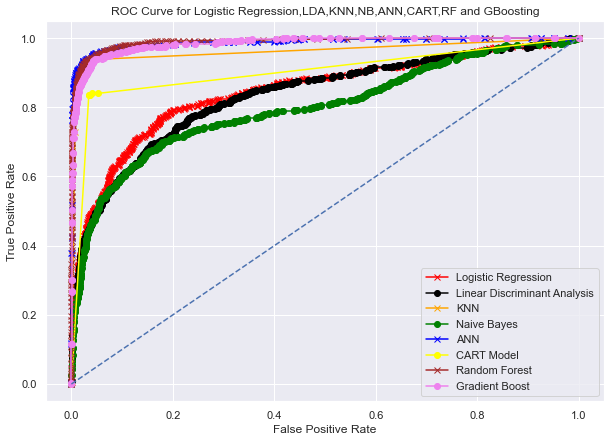

In [166]:
models_names={log_model:'Logistic Regression',lda_model:'Linear Discriminant Analysis',KNN_model:'KNN',NB_model:'Naive Bayes',
              ann_model:'ANN',dt_model:'CART Model',rf_model:'Random Forest',gb_model:'Gradient Boost'}

print('Area under the curve for Logistic Regression Classification Model is',roc_auc_score(y_test,log_model.predict_proba(X_test)[:,1]))
print('Area under the curve for LDA Classification Model is',roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1]))
print('Area under the curve for KNN Classification Model is',roc_auc_score(y_test,KNN_model.predict_proba(nX_test)[:,1]))
print('Area under the curve for Naive Bayes Classification Model is',roc_auc_score(y_test,NB_model.predict_proba(X_test)[:,1]))
print('Area under the curve for ANN Classification Model is',roc_auc_score(y_test,ann_model.predict_proba(nX_test)[:,1]))
print('Area under the curve for CART Classification Model is',roc_auc_score(y_test,dt_model.predict_proba(X_test)[:,1]))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(y_test,rf_model.predict_proba(X_test)[:,1]))
print('Area under the curve for Gradient Boosting Classification Model is',roc_auc_score(y_test,gb_model.predict_proba(X_test)[:,1]))

plt.figure(figsize=(10,7))

fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test,log_model.predict_proba(X_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='x',color='red') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o',color='black') 

fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test,KNN_model.predict_proba(nX_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='x',color='orange') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test,NB_model.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o',color='green') 

fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test,ann_model.predict_proba(nX_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='x',color='blue') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test,dt_model.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o',color='yellow') 

fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test,rf_model.predict_proba(X_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='x',color='brown') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test,gb_model.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o',color='violet') 

# fpr_ann, tpr_ann, thresholds = roc_curve(ntest_labels,nn_best_grid.predict_proba(nX_test)[:,1])
# plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Logistic Regression,LDA,KNN,NB,ANN,CART,RF and GBoosting'))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(models_names.values())
plt.show()

In [167]:
index=['Logistic Regression', 'Linear Discriminant Analysis', 'Naive Bayes','K Neighbours(KNN)','Artificial Neural Networks(ANN)','Decision Tree(CART)','Random Forest','Gradient Boost']
data = pd.DataFrame({
        'Train Accuracy':[log_train_accuracy,lda_train_accuracy,NB_train_accuracy,KNN_train_accuracy,ann_train_accuracy,dt_train_accuracy,rf_train_accuracy,gb_train_accuracy],
        'Test Accuracy':[log_test_accuracy,lda_test_accuracy,NB_test_accuracy,KNN_test_accuracy,ann_test_accuracy,dt_test_accuracy,rf_test_accuracy,gb_test_accuracy],
        'Test Accuracy Threshold':['-','-','-','-','-',threshold_dt_test_accuracy,threshold_rf_test_accuracy,threshold_gb_test_accuracy],
        'Train Precision':[log_train_precision,lda_train_precision,NB_train_precision,KNN_train_precision,ann_train_precision,dt_train_precision,rf_train_precision,gb_train_precision],
        'Test Precision':[log_test_precision,lda_test_precision,NB_test_precision,KNN_test_precision,ann_test_precision,dt_test_precision,rf_test_precision,gb_test_precision],
        'Test Precision Threshold':['-','-','-','-','-',threshold_dt_test_precision,threshold_rf_test_precision,threshold_gb_test_precision],
        'Train Recall':[log_train_recall,lda_train_recall,NB_train_recall,KNN_train_recall,ann_train_recall,dt_train_recall,rf_train_recall,gb_train_recall],
        'Test Recall':[log_test_recall,lda_test_recall,NB_test_recall,KNN_test_recall,ann_test_recall,dt_test_recall,rf_test_recall,gb_test_recall],
        'Test Threshold Recall':['-','-','-','-','-',threshold_dt_test_recall,threshold_rf_test_recall,threshold_gb_test_recall],
        'Train F1 Score':[log_train_f1,lda_train_f1,NB_train_f1,KNN_train_f1,ann_train_f1,dt_train_f1,rf_train_f1,gb_train_f1],
        'Test F1 Score':[log_test_f1,lda_test_f1,NB_test_f1,KNN_test_f1,ann_test_f1,dt_test_f1,rf_test_f1,gb_test_f1],
        'Test F1 Threshold':['-','-','-','-','-',threshold_dt_test_f1,threshold_rf_test_f1,threshold_gb_test_f1],
        'Train AUC Score':[log_train_auc,lda_train_auc,NB_train_auc,KNN_train_auc,ann_train_auc,dt_train_auc,rf_train_auc,gb_train_auc],
        'Test AUC Score':[log_test_auc,lda_test_auc,NB_test_auc,KNN_test_auc,ann_test_auc,dt_test_auc,rf_test_auc,gb_test_auc],
        'Test AUC Threshold':['-','-','-','-','-',threshold_dt_test_auc,threshold_rf_test_auc,threshold_gb_test_auc],
  
},index=index)


In [168]:
round(data,2)

Train Accuracy  Test Accuracy  \
Logistic Regression                        0.88           0.88   
Linear Discriminant Analysis               0.88           0.88   
Naive Bayes                                0.87           0.86   
K Neighbours(KNN)                          1.00           0.97   
Artificial Neural Networks(ANN)            1.00           0.97   
Decision Tree(CART)                        1.00           0.94   
Random Forest                              1.00           0.97   
Gradient Boost                             1.00           0.96   

                                Test Accuracy Threshold  Train Precision  \
Logistic Regression                                   -             0.75   
Linear Discriminant Analysis                          -             0.74   
Naive Bayes                                           -             0.60   
K Neighbours(KNN)                                     -             1.00   
Artificial Neural Networks(ANN)                       -             1.00   
Decision Tree(CART)                                0.94             1.00   
Random Forest                                      0.96             1.00   
Gradient Boost                                     0.96             1.00   

                                 Test Precision Test Precision Threshold  \
Logistic Regression                        0.76                        -   
Linear Discriminant Analysis               0.79                        -   
Naive Bayes                                0.60                        -   
K Neighbours(KNN)                          0.91                        -   
Artificial Neural Networks(ANN)            0.93                        -   
Decision Tree(CART)                        0.83                     0.83   
Random Forest                              0.95                     0.84   
Gradient Boost                             0.92                     0.83   

                                 Train Recall  Test Recall  \
Logistic Regression                      0.46         0.43   
Linear Discriminant Analysis             0.41         0.41   
Naive Bayes                              0.60         0.56   
K Neighbours(KNN)                        1.00         0.89   
Artificial Neural Networks(ANN)          1.00         0.91   
Decision Tree(CART)                      1.00         0.84   
Random Forest                            1.00         0.87   
Gradient Boost                           1.00         0.85   

                                Test Threshold Recall  Train F1 Score  \
Logistic Regression                                 -            0.57   
Linear Discriminant Analysis                        -            0.53   
Naive Bayes                                         -            0.60   
K Neighbours(KNN)                                   -            1.00   
Artificial Neural Networks(ANN)                     -            1.00   
Decision Tree(CART)                              0.84            1.00   
Random Forest                                    0.94            1.00   
Gradient Boost                                   0.92            1.00   

                                 Test F1 Score Test F1 Threshold  \
Logistic Regression                       0.55                 -   
Linear Discriminant Analysis              0.54                 -   
Naive Bayes                               0.58                 -   
K Neighbours(KNN)                         0.90                 -   
Artificial Neural Networks(ANN)           0.92                 -   
Decision Tree(CART)                       0.83              0.83   
Random Forest                             0.90              0.89   
Gradient Boost                            0.88              0.87   

                                 Train AUC Score  Test AUC Score  \
Logistic Regression                         0.87            0.85   
Linear Discriminant Analysis                0.86            0.83   
Naive Bayes                       

# <font color='red'>SMOTE</font>

In [180]:
dfimputed.head()

City_Tier  Payment  Gender  Service_Score  account_segment  CC_Agent_Score  \
0          3        0       0              3                2               2   
1          1        4       1              3                1               3   
2          1        0       1              2                1               3   
3          3        0       1              2                2               5   
4          1        1       1              2                1               5   

   Marital_Status  Complain_ly  Login_device  Tenure  CC_Contacted_LY  \
0               0            1             0     4.0              6.0   
1               0            1             0     0.0              8.0   
2               0            1             0     0.0             30.0   
3               0            0             0     0.0             15.0   
4               0            0             0     0.0             12.0   

   rev_per_month  rev_growth_yoy  coupon_used_for_payment  \
0            9.0            11.0                      1.0   
1            7.0            15.0                      0.0   
2            6.0            14.0                      0.0   
3            8.0            23.0                      0.0   
4            3.0            11.0                      1.0   

   Day_Since_CC_connect  cashback  Account_user_count  Churn  
0                   5.0   159.930                   3      1  
1                   0.0   120.900                   4      1  
2                   3.0   141.708                   4      1  
3                   3.0   134.070                   4      1  
4                   3.0   129.600                   3      1

In [181]:
# Copy all the predictor variables into X dataframe
X = dfimputed.drop(['Churn'], axis=1)
# Copy target into the y dataframe. 
y = dfimputed[['Churn']]

In [182]:
print("Before OverSampling, counts of label '1': {}".format(sum(y.Churn == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y.Churn == 0)))

Before OverSampling, counts of label '1': 1896
Before OverSampling, counts of label '0': 9358 



In [183]:
sm = SMOTE(random_state = 1)

In [184]:
X, y = sm.fit_resample(X, y)
print("After OverSampling, counts of label '1': {}".format(sum(y.Churn == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y.Churn == 0)))

After OverSampling, counts of label '1': 9358
After OverSampling, counts of label '0': 9358 



Text(0.5, 1.0, 'Churn')

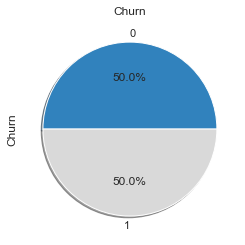

In [185]:
y['Churn'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,cmap="tab20c")
plt.title('Churn')

In [186]:
len(y)

18716

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [188]:
print("Number of X_train dataset after SMOTE: ", X_train.shape)
print("Number of y_train dataset: after SMOTE", y_train.shape)

Number of X_train dataset after SMOTE:  (13101, 17)
Number of y_train dataset: after SMOTE (13101, 1)


In [189]:
print("Number of X_test dataset after SMOTE: ", X_test.shape)
print("Number of y_test dataset: after SMOTE", y_test.shape)

Number of X_test dataset after SMOTE:  (5615, 17)
Number of y_test dataset: after SMOTE (5615, 1)


In [190]:
y.value_counts(normalize=True)

Churn
0        0.5
1        0.5
dtype: float64

In [191]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

13101
5615
13101
5615


In [192]:
#create list of model and accuracy dicts

perform_list_smote = [ ]

def run_model_smote(model_name):
    mdl=''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Linear Discriminant Analysis':
        mdl = LinearDiscriminantAnalysis()
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100, random_state=1)
    elif model_name == 'Gradient Boost Classifier':
        mdl = GradientBoostingClassifier(random_state=1)

    mdl.fit(X_train, y_train)
    y_pred_train = mdl.predict(X_train)
    y_pred_test = mdl.predict(X_test)
   
    # Train Data - Performance metrics
    train_accuracy = round(accuracy_score(y_train, y_pred_train) * 100, 2)
    
    mdl_metrics_train=classification_report(y_train,y_pred_train,output_dict=True)
    mdf_train=pd.DataFrame(mdl_metrics_train).transpose()
    train_precision=round((mdf_train.loc["1"][0])*100,2)
    train_recall=round((mdf_train.loc["1"][1])*100,2)
    train_f1score=round((mdf_train.loc["1"][2])*100,2)
    
    train_probs = mdl.predict_proba(X_train)
    train_probs = train_probs[:, 1]
    train_auc= round(roc_auc_score(y_train, train_probs) * 100, 2)
    
#   Test Data - Performance metrics 
    test_accuracy = round(accuracy_score(y_test, y_pred_test) * 100, 2)
    
    mdl_metrics_test=classification_report(y_test,y_pred_test,output_dict=True)
#     print(mdl_metrics)
    mdf_test=pd.DataFrame(mdl_metrics_test).transpose()
#     print(mdf)
    test_precision=round((mdf_test.loc["1"][0])*100,2)
    test_recall=round((mdf_test.loc["1"][1])*100,2)
    test_f1score=round((mdf_test.loc["1"][2])*100,2)
    
    test_probs = mdl.predict_proba(X_test)
    test_probs = test_probs[:, 1]
    test_auc= round(roc_auc_score(y_test, test_probs) * 100, 2)
    
        
#     # Add performance parameters to list

    perform_list_smote.append(dict([('Model', model_name),('Train Accuracy', round(train_accuracy, 2)),('Test Accuracy', round(test_accuracy, 2)),
                              ('Train Precision', round(train_precision, 2)),('Test Precision', round(test_precision, 2)),
                              ('Train Recall', round(train_recall, 2)),('Test Recall', round(test_recall, 2)),
                              ('Train F1', round(train_f1score, 2)),('Test F1', round(test_f1score, 2)),
                              ('Train AUC', round(train_auc, 2)),('Test AUC', round(test_auc, 2))]))

In [193]:
run_model_smote('Logistic Regression')
run_model_smote('Linear Discriminant Analysis')
run_model_smote('Gaussian Naive Bayes')
run_model_smote('Decision Tree Classifier')
run_model_smote('Random Forest')
run_model_smote('Gradient Boost Classifier')

In [194]:
df_smote=pd.concat([X,y],axis=1)

In [195]:
scaled_df=df_smote.copy()
scaled_df.head()

City_Tier  Payment  Gender  Service_Score  account_segment  CC_Agent_Score  \
0          3        0       0              3                2               2   
1          1        4       1              3                1               3   
2          1        0       1              2                1               3   
3          3        0       1              2                2               5   
4          1        1       1              2                1               5   

   Marital_Status  Complain_ly  Login_device  Tenure  CC_Contacted_LY  \
0               0            1             0     4.0              6.0   
1               0            1             0     0.0              8.0   
2               0            1             0     0.0             30.0   
3               0            0             0     0.0             15.0   
4               0            0             0     0.0             12.0   

   rev_per_month  rev_growth_yoy  coupon_used_for_payment  \
0            9.0            11.0                      1.0   
1            7.0            15.0                      0.0   
2            6.0            14.0                      0.0   
3            8.0            23.0                      0.0   
4            3.0            11.0                      1.0   

   Day_Since_CC_connect  cashback  Account_user_count  Churn  
0                   5.0   159.930                   3      1  
1                   0.0   120.900                   4      1  
2                   3.0   141.708                   4      1  
3                   3.0   134.070                   4      1  
4                   3.0   129.600                   3      1

In [196]:
scaled_df['account_segment'] = scaled_df['account_segment'].replace({0:'Regular', 1:'Regular Plus', 2:'Super', 3:'Super Plus',4:'HNI'})
scaled_df['Marital_Status'] = scaled_df['Marital_Status'].replace({0:'Single', 1:'Married',2:'Divorced'})
scaled_df['Payment'] = scaled_df['Payment'].replace({0:'Debit Card',1:'Credit Card',2:'E wallet',3:'Cash on Delivery',4:'UPI'})
scaled_df['Gender'] = scaled_df['Gender'].replace({0:'Female',1:'Male'})
scaled_df['Login_device'] = scaled_df['Login_device'].replace({0:'Mobile',1:'Computer'})
scaled_df['Complain_ly'] = scaled_df['Complain_ly'].replace({0:'No',1:'Yes'})

In [197]:
scaled_df.head()

City_Tier      Payment  Gender  Service_Score account_segment  \
0          3   Debit Card  Female              3           Super   
1          1          UPI    Male              3    Regular Plus   
2          1   Debit Card    Male              2    Regular Plus   
3          3   Debit Card    Male              2           Super   
4          1  Credit Card    Male              2    Regular Plus   

   CC_Agent_Score Marital_Status Complain_ly Login_device  Tenure  \
0               2         Single         Yes       Mobile     4.0   
1               3         Single         Yes       Mobile     0.0   
2               3         Single         Yes       Mobile     0.0   
3               5         Single          No       Mobile     0.0   
4               5         Single          No       Mobile     0.0   

   CC_Contacted_LY  rev_per_month  rev_growth_yoy  coupon_used_for_payment  \
0              6.0            9.0            11.0                      1.0   
1              8.0            7.0            15.0                      0.0   
2             30.0            6.0            14.0                      0.0   
3             15.0            8.0            23.0                      0.0   
4             12.0            3.0            11.0                      1.0   

   Day_Since_CC_connect  cashback  Account_user_count  Churn  
0                   5.0   159.930                   3      1  
1                   0.0   120.900                   4      1  
2                   3.0   141.708                   4      1  
3                   3.0   134.070                   4      1  
4                   3.0   129.600                   3      1

In [198]:
cat=['Payment','Gender','account_segment','Marital_Status','Login_device','Complain_ly','City_Tier','Service_Score','CC_Agent_Score','Account_user_count']

In [199]:
scaled_df =pd.get_dummies(scaled_df, columns=cat,drop_first=True)

In [200]:
scaled_df.rename(columns = {'Payment_Credit Card' : 'Payment_Credit_Card','Payment_Debit Card' : 'Payment_Debit_Card'
                        ,'Payment_E wallet' : 'Payment_E_wallet','account_segment_Regular Plus':'account_segment_Regular_Plus'
                        ,'account_segment_Super Plus':'account_segment_Super_Plus'}, inplace = True)

In [201]:
scaled_df.head()

Tenure  CC_Contacted_LY  rev_per_month  rev_growth_yoy  \
0     4.0              6.0            9.0            11.0   
1     0.0              8.0            7.0            15.0   
2     0.0             30.0            6.0            14.0   
3     0.0             15.0            8.0            23.0   
4     0.0             12.0            3.0            11.0   

   coupon_used_for_payment  Day_Since_CC_connect  cashback  Churn  \
0                      1.0                   5.0   159.930      1   
1                      0.0                   0.0   120.900      1   
2                      0.0                   3.0   141.708      1   
3                      0.0                   3.0   134.070      1   
4                      1.0                   3.0   129.600      1   

   Payment_Credit_Card  Payment_Debit_Card  ...  Service_Score_5  \
0                    0                   1  ...                0   
1                    0                   0  ...                0   
2                    0                   1  ...                0   
3                    0                   1  ...                0   
4                    1                   0  ...                0   

   CC_Agent_Score_2  CC_Agent_Score_3  CC_Agent_Score_4  CC_Agent_Score_5  \
0                 1                 0                 0                 0   
1                 0                 1                 0                 0   
2                 0                 1                 0                 0   
3                 0                 0                 0                 1   
4                 0                 0                 0                 1   

   Account_user_count_2  Account_user_count_3  Account_user_count_4  \
0                     0                     1                     0   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     1   
4                     0                     1                     0   

   Account_user_count_5  Account_user_count_6  
0                     0                     0  
1                     0                     0  
2                     0                     0  
3                     0                     0  
4                     0                     0  

[5 rows x 37 columns]

In [202]:
nX = scaled_df.drop(['Churn'], axis=1)
ny = scaled_df[['Churn']]

In [203]:
nX_train, nX_test, ny_train, ny_test = train_test_split(nX, ny, test_size=0.30 , random_state=1)

In [204]:
col_names = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy','coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']
features = nX_train[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

nX_train[col_names] = features

In [205]:
features = nX_test[col_names]
features = scaler.transform(features.values)
nX_test[col_names] = features

In [206]:
# nX_test

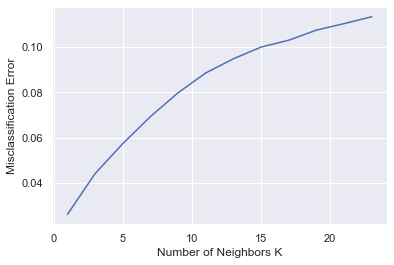

In [207]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,25,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(nX_train, ny_train)
    # evaluate test accuracy
    scores = knn.score(nX_test, ny_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
plt.plot(range(1,25,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [208]:
kmdl=KNeighborsClassifier(n_neighbors=2,weights='distance')
kmdl.fit(nX_train,ny_train)
y_pred_train = kmdl.predict(nX_train)
y_pred_test = kmdl.predict(nX_test)
train_accuracy = round(accuracy_score(ny_train, y_pred_train) * 100, 2)

mdl_metrics_train=classification_report(ny_train,y_pred_train,output_dict=True)
mdf_train=pd.DataFrame(mdl_metrics_train).transpose()
train_precision=round((mdf_train.loc["1"][0])*100,2)
train_recall=round((mdf_train.loc["1"][1])*100,2)
train_f1score=round((mdf_train.loc["1"][2])*100,2)

train_probs = kmdl.predict_proba(nX_train)
train_probs = train_probs[:, 1]
train_auc= round(roc_auc_score(ny_train, train_probs) * 100, 2)

#   Test Data - Performance metrics 
test_accuracy = round(accuracy_score(ny_test, y_pred_test) * 100, 2)

mdl_metrics_test=classification_report(ny_test,y_pred_test,output_dict=True)
# print(mdl_metrics)
mdf_test=pd.DataFrame(mdl_metrics_test).transpose()
# print(mdf)
test_precision=round((mdf_test.loc["1"][0])*100,2)
test_recall=round((mdf_test.loc["1"][1])*100,2)
test_f1score=round((mdf_test.loc["1"][2])*100,2)

test_probs = kmdl.predict_proba(nX_test)
test_probs = test_probs[:, 1]
test_auc= round(roc_auc_score(ny_test, test_probs) * 100, 2)

In [209]:
perform_list_smote.append(dict([('Model', 'K Nearest Neighbour'),('Train Accuracy', round(train_accuracy, 2)),('Test Accuracy', round(test_accuracy, 2)),
                              ('Train Precision', round(train_precision, 2)),('Test Precision', round(test_precision, 2)),
                              ('Train Recall', round(train_recall, 2)),('Test Recall', round(test_recall, 2)),
                              ('Train F1', round(train_f1score, 2)),('Test F1', round(test_f1score, 2)),
                              ('Train AUC', round(train_auc, 2)),('Test AUC', round(test_auc, 2))]))

In [210]:
nmdl = MLPClassifier(random_state=1)
nmdl.fit(nX_train, ny_train)
y_pred_train = nmdl.predict(nX_train)
y_pred_test = nmdl.predict(nX_test)

In [211]:
train_accuracy = round(accuracy_score(ny_train, y_pred_train) * 100, 2)

mdl_metrics_train=classification_report(ny_train,y_pred_train,output_dict=True)
mdf_train=pd.DataFrame(mdl_metrics_train).transpose()
train_precision=round((mdf_train.loc["1"][0])*100,2)
train_recall=round((mdf_train.loc["1"][1])*100,2)
train_f1score=round((mdf_train.loc["1"][2])*100,2)

train_probs = nmdl.predict_proba(nX_train)
train_probs = train_probs[:, 1]
train_auc= round(roc_auc_score(ny_train, train_probs) * 100, 2)

#   Test Data - Performance metrics 
test_accuracy = round(accuracy_score(ny_test, y_pred_test) * 100, 2)

mdl_metrics_test=classification_report(ny_test,y_pred_test,output_dict=True)
# print(mdl_metrics)
mdf_test=pd.DataFrame(mdl_metrics_test).transpose()
# print(mdf)
test_precision=round((mdf_test.loc["1"][0])*100,2)
test_recall=round((mdf_test.loc["1"][1])*100,2)
test_f1score=round((mdf_test.loc["1"][2])*100,2)

test_probs = nmdl.predict_proba(nX_test)
test_probs = test_probs[:, 1]
test_auc= round(roc_auc_score(ny_test, test_probs) * 100, 2)

In [212]:
perform_list_smote.append(dict([('Model', 'Artificial Neural Network'),('Train Accuracy', round(train_accuracy, 2)),('Test Accuracy', round(test_accuracy, 2)),
                              ('Train Precision', round(train_precision, 2)),('Test Precision', round(test_precision, 2)),
                              ('Train Recall', round(train_recall, 2)),('Test Recall', round(test_recall, 2)),
                              ('Train F1', round(train_f1score, 2)),('Test F1', round(test_f1score, 2)),
                              ('Train AUC', round(train_auc, 2)),('Test AUC', round(test_auc, 2))]))

In [213]:
model_performance = pd.DataFrame(data=perform_list_smote)
model_performance

Model  Train Accuracy  Test Accuracy  \
0           Logistic Regression           78.53          78.04   
1  Linear Discriminant Analysis           78.09          77.54   
2          Gaussian Naive Bayes           72.48          71.34   
3      Decision Tree Classifier          100.00          93.57   
4                 Random Forest          100.00          97.45   
5     Gradient Boost Classifier           91.62          90.86   
6           K Nearest Neighbour          100.00          97.38   
7     Artificial Neural Network           99.24          96.06   

   Train Precision  Test Precision  Train Recall  Test Recall  Train F1  \
0            77.80           76.16         80.34        80.34     79.05   
1            76.44           74.92         81.74        81.43     79.01   
2            70.55           68.47         77.99        77.00     74.08   
3           100.00           92.74        100.00        94.26    100.00   
4           100.00           96.54        100.00        98.33    100.00   
5            92.27           91.05         91.01        90.23     91.63   
6           100.00           96.20        100.00        98.55    100.00   
7            99.32           95.70         99.18        96.29     99.25   

   Test F1  Train AUC  Test AUC  
0    78.20      85.91     85.61  
1    78.04      85.96     85.55  
2    72.48      81.08     80.52  
3    93.49     100.00     93.58  
4    97.43     100.00     99.75  
5    90.64      97.54     97.12  
6    97.36     100.00     98.36  
7    96.00      99.96     99.08

# <font color='red'>Binning</font>

In [214]:
dfbin=dfuni.copy(deep=True)

In [215]:
dfbin.head()

City_Tier      Payment  Gender  Service_Score account_segment  \
0          3   Debit Card  Female              3           Super   
1          1          UPI    Male              3    Regular Plus   
2          1   Debit Card    Male              2    Regular Plus   
3          3   Debit Card    Male              2           Super   
4          1  Credit Card    Male              2    Regular Plus   

   CC_Agent_Score Marital_Status Complain_ly Login_device  Tenure  \
0               2         Single         Yes       Mobile     4.0   
1               3         Single         Yes       Mobile     0.0   
2               3         Single         Yes       Mobile     0.0   
3               5         Single          No       Mobile     0.0   
4               5         Single          No       Mobile     0.0   

   CC_Contacted_LY  rev_per_month  rev_growth_yoy  coupon_used_for_payment  \
0              6.0            9.0            11.0                      1.0   
1              8.0            7.0            15.0                      0.0   
2             30.0            6.0            14.0                      0.0   
3             15.0            8.0            23.0                      0.0   
4             12.0            3.0            11.0                      1.0   

   Day_Since_CC_connect  cashback  Account_user_count  Churn  cluster  
0                   5.0   159.930                   3      1        0  
1                   0.0   120.900                   4      1        0  
2                   3.0   141.708                   4      1        0  
3                   3.0   134.070                   4      1        0  
4                   3.0   129.600                   3      1        0

In [216]:
# binning of account segment
dfbin['account_segment'] = dfbin['account_segment'].replace({'Regular Plus': 'Regular', 'Super Plus': 'Super', 'HNI': 'HNI'})
dfbin["Service_Score"] = dfbin["Service_Score"].replace({0:'Poor',1:'Poor',2:'Fair',3:'Fair',4:'Good',5:'Good'})
dfbin["CC_Agent_Score"] = dfbin["CC_Agent_Score"].replace({1:'Poor',2:'Poor',3:'Satisfactory',4:'Satisfactory',5:'Excellent'})

In [217]:
dfbin["cashback_category"] = pd.cut(
    x=dfbin["cashback"],
    bins=[0,100,200,400],
    labels=["Low-range cashback account", "Mid-Range cashback account", "Highly generate cashback account"],
)

In [218]:
dfbin.drop(columns=["cashback"], axis=1, inplace=True)

In [219]:
df_bin_knn=dfbin.copy(deep=True)

In [220]:
dfbin['account_segment'] = dfbin['account_segment'].replace({'Regular': 0, 'Super': 1, 'HNI':2})
dfbin['Marital_Status'] = dfbin['Marital_Status'].replace({'Single': 0, 'Married': 1, 'Divorced': 2})
dfbin['Payment'] = dfbin['Payment'].replace({'Debit Card': 0, 'Credit Card': 1, 'E wallet': 2, 'Cash on Delivery': 3,'UPI':4})
dfbin['Gender'] = dfbin['Gender'].replace({'Female': 0, 'Male': 1})
dfbin['Login_device'] = dfbin['Login_device'].replace({'Mobile': 0, 'Computer': 1})
dfbin['Complain_ly'] = dfbin['Complain_ly'].replace({'No':0,'Yes':1})
dfbin['Service_Score'] = dfbin['Service_Score'].replace({'Poor':2,'Fair':0,'Good':1})
dfbin['CC_Agent_Score'] = dfbin['CC_Agent_Score'].replace({'Poor':0,'Satisfactory':1,'Excellent':2})
dfbin['cashback_category']=dfbin["cashback_category"].replace({'Low-range cashback account':2,'Mid-Range cashback account':0,'Highly generate cashback account':1})

In [221]:
dfbin.head()

City_Tier  Payment  Gender  Service_Score  account_segment  CC_Agent_Score  \
0          3        0       0              0                1               0   
1          1        4       1              0                0               1   
2          1        0       1              0                0               1   
3          3        0       1              0                1               2   
4          1        1       1              0                0               2   

   Marital_Status  Complain_ly  Login_device  Tenure  CC_Contacted_LY  \
0               0            1             0     4.0              6.0   
1               0            1             0     0.0              8.0   
2               0            1             0     0.0             30.0   
3               0            0             0     0.0             15.0   
4               0            0             0     0.0             12.0   

   rev_per_month  rev_growth_yoy  coupon_used_for_payment  \
0            9.0            11.0                      1.0   
1            7.0            15.0                      0.0   
2            6.0            14.0                      0.0   
3            8.0            23.0                      0.0   
4            3.0            11.0                      1.0   

   Day_Since_CC_connect  Account_user_count  Churn  cluster  cashback_category  
0                   5.0                   3      1        0                  0  
1                   0.0                   4      1        0                  0  
2                   3.0                   4      1        0                  0  
3                   3.0                   4      1        0                  0  
4                   3.0                   3      1        0                  0

In [222]:
# Copy all the predictor variables into X dataframe
X = dfbin.drop(['Churn'], axis=1)
# Copy target into the y dataframe. 
y = dfbin[['Churn']]

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=dfbin['Churn'])

In [224]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

7877
3377
7877
3377


In [225]:
#create list of model and accuracy dicts

bin_perform_list = [ ]

def run_model_binning_data(model_name):
    mdl=''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Linear Discriminant Analysis':
        mdl = LinearDiscriminantAnalysis()
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100, random_state=1)
    elif model_name == 'Gradient Boost Classifier':
        mdl = GradientBoostingClassifier(random_state=1)

    mdl.fit(X_train, y_train)
    y_pred_train = mdl.predict(X_train)
    y_pred_test = mdl.predict(X_test)
   
    # Train Data - Performance metrics
    train_accuracy = round(accuracy_score(y_train, y_pred_train) * 100, 2)
    
    mdl_metrics_train=classification_report(y_train,y_pred_train,output_dict=True)
    mdf_train=pd.DataFrame(mdl_metrics_train).transpose()
    train_precision=round((mdf_train.loc["1"][0])*100,2)
    train_recall=round((mdf_train.loc["1"][1])*100,2)
    train_f1score=round((mdf_train.loc["1"][2])*100,2)
    
    train_probs = mdl.predict_proba(X_train)
    train_probs = train_probs[:, 1]
    train_auc= round(roc_auc_score(y_train, train_probs) * 100, 2)
    
#   Test Data - Performance metrics 
    test_accuracy = round(accuracy_score(y_test, y_pred_test) * 100, 2)
    
    mdl_metrics_test=classification_report(y_test,y_pred_test,output_dict=True)
#     print(mdl_metrics)
    mdf_test=pd.DataFrame(mdl_metrics_test).transpose()
#     print(mdf)
    test_precision=round((mdf_test.loc["1"][0])*100,2)
    test_recall=round((mdf_test.loc["1"][1])*100,2)
    test_f1score=round((mdf_test.loc["1"][2])*100,2)
    
    test_probs = mdl.predict_proba(X_test)
    test_probs = test_probs[:, 1]
    test_auc= round(roc_auc_score(y_test, test_probs) * 100, 2)
    
#     # Add performance parameters to list

    bin_perform_list.append(dict([('Model', model_name),('Train Accuracy', round(train_accuracy, 2)),('Test Accuracy', round(test_accuracy, 2)),
                              ('Train Precision', round(train_precision, 2)),('Test Precision', round(test_precision, 2)),
                              ('Train Recall', round(train_recall, 2)),('Test Recall', round(test_recall, 2)),
                              ('Train F1', round(train_f1score, 2)),('Test F1', round(test_f1score, 2)),
                              ('Train AUC', round(train_auc, 2)),('Test AUC', round(test_auc, 2))]))

In [226]:
run_model_binning_data('Logistic Regression')
run_model_binning_data('Linear Discriminant Analysis')
run_model_binning_data('Gaussian Naive Bayes')
run_model_binning_data('Decision Tree Classifier')
run_model_binning_data('Random Forest')
run_model_binning_data('Gradient Boost Classifier')

In [227]:
df_bin_knn.head()

City_Tier      Payment  Gender Service_Score account_segment  \
0          3   Debit Card  Female          Fair           Super   
1          1          UPI    Male          Fair         Regular   
2          1   Debit Card    Male          Fair         Regular   
3          3   Debit Card    Male          Fair           Super   
4          1  Credit Card    Male          Fair         Regular   

  CC_Agent_Score Marital_Status Complain_ly Login_device  Tenure  \
0           Poor         Single         Yes       Mobile     4.0   
1   Satisfactory         Single         Yes       Mobile     0.0   
2   Satisfactory         Single         Yes       Mobile     0.0   
3      Excellent         Single          No       Mobile     0.0   
4      Excellent         Single          No       Mobile     0.0   

   CC_Contacted_LY  rev_per_month  rev_growth_yoy  coupon_used_for_payment  \
0              6.0            9.0            11.0                      1.0   
1              8.0            7.0            15.0                      0.0   
2             30.0            6.0            14.0                      0.0   
3             15.0            8.0            23.0                      0.0   
4             12.0            3.0            11.0                      1.0   

   Day_Since_CC_connect  Account_user_count  Churn  cluster  \
0                   5.0                   3      1        0   
1                   0.0                   4      1        0   
2                   3.0                   4      1        0   
3                   3.0                   4      1        0   
4                   3.0                   3      1        0   

            cashback_category  
0  Mid-Range cashback account  
1  Mid-Range cashback account  
2  Mid-Range cashback account  
3  Mid-Range cashback account  
4  Mid-Range cashback account

In [228]:
cat=['Payment','Gender','Service_Score','account_segment','CC_Agent_Score','Marital_Status','Complain_ly','Login_device','City_Tier','Account_user_count','cashback_category']

In [229]:
scaled_df =pd.get_dummies(df_bin_knn, columns=cat,drop_first=True)

In [230]:
scaled_df.columns

Index(['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'Churn', 'cluster',
       'Payment_Credit Card', 'Payment_Debit Card', 'Payment_E wallet',
       'Payment_UPI', 'Gender_Male', 'Service_Score_Good',
       'Service_Score_Poor', 'account_segment_Regular',
       'account_segment_Super', 'CC_Agent_Score_Poor',
       'CC_Agent_Score_Satisfactory', 'Marital_Status_Married',
       'Marital_Status_Single', 'Complain_ly_Yes', 'Login_device_Mobile',
       'City_Tier_2', 'City_Tier_3', 'Account_user_count_2',
       'Account_user_count_3', 'Account_user_count_4', 'Account_user_count_5',
       'Account_user_count_6', 'cashback_category_Mid-Range cashback account',
       'cashback_category_Highly generate cashback account'],
      dtype='object')

In [231]:
scaled_df.rename(columns = {'Payment_Credit Card' : 'Payment_Credit_Card','Payment_Debit Card' : 'Payment_Debit_Card'
                        ,'Payment_E wallet' : 'Payment_E_wallet','cashback_category_Mid-Range cashback account':'cashback_category_Mid_Range'
                        ,'cashback_category_Highly generate cashback account':'cashback_category_High'}, inplace = True)

In [232]:
nX = scaled_df.drop(['Churn'], axis=1)
ny = scaled_df[['Churn']]

In [233]:
nX_train, nX_test, ny_train, ny_test = train_test_split(nX, ny, test_size=0.30 , random_state=1,stratify=scaled_df['Churn'])

In [234]:
col_names = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy','coupon_used_for_payment', 'Day_Since_CC_connect']
features = nX_train[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

nX_train[col_names] = features

In [235]:
features = nX_test[col_names]
features = scaler.transform(features.values)
nX_test[col_names] = features

In [236]:
kmdl=KNeighborsClassifier(n_neighbors=2,weights='distance')
kmdl.fit(nX_train,ny_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [237]:
y_pred_train = kmdl.predict(nX_train)
y_pred_test = kmdl.predict(nX_test)

In [238]:
train_accuracy = round(accuracy_score(ny_train, y_pred_train) * 100, 2)

mdl_metrics_train=classification_report(ny_train,y_pred_train,output_dict=True)
mdf_train=pd.DataFrame(mdl_metrics_train).transpose()
train_precision=round((mdf_train.loc["1"][0])*100,2)
train_recall=round((mdf_train.loc["1"][1])*100,2)
train_f1score=round((mdf_train.loc["1"][2])*100,2)

train_probs = kmdl.predict_proba(nX_train)
train_probs = train_probs[:, 1]
train_auc= round(roc_auc_score(ny_train, train_probs) * 100, 2)

#   Test Data - Performance metrics 
test_accuracy = round(accuracy_score(ny_test, y_pred_test) * 100, 2)

mdl_metrics_test=classification_report(ny_test,y_pred_test,output_dict=True)
# print(mdl_metrics)
mdf_test=pd.DataFrame(mdl_metrics_test).transpose()
# print(mdf)
test_precision=round((mdf_test.loc["1"][0])*100,2)
test_recall=round((mdf_test.loc["1"][1])*100,2)
test_f1score=round((mdf_test.loc["1"][2])*100,2)

test_probs = kmdl.predict_proba(nX_test)
test_probs = test_probs[:, 1]
test_auc= round(roc_auc_score(ny_test, test_probs) * 100, 2)

bin_perform_list.append(dict([('Model', 'K Nearest Neighbour'),('Train Accuracy', round(train_accuracy, 2)),('Test Accuracy', round(test_accuracy, 2)),
                              ('Train Precision', round(train_precision, 2)),('Test Precision', round(test_precision, 2)),
                              ('Train Recall', round(train_recall, 2)),('Test Recall', round(test_recall, 2)),
                              ('Train F1', round(train_f1score, 2)),('Test F1', round(test_f1score, 2)),
                              ('Train AUC', round(train_auc, 2)),('Test AUC', round(test_auc, 2))]))

In [239]:
nmdl = MLPClassifier(random_state=1)
nmdl.fit(nX_train, ny_train)
y_pred_train = nmdl.predict(nX_train)
y_pred_test = nmdl.predict(nX_test)

In [240]:
train_accuracy = round(accuracy_score(ny_train, y_pred_train) * 100, 2)

mdl_metrics_train=classification_report(ny_train,y_pred_train,output_dict=True)
mdf_train=pd.DataFrame(mdl_metrics_train).transpose()
train_precision=round((mdf_train.loc["1"][0])*100,2)
train_recall=round((mdf_train.loc["1"][1])*100,2)
train_f1score=round((mdf_train.loc["1"][2])*100,2)

train_probs = nmdl.predict_proba(nX_train)
train_probs = train_probs[:, 1]
train_auc= round(roc_auc_score(ny_train, train_probs) * 100, 2)

#   Test Data - Performance metrics 
test_accuracy = round(accuracy_score(ny_test, y_pred_test) * 100, 2)

mdl_metrics_test=classification_report(ny_test,y_pred_test,output_dict=True)
# print(mdl_metrics)
mdf_test=pd.DataFrame(mdl_metrics_test).transpose()
# print(mdf)
test_precision=round((mdf_test.loc["1"][0])*100,2)
test_recall=round((mdf_test.loc["1"][1])*100,2)
test_f1score=round((mdf_test.loc["1"][2])*100,2)

test_probs = nmdl.predict_proba(nX_test)
test_probs = test_probs[:, 1]
test_auc= round(roc_auc_score(ny_test, test_probs) * 100, 2)


bin_perform_list.append(dict([('Model', 'Artificial Neural Network'),('Train Accuracy', round(train_accuracy, 2)),('Test Accuracy', round(test_accuracy, 2)),
                              ('Train Precision', round(train_precision, 2)),('Test Precision', round(test_precision, 2)),
                              ('Train Recall', round(train_recall, 2)),('Test Recall', round(test_recall, 2)),
                              ('Train F1', round(train_f1score, 2)),('Test F1', round(test_f1score, 2)),
                              ('Train AUC', round(train_auc, 2)),('Test AUC', round(test_auc, 2))]))

In [241]:
model_performance = pd.DataFrame(data=bin_perform_list)
model_performance

Model  Train Accuracy  Test Accuracy  \
0           Logistic Regression           88.56          88.51   
1  Linear Discriminant Analysis           88.03          88.45   
2          Gaussian Naive Bayes           85.08          84.57   
3      Decision Tree Classifier          100.00          94.17   
4                 Random Forest          100.00          97.25   
5     Gradient Boost Classifier           91.72          91.38   
6           K Nearest Neighbour          100.00          96.98   
7     Artificial Neural Network           99.29          96.30   

   Train Precision  Test Precision  Train Recall  Test Recall  Train F1  \
0            75.06           75.93         48.08        46.57     58.61   
1            75.20           78.06         43.18        43.76     54.86   
2            54.86           53.77         64.66        60.11     59.36   
3           100.00           82.52        100.00        82.95    100.00   
4           100.00           98.18        100.00        85.24    100.00   
5            82.74           83.90         64.28        60.46     72.35   
6           100.00           91.33        100.00        90.69    100.00   
7            97.82           89.93         97.97        87.87     97.89   

   Test F1  Train AUC  Test AUC  
0    57.73      87.58     85.02  
1    56.08      86.76     83.99  
2    56.76      81.81     79.23  
3    82.73     100.00     89.70  
4    91.25     100.00     99.42  
5    70.28      94.77     92.95  
6    91.01     100.00     96.53  
7    88.89      99.95     98.29

# <font color='red'>VIF</font>

In [242]:
dfvif=dfimputed.copy(deep=True)

In [243]:
dfvif.head()

City_Tier  Payment  Gender  Service_Score  account_segment  CC_Agent_Score  \
0          3        0       0              3                2               2   
1          1        4       1              3                1               3   
2          1        0       1              2                1               3   
3          3        0       1              2                2               5   
4          1        1       1              2                1               5   

   Marital_Status  Complain_ly  Login_device  Tenure  CC_Contacted_LY  \
0               0            1             0     4.0              6.0   
1               0            1             0     0.0              8.0   
2               0            1             0     0.0             30.0   
3               0            0             0     0.0             15.0   
4               0            0             0     0.0             12.0   

   rev_per_month  rev_growth_yoy  coupon_used_for_payment  \
0            9.0            11.0                      1.0   
1            7.0            15.0                      0.0   
2            6.0            14.0                      0.0   
3            8.0            23.0                      0.0   
4            3.0            11.0                      1.0   

   Day_Since_CC_connect  cashback  Account_user_count  Churn  
0                   5.0   159.930                   3      1  
1                   0.0   120.900                   4      1  
2                   3.0   141.708                   4      1  
3                   3.0   134.070                   4      1  
4                   3.0   129.600                   3      1

In [244]:
# Copy all the predictor variables into X dataframe
X = dfvif.drop(['Churn'], axis=1)
# Copy target into the y dataframe. 
y = dfvif[['Churn']]

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=dfvif['Churn'])

In [246]:
print(len(X_train))
print(len(X_test))

7877
3377


In [247]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

                    feature        VIF
0                 City_Tier   4.339467
1                   Payment   1.816918
2                    Gender   2.444650
3             Service_Score  18.984569
4           account_segment   4.970087
5            CC_Agent_Score   5.636294
6            Marital_Status   2.670529
7               Complain_ly   1.392911
8              Login_device   1.367844
9                    Tenure   3.056453
10          CC_Contacted_LY   5.223281
11            rev_per_month   4.617913
12           rev_growth_yoy  15.409734
13  coupon_used_for_payment   3.502021
14     Day_Since_CC_connect   3.476154
15                 cashback  23.701545
16       Account_user_count  15.232197


In [248]:
# Drop 'new_price_num' from train and test
col_to_drop = "cashback"
X_train = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train)
print("VIF after dropping ", col_to_drop)
print(vif)


VIF after dropping  cashback
                    feature        VIF
0                 City_Tier   4.285458
1                   Payment   1.816472
2                    Gender   2.419528
3             Service_Score  18.456915
4           account_segment   4.472286
5            CC_Agent_Score   5.576557
6            Marital_Status   2.654875
7               Complain_ly   1.387982
8              Login_device   1.367757
9                    Tenure   2.611832
10          CC_Contacted_LY   5.211011
11            rev_per_month   4.538614
12           rev_growth_yoy  14.997114
13  coupon_used_for_payment   3.479443
14     Day_Since_CC_connect   3.299696
15       Account_user_count  14.647823


In [249]:
# Drop 'new_price_num' from train and test
col_to_drop = "Service_Score"
X_train = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train)
print("VIF after dropping ", col_to_drop)
print(vif)

VIF after dropping  Service_Score
                    feature        VIF
0                 City_Tier   4.266640
1                   Payment   1.816472
2                    Gender   2.412079
3           account_segment   4.471536
4            CC_Agent_Score   5.466708
5            Marital_Status   2.630845
6               Complain_ly   1.385730
7              Login_device   1.367670
8                    Tenure   2.611761
9           CC_Contacted_LY   5.137015
10            rev_per_month   4.454691
11           rev_growth_yoy  13.756232
12  coupon_used_for_payment   3.372502
13     Day_Since_CC_connect   3.284453
14       Account_user_count  12.041767


In [250]:
# Drop 'new_price_num' from train and test
col_to_drop = "rev_growth_yoy"
X_train = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train)
print("VIF after dropping ", col_to_drop)
print(vif)

VIF after dropping  rev_growth_yoy
                    feature       VIF
0                 City_Tier  4.200668
1                   Payment  1.815461
2                    Gender  2.359303
3           account_segment  4.445022
4            CC_Agent_Score  5.237963
5            Marital_Status  2.607376
6               Complain_ly  1.379952
7              Login_device  1.361295
8                    Tenure  2.596780
9           CC_Contacted_LY  4.875819
10            rev_per_month  4.369241
11  coupon_used_for_payment  3.370202
12     Day_Since_CC_connect  3.274849
13       Account_user_count  9.956243


In [251]:
# Drop 'new_price_num' from train and test
col_to_drop = "Account_user_count"
X_train = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train)
print("VIF after dropping ", col_to_drop)
print(vif)

VIF after dropping  Account_user_count
                    feature       VIF
0                 City_Tier  3.994040
1                   Payment  1.806307
2                    Gender  2.289329
3           account_segment  4.418930
4            CC_Agent_Score  4.887948
5            Marital_Status  2.582536
6               Complain_ly  1.366036
7              Login_device  1.345614
8                    Tenure  2.592966
9           CC_Contacted_LY  4.624195
10            rev_per_month  4.166368
11  coupon_used_for_payment  3.186894
12     Day_Since_CC_connect  3.261538


In [252]:
#create list of model and accuracy dicts

vif_perform_list = [ ]

def run_model_vif_data(model_name):
    mdl=''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Linear Discriminant Analysis':
        mdl = LinearDiscriminantAnalysis()
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100, random_state=1)
    elif model_name == 'Gradient Boost Classifier':
        mdl = GradientBoostingClassifier(random_state=1)

    mdl.fit(X_train, y_train)
    y_pred_train = mdl.predict(X_train)
    y_pred_test = mdl.predict(X_test)
   
    # Train Data - Performance metrics
    train_accuracy = round(accuracy_score(y_train, y_pred_train) * 100, 2)
    
    mdl_metrics_train=classification_report(y_train,y_pred_train,output_dict=True)
    mdf_train=pd.DataFrame(mdl_metrics_train).transpose()
    train_precision=round((mdf_train.loc["1"][0])*100,2)
    train_recall=round((mdf_train.loc["1"][1])*100,2)
    train_f1score=round((mdf_train.loc["1"][2])*100,2)
    
    train_probs = mdl.predict_proba(X_train)
    train_probs = train_probs[:, 1]
    train_auc= round(roc_auc_score(y_train, train_probs) * 100, 2)
    
#   Test Data - Performance metrics 
    test_accuracy = round(accuracy_score(y_test, y_pred_test) * 100, 2)
    
    mdl_metrics_test=classification_report(y_test,y_pred_test,output_dict=True)
#     print(mdl_metrics)
    mdf_test=pd.DataFrame(mdl_metrics_test).transpose()
#     print(mdf)
    test_precision=round((mdf_test.loc["1"][0])*100,2)
    test_recall=round((mdf_test.loc["1"][1])*100,2)
    test_f1score=round((mdf_test.loc["1"][2])*100,2)
    
    test_probs = mdl.predict_proba(X_test)
    test_probs = test_probs[:, 1]
    test_auc= round(roc_auc_score(y_test, test_probs) * 100, 2)
    
#     # Add performance parameters to list

    vif_perform_list.append(dict([('Model', model_name),('Train Accuracy', round(train_accuracy, 2)),('Test Accuracy', round(test_accuracy, 2)),
                              ('Train Precision', round(train_precision, 2)),('Test Precision', round(test_precision, 2)),
                              ('Train Recall', round(train_recall, 2)),('Test Recall', round(test_recall, 2)),
                              ('Train F1', round(train_f1score, 2)),('Test F1', round(test_f1score, 2)),
                              ('Train AUC', round(train_auc, 2)),('Test AUC', round(test_auc, 2))]))

In [253]:
run_model_vif_data('Logistic Regression')
run_model_vif_data('Linear Discriminant Analysis')
run_model_vif_data('Gaussian Naive Bayes')
run_model_vif_data('Decision Tree Classifier')
run_model_vif_data('Random Forest')
run_model_vif_data('Gradient Boost Classifier')

In [254]:
scaled_df=dfuni.copy()
scaled_df.head()

City_Tier      Payment  Gender  Service_Score account_segment  \
0          3   Debit Card  Female              3           Super   
1          1          UPI    Male              3    Regular Plus   
2          1   Debit Card    Male              2    Regular Plus   
3          3   Debit Card    Male              2           Super   
4          1  Credit Card    Male              2    Regular Plus   

   CC_Agent_Score Marital_Status Complain_ly Login_device  Tenure  \
0               2         Single         Yes       Mobile     4.0   
1               3         Single         Yes       Mobile     0.0   
2               3         Single         Yes       Mobile     0.0   
3               5         Single          No       Mobile     0.0   
4               5         Single          No       Mobile     0.0   

   CC_Contacted_LY  rev_per_month  rev_growth_yoy  coupon_used_for_payment  \
0              6.0            9.0            11.0                      1.0   
1              8.0            7.0            15.0                      0.0   
2             30.0            6.0            14.0                      0.0   
3             15.0            8.0            23.0                      0.0   
4             12.0            3.0            11.0                      1.0   

   Day_Since_CC_connect  cashback  Account_user_count  Churn  cluster  
0                   5.0   159.930                   3      1        0  
1                   0.0   120.900                   4      1        0  
2                   3.0   141.708                   4      1        0  
3                   3.0   134.070                   4      1        0  
4                   3.0   129.600                   3      1        0

In [255]:
scaled_df.drop(['cashback','Service_Score','rev_growth_yoy','Account_user_count'],axis=1,inplace=True)

In [256]:
scaled_df.head()

City_Tier      Payment  Gender account_segment  CC_Agent_Score  \
0          3   Debit Card  Female           Super               2   
1          1          UPI    Male    Regular Plus               3   
2          1   Debit Card    Male    Regular Plus               3   
3          3   Debit Card    Male           Super               5   
4          1  Credit Card    Male    Regular Plus               5   

  Marital_Status Complain_ly Login_device  Tenure  CC_Contacted_LY  \
0         Single         Yes       Mobile     4.0              6.0   
1         Single         Yes       Mobile     0.0              8.0   
2         Single         Yes       Mobile     0.0             30.0   
3         Single          No       Mobile     0.0             15.0   
4         Single          No       Mobile     0.0             12.0   

   rev_per_month  coupon_used_for_payment  Day_Since_CC_connect  Churn  \
0            9.0                      1.0                   5.0      1   
1            7.0                      0.0                   0.0      1   
2            6.0                      0.0                   3.0      1   
3            8.0                      0.0                   3.0      1   
4            3.0                      1.0                   3.0      1   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0

In [257]:
cat=['Payment','Gender','account_segment','Marital_Status','Login_device','Complain_ly','City_Tier','CC_Agent_Score']

In [258]:
scaled_df =pd.get_dummies(scaled_df, columns=cat,drop_first=True)

In [259]:
scaled_df.rename(columns = {'Payment_Credit Card' : 'Payment_Credit_Card','Payment_Debit Card' : 'Payment_Debit_Card'
                        ,'Payment_E wallet' : 'Payment_E_wallet','account_segment_Regular Plus':'account_segment_Regular_Plus'
                        ,'account_segment_Super Plus':'account_segment_Super_Plus'}, inplace = True)

In [260]:
scaled_df.head()

Tenure  CC_Contacted_LY  rev_per_month  coupon_used_for_payment  \
0     4.0              6.0            9.0                      1.0   
1     0.0              8.0            7.0                      0.0   
2     0.0             30.0            6.0                      0.0   
3     0.0             15.0            8.0                      0.0   
4     0.0             12.0            3.0                      1.0   

   Day_Since_CC_connect  Churn  cluster  Payment_Credit_Card  \
0                   5.0      1        0                    0   
1                   0.0      1        0                    0   
2                   3.0      1        0                    0   
3                   3.0      1        0                    0   
4                   3.0      1        0                    1   

   Payment_Debit_Card  Payment_E_wallet  ...  Marital_Status_Married  \
0                   1                 0  ...                       0   
1                   0                 0  ...                       0   
2                   1                 0  ...                       0   
3                   1                 0  ...                       0   
4                   0                 0  ...                       0   

   Marital_Status_Single  Login_device_Mobile  Complain_ly_Yes  City_Tier_2  \
0                      1                    1                1            0   
1                      1                    1                1            0   
2                      1                    1                1            0   
3                      1                    1                0            0   
4                      1                    1                0            0   

   City_Tier_3  CC_Agent_Score_2  CC_Agent_Score_3  CC_Agent_Score_4  \
0            1                 1                 0                 0   
1            0                 0                 1                 0   
2            0                 0                 1                 0   
3            1                 0                 0                 0   
4            0                 0                 0                 0   

   CC_Agent_Score_5  
0                 0  
1                 0  
2                 0  
3                 1  
4                 1  

[5 rows x 26 columns]

In [261]:
nX = scaled_df.drop(['Churn'], axis=1)
ny = scaled_df[['Churn']]

In [262]:
nX_train, nX_test, ny_train, ny_test = train_test_split(nX, ny, test_size=0.30 , random_state=1,stratify=scaled_df['Churn'])

In [263]:
col_names = ['Tenure', 'CC_Contacted_LY', 'rev_per_month','coupon_used_for_payment', 'Day_Since_CC_connect']
features = nX_train[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

nX_train[col_names] = features

In [264]:
features = nX_test[col_names]
features = scaler.transform(features.values)
nX_test[col_names] = features

In [265]:
kmdl=KNeighborsClassifier(n_neighbors=2,weights='distance')
kmdl.fit(nX_train,ny_train)
y_pred_train = kmdl.predict(nX_train)
y_pred_test = kmdl.predict(nX_test)

train_accuracy = round(accuracy_score(ny_train, y_pred_train) * 100, 2)

mdl_metrics_train=classification_report(ny_train,y_pred_train,output_dict=True)
mdf_train=pd.DataFrame(mdl_metrics_train).transpose()
train_precision=round((mdf_train.loc["1"][0])*100,2)
train_recall=round((mdf_train.loc["1"][1])*100,2)
train_f1score=round((mdf_train.loc["1"][2])*100,2)

train_probs = kmdl.predict_proba(nX_train)
train_probs = train_probs[:, 1]
train_auc= round(roc_auc_score(ny_train, train_probs) * 100, 2)

#   Test Data - Performance metrics 
test_accuracy = round(accuracy_score(ny_test, y_pred_test) * 100, 2)

mdl_metrics_test=classification_report(ny_test,y_pred_test,output_dict=True)
# print(mdl_metrics)
mdf_test=pd.DataFrame(mdl_metrics_test).transpose()
# print(mdf)
test_precision=round((mdf_test.loc["1"][0])*100,2)
test_recall=round((mdf_test.loc["1"][1])*100,2)
test_f1score=round((mdf_test.loc["1"][2])*100,2)

test_probs = kmdl.predict_proba(nX_test)
test_probs = test_probs[:, 1]
test_auc= round(roc_auc_score(ny_test, test_probs) * 100, 2)

vif_perform_list.append(dict([('Model', 'K Nearest Neighbour'),('Train Accuracy', round(train_accuracy, 2)),('Test Accuracy', round(test_accuracy, 2)),
                              ('Train Precision', round(train_precision, 2)),('Test Precision', round(test_precision, 2)),
                              ('Train Recall', round(train_recall, 2)),('Test Recall', round(test_recall, 2)),
                              ('Train F1', round(train_f1score, 2)),('Test F1', round(test_f1score, 2)),
                              ('Train AUC', round(train_auc, 2)),('Test AUC', round(test_auc, 2))]))


In [266]:
nmdl = MLPClassifier(random_state=1)
nmdl.fit(nX_train, ny_train)
y_pred_train = nmdl.predict(nX_train)
y_pred_test = nmdl.predict(nX_test)
train_accuracy = round(accuracy_score(ny_train, y_pred_train) * 100, 2)

mdl_metrics_train=classification_report(ny_train,y_pred_train,output_dict=True)
mdf_train=pd.DataFrame(mdl_metrics_train).transpose()
train_precision=round((mdf_train.loc["1"][0])*100,2)
train_recall=round((mdf_train.loc["1"][1])*100,2)
train_f1score=round((mdf_train.loc["1"][2])*100,2)

train_probs = nmdl.predict_proba(nX_train)
train_probs = train_probs[:, 1]
train_auc= round(roc_auc_score(ny_train, train_probs) * 100, 2)

#   Test Data - Performance metrics 
test_accuracy = round(accuracy_score(ny_test, y_pred_test) * 100, 2)

mdl_metrics_test=classification_report(ny_test,y_pred_test,output_dict=True)
# print(mdl_metrics)
mdf_test=pd.DataFrame(mdl_metrics_test).transpose()
# print(mdf)
test_precision=round((mdf_test.loc["1"][0])*100,2)
test_recall=round((mdf_test.loc["1"][1])*100,2)
test_f1score=round((mdf_test.loc["1"][2])*100,2)

test_probs = nmdl.predict_proba(nX_test)
test_probs = test_probs[:, 1]
test_auc= round(roc_auc_score(ny_test, test_probs) * 100, 2)


vif_perform_list.append(dict([('Model', 'Artificial Neural Network'),('Train Accuracy', round(train_accuracy, 2)),('Test Accuracy', round(test_accuracy, 2)),
                              ('Train Precision', round(train_precision, 2)),('Test Precision', round(test_precision, 2)),
                              ('Train Recall', round(train_recall, 2)),('Test Recall', round(test_recall, 2)),
                              ('Train F1', round(train_f1score, 2)),('Test F1', round(test_f1score, 2)),
                              ('Train AUC', round(train_auc, 2)),('Test AUC', round(test_auc, 2))]))

In [267]:
model_performance = pd.DataFrame(data=vif_perform_list)
model_performance

Model  Train Accuracy  Test Accuracy  \
0           Logistic Regression           87.71          88.21   
1  Linear Discriminant Analysis           87.48          87.77   
2          Gaussian Naive Bayes           87.05          87.03   
3      Decision Tree Classifier           99.95          95.08   
4                 Random Forest           99.95          96.89   
5     Gradient Boost Classifier           91.74          91.06   
6           K Nearest Neighbour           99.95          96.54   
7     Artificial Neural Network           98.59          95.65   

   Train Precision  Test Precision  Train Recall  Test Recall  Train F1  \
0            72.52           76.80         43.56        43.06     54.43   
1            73.85           75.83         39.79        40.25     51.71   
2            65.33           66.01         49.28        47.45     56.19   
3           100.00           85.41         99.70        85.41     99.85   
4            99.92           96.40         99.77        84.71     99.85   
5            82.75           82.01         64.36        60.11     72.40   
6           100.00           91.70         99.70        87.35     99.85   
7            97.50           90.73         94.05        82.60     95.74   

   Test F1  Train AUC  Test AUC  
0    55.18      86.84     84.27  
1    52.58      85.75     82.94  
2    55.21      83.76     81.09  
3    85.41     100.00     91.48  
4    90.18     100.00     99.26  
5    69.37      94.79     93.02  
6    89.47      99.96     95.13  
7    86.48      99.75     97.66

In [268]:
# ************END of PROJECT NOTES -2******************